<a href="https://colab.research.google.com/github/pedroafleite/instacart-market-basket-analysis/blob/main/instacart_3_feat_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans

sns.set()

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/instacart/df.csv')
data.head(10)

Mounted at /content/drive


order_id  product_id  ... Category 3  Category 4
0         2       33120  ...          0           0
1         2       28985  ...          0           0
2         2        9327  ...          0           0
3         2       45918  ...          0           0
4         2       30035  ...          1           0
5         2       17794  ...          0           0
6         2       40141  ...          0           0
7         2        1819  ...          0           0
8         2       43668  ...          0           1
9         3       33754  ...          0           0

[10 rows x 12 columns]

In [ ]:
aisles = pd.read_csv('/content/drive/MyDrive/instacart/aisles.csv')
df = data.merge(aisles, how='inner')
df.columns

Index(['order_id', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'user_id', 'Categories', 'Category 2', 'Category 0', 'Category 1',
       'Category 3', 'Category 4', 'aisle'],
      dtype='object')

In [ ]:
df0=df.loc[df['Categories']==0]
df1=df.loc[df['Categories']==1]
df2=df.loc[df['Categories']==2]
df3=df.loc[df['Categories']==3]
df4=df.loc[df['Categories']==4]

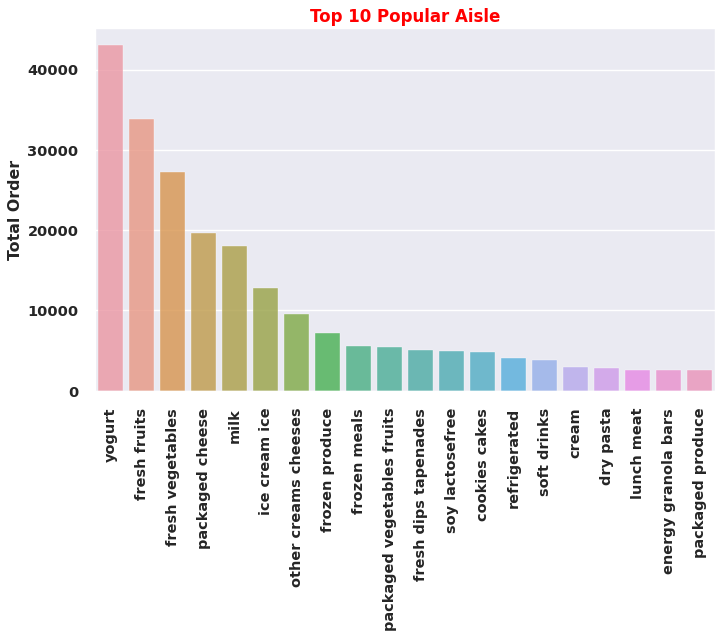

In [ ]:
#Most Popular Aisle on Category 0 (Top 10)
plt.figure(figsize=(10,6),dpi=80),
plt.style.use('seaborn-talk')
popular_aisle = df0['aisle'].value_counts().head(20)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

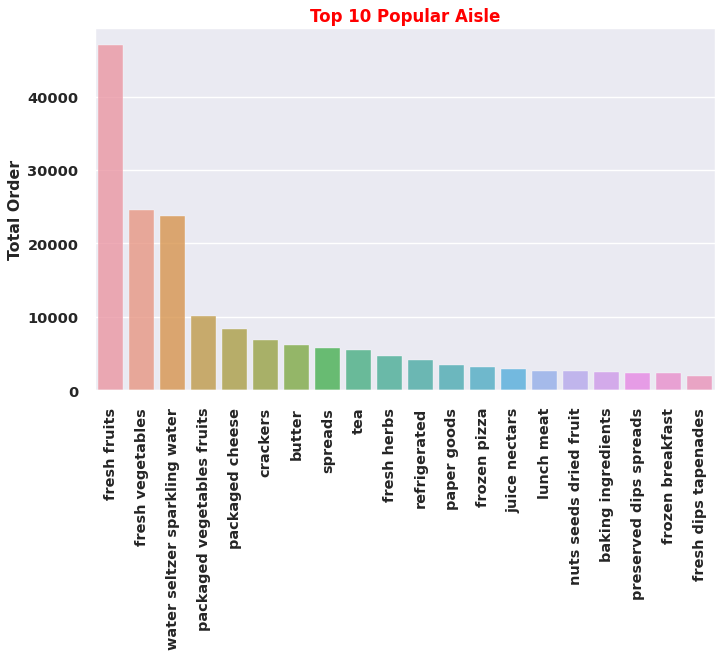

In [ ]:
#Most Popular Aisle on Category 1 (Top 10)
plt.figure(figsize=(10,6),dpi=80),
plt.style.use('seaborn-talk')
popular_aisle = df1['aisle'].value_counts().head(20)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

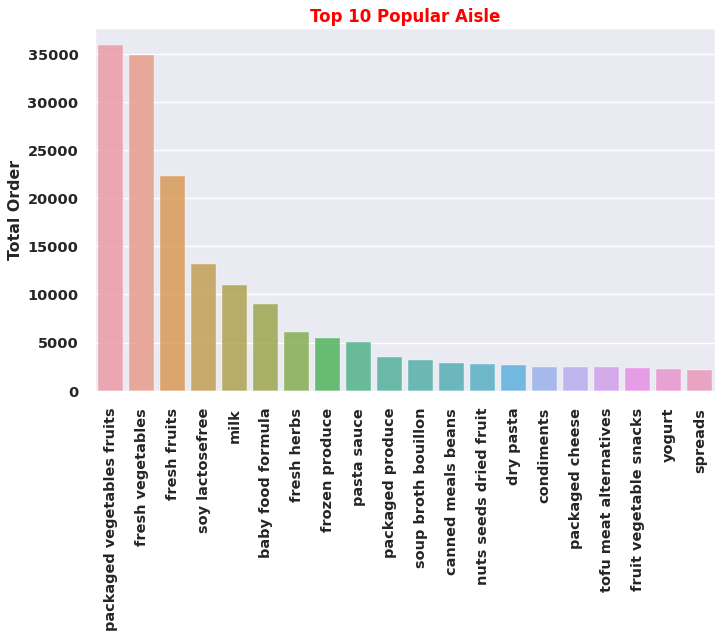

In [ ]:
#Most Popular Aisle on Category 2 (Top 10)
plt.figure(figsize=(10,6),dpi=80),
plt.style.use('seaborn-talk')
popular_aisle = df2['aisle'].value_counts().head(20)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

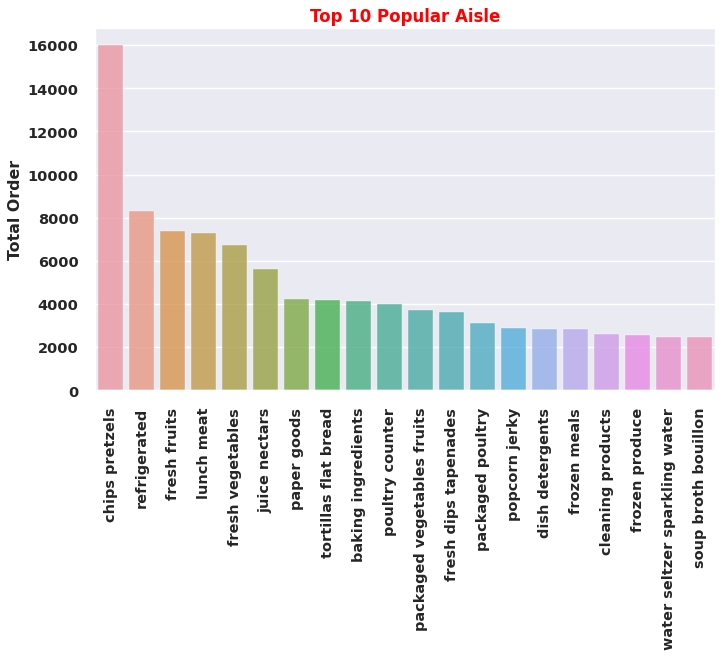

In [ ]:
#Most Popular Aisle on Category 3 (Top 10)
plt.figure(figsize=(10,6),dpi=80),
plt.style.use('seaborn-talk')
popular_aisle = df3['aisle'].value_counts().head(20)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

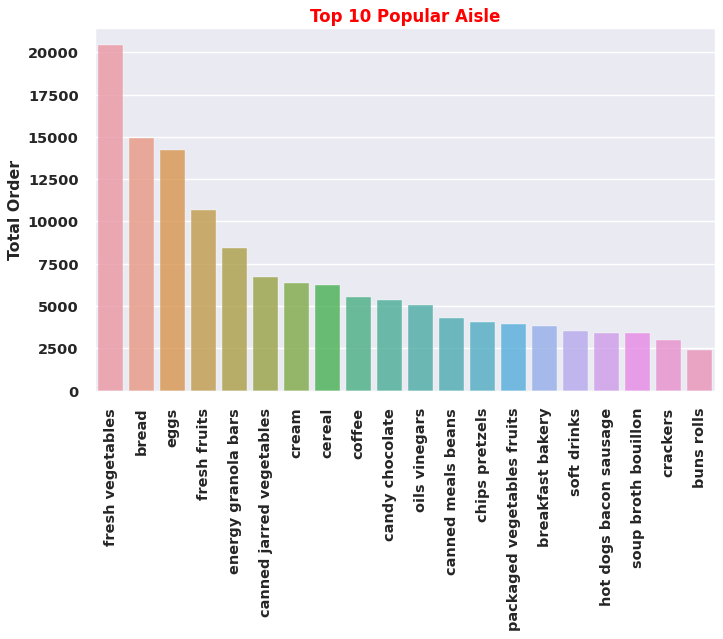

In [ ]:
#Most Popular Aisle on Category 4 (Top 10)
plt.figure(figsize=(10,6),dpi=80),
plt.style.use('seaborn-talk')
popular_aisle = df4['aisle'].value_counts().head(20)
sns.barplot(popular_aisle.index, popular_aisle.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.title("Top 10 Popular Aisle", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Order",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.show()

In [ ]:
data.columns

Index(['order_id', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'user_id', 'Categories', 'Category 2', 'Category 0', 'Category 1',
       'Category 3', 'Category 4'],
      dtype='object')

In [ ]:
data["order_id01"] = data["order_id"].copy()
#data["user_id01"] = data["user_id"].copy()

In [ ]:
df['user_id'].nunique()

70642

In [ ]:
df['order_id'].nunique()

107204

# **Feature Engineering**

In [ ]:
gb = data.groupby("user_id")
df_customers = []

# Number of orders of each user
nbr_orders = (gb["order_id01"].unique()).apply(lambda x: len(x))
df_customers.append(nbr_orders)

# Average number of different products purchased per order
df_customers.append(gb["order_id"].count()/nbr_orders)

# Proportion of products purchased belonging to one of the 5 categories for each client
for category in ["Category 0", "Category 1", "Category 2", "Category 3", "Category 4"]:
    df_customers.append(gb[category].mean())

In [ ]:
df_customers = pd.DataFrame(df_customers).T
df_customers.rename(columns = {'order_id01':'Count_Orders', 
                               'Unnamed 0':'Average_Products_Order',
                               'Category 0':'Yogurt & Fruits', 
                               'Category 1':'Fruits & Vegs',
                               'Category 2':'Packed Vegs & Fruits',
                               'Category 3':'Pretzels Lovers',
                               'Category 4':'Bread Lover'},
                    inplace = True)
df_customers.head(10)

Count_Orders  Average_Products_Order  ...  Pretzels Lovers  Bread Lover
user_id                                        ...                              
4                 1.0                     2.0  ...         0.500000     0.500000
7                 1.0                    11.0  ...         0.272727     0.363636
10                2.0                    38.0  ...         0.171053     0.197368
13                1.0                     5.0  ...         0.000000     0.600000
15                1.0                     5.0  ...         0.200000     0.400000
19                1.0                    21.0  ...         0.190476     0.142857
21                2.0                    15.5  ...         0.129032     0.129032
23                1.0                     9.0  ...         0.222222     0.111111
27                2.0                     7.5  ...         0.200000     0.000000
32                1.0                    19.0  ...         0.157895     0.000000

[10 rows x 7 columns]

In [ ]:
df_customers = df_customers.reset_index(level=0, drop=True)

In [ ]:
df_customers.head(10)

Count_Orders  Average_Products_Order  ...  Pretzels Lovers  Bread Lover
0           1.0                     2.0  ...         0.500000     0.500000
1           1.0                    11.0  ...         0.272727     0.363636
2           2.0                    38.0  ...         0.171053     0.197368
3           1.0                     5.0  ...         0.000000     0.600000
4           1.0                     5.0  ...         0.200000     0.400000
5           1.0                    21.0  ...         0.190476     0.142857
6           2.0                    15.5  ...         0.129032     0.129032
7           1.0                     9.0  ...         0.222222     0.111111
8           2.0                     7.5  ...         0.200000     0.000000
9           1.0                    19.0  ...         0.157895     0.000000

[10 rows x 7 columns]

In [ ]:
# Noisy points
# Fix that list range
#df_customers.drop([0, 3008], axis=0, inplace=True)

In [ ]:
df_customers.columns

Index(['Count_Orders', 'Average_Products_Order', 'Yogurt & Fruits',
       'Fruits & Vegs', 'Packed Vegs & Fruits', 'Pretzels Lovers',
       'Bread Lover'],
      dtype='object')

# **Clustering**

In [ ]:
len(df_customers)

70642

In [ ]:
# Yield successive n-sized 
# chunks from l. 
def divide_chunks(l, n): 
      
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n]

# How many elements each 
# list should have 
n = int(len(df_customers)/2)
  
x = list(divide_chunks(df_customers, n)) 

In [ ]:
df_customers = x[0]
len(df_customers)

35321

In [ ]:
# Standization of the data

stscaler = StandardScaler().fit(df_customers)
df_standard = stscaler.transform(df_customers)

In [ ]:
# Example of a DBCAN model (Density-Based Spatial Clustering of Applications with Noise)
# https://elutins.medium.com/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818

# Decrease eps, increase clusters. Increase eps, decrease clusters.

dbsc = DBSCAN(eps=1.2, min_samples=10).fit(df_standard)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbsc.core_sample_indices_] = True
dbsc.get_params()

{'algorithm': 'auto',
 'eps': 1.2,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 10,
 'n_jobs': None,
 'p': None}

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Number of Clusters: %d" % n_clusters_)
print("Number of noises: %d" % n_noise_)

Number of Clusters: 2
Number of noises: 88


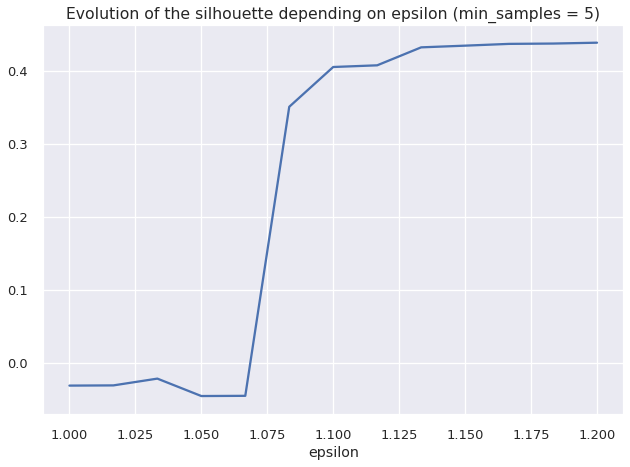

Epsilon  ...                             Distribution of points
0   1.000000  ...  [22769, 7310, 1012, 2535, 253, 362, 329, 31, 3...
1   1.016667  ...  [22771, 7316, 1015, 2538, 253, 363, 329, 31, 3...
2   1.033333  ...  [23025, 7349, 1016, 2546, 363, 329, 333, 117, ...
3   1.050000  ...  [23355, 7350, 1017, 2548, 363, 333, 118, 34, 1...
4   1.066667  ...  [23356, 7350, 1022, 2552, 366, 333, 118, 34, 1...
5   1.083333  ...                          [34700, 346, 118, 36, 12]
6   1.100000  ...                               [34831, 346, 36, 16]
7   1.116667  ...                               [34838, 346, 36, 17]
8   1.133333  ...                                       [34897, 346]
9   1.150000  ...                                       [34902, 346]
10  1.166667  ...                                       [34908, 346]
11  1.183333  ...                                       [34912, 346]
12  1.200000  ...                                       [34921, 346]

[13 rows x 5 columns]

In [ ]:
# vary the value of epsilon between 1.0 and 1.2 for min_samples = 5

epsilon = np.linspace(1.0,1.2,13)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=5).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)

# Dataframe with Number of clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc5 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                         'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
    
#graph showing the evolution of the silhouette depending on epsilon (min_samples = 5)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 5)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc5.head(13)

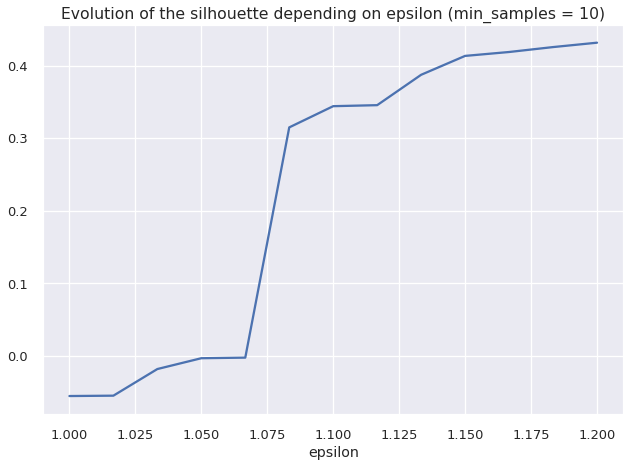

Epsilon  ...                             Distribution of points
0   1.000000  ...  [22757, 7251, 986, 2502, 253, 356, 329, 31, 33...
1   1.016667  ...  [22761, 7256, 990, 2507, 253, 357, 329, 31, 33...
2   1.033333  ...  [22764, 7301, 995, 2509, 253, 358, 329, 333, 1...
3   1.050000  ...  [22766, 7327, 997, 2516, 253, 359, 329, 333, 1...
4   1.066667  ...  [22768, 7333, 1003, 2527, 253, 363, 329, 333, ...
5   1.083333  ...                    [34038, 257, 341, 346, 115, 27]
6   1.100000  ...                     [34180, 257, 341, 346, 27, 10]
7   1.116667  ...                     [34197, 257, 341, 346, 29, 10]
8   1.133333  ...                              [34489, 341, 346, 10]
9   1.150000  ...                                    [34839, 346, 9]
10  1.166667  ...                                       [34862, 346]
11  1.183333  ...                                       [34878, 346]
12  1.200000  ...                                       [34887, 346]

[13 rows x 5 columns]

In [ ]:
# vary the value of epsilon between 1.0 and 1.2 for min_samples = 10

epsilon = np.linspace(1.0,1.2,13)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=10).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)

# Dataframe with Number of clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc5 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                         'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
    
#graph showing the evolution of the silhouette depending on epsilon (min_samples = 10)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 10)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc5.head(13)

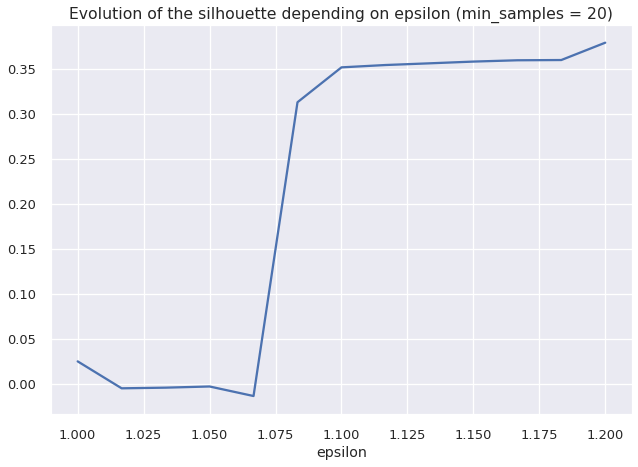

Epsilon  ...                             Distribution of points
0   1.000000  ...  [21843, 7123, 956, 2442, 482, 253, 423, 351, 3...
1   1.016667  ...  [22332, 7137, 960, 2445, 253, 423, 352, 329, 3...
2   1.033333  ...  [22333, 7150, 967, 2453, 254, 423, 354, 329, 3...
3   1.050000  ...  [22335, 7180, 977, 2466, 254, 423, 355, 329, 3...
4   1.066667  ...  [22759, 7232, 983, 2469, 254, 356, 329, 333, 9...
5   1.083333  ...                        [33930, 258, 341, 346, 101]
6   1.100000  ...                             [34099, 258, 341, 346]
7   1.116667  ...                             [34126, 258, 341, 346]
8   1.133333  ...                             [34151, 258, 341, 346]
9   1.150000  ...                             [34181, 258, 342, 346]
10  1.166667  ...                             [34196, 258, 342, 346]
11  1.183333  ...                             [34214, 258, 342, 346]
12  1.200000  ...                                  [34569, 257, 346]

[13 rows x 5 columns]

In [ ]:
# vary the value of epsilon between 1.0 and 1.2 for min_samples = 20

epsilon = np.linspace(1.0,1.2,13)
res =  []
noise = []
clusters = []
n_points_epsilon = []

for k in epsilon:
    
    dbsc = DBSCAN(eps=k, min_samples=20).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype=bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    clusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)
    noise.append(n_noise_)
    res.append(metrics.silhouette_score(df_standard,labels))
    counts = np.bincount(labels[labels>=0])
    n_points_epsilon.append(counts)

# Dataframe with Number of clusters, Number of noises, Silhouette value, and Distribution of points
# depending on epsilon

df_dbsc5 = pd.DataFrame({'Epsilon':epsilon, 'Nbr_Clusters':clusters,
                         'Nbr_noises':noise, 'Silhouette':res,
                         'Distribution of points': n_points_epsilon})
    
#graph showing the evolution of the silhouette depending on epsilon (min_samples = 20)

plt.title("Evolution of the silhouette depending on epsilon (min_samples = 20)")
plt.xlabel("epsilon")
plt.plot(epsilon,res)
plt.show()
df_dbsc5.head(13)

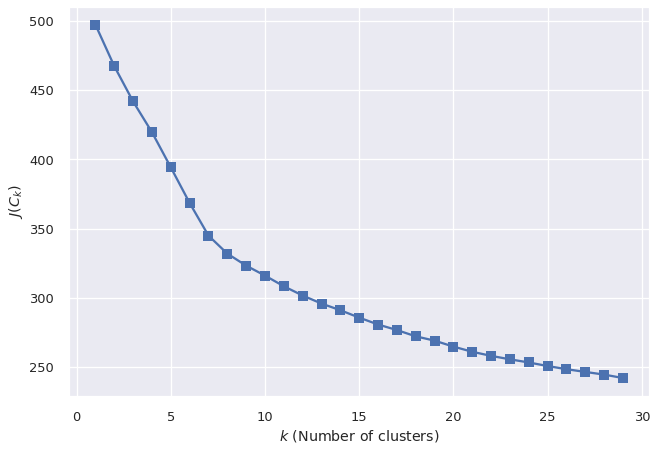

In [ ]:
# Graph showing the evolution of the square root of the sum of squared distances
# of samples to their closest cluster center, depending on number of cluster (k)

inertia = []

for k in range(1,30):
    model = KMeans(n_clusters=k, random_state=0).fit(df_standard)
    inertia.append(np.sqrt(model.inertia_))
    
plt.plot(range(1, 30), inertia, marker='s');
plt.xlabel('$k$ (Number of clusters)')
plt.ylabel('$J(C_k)$');

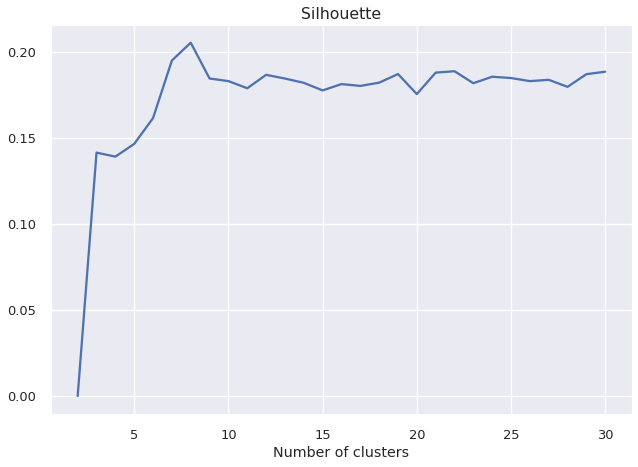

In [ ]:
# Vary the number of clusters between 2 and 30
res =  np.arange(29,dtype="double")

for k in np.arange(1,29):
    km = KMeans(n_clusters=k+1, random_state=0).fit(df_standard)
    res[k] = metrics.silhouette_score(df_standard,km.labels_)
    
#graph

plt.title("Silhouette")
plt.xlabel("Number of clusters")
plt.plot(np.arange(2,31,1),res)
plt.show()

In [ ]:
#Clustering with K-means algorithm

for n_cluster in [3,4,5,6,7,8,9,12,13]:
    model = KMeans(n_clusters=n_cluster, random_state=0).fit(df_standard)
    idk = model.labels_
    dict_nbr_points = {j: ("Number of points = %d" % (len(np.where(idk == j)[0])))
                       for j in range(model.n_clusters)}
    print('Number of clusters: %d' % n_cluster)
    print(dict_nbr_points)
    print('------------------------')

Number of clusters: 3
{0: 'Number of points = 9205', 1: 'Number of points = 9043', 2: 'Number of points = 17073'}
------------------------
Number of clusters: 4
{0: 'Number of points = 4063', 1: 'Number of points = 8836', 2: 'Number of points = 7368', 3: 'Number of points = 15054'}
------------------------
Number of clusters: 5
{0: 'Number of points = 11387', 1: 'Number of points = 4351', 2: 'Number of points = 5817', 3: 'Number of points = 6735', 4: 'Number of points = 7031'}
------------------------
Number of clusters: 6
{0: 'Number of points = 5407', 1: 'Number of points = 3907', 2: 'Number of points = 5293', 3: 'Number of points = 3054', 4: 'Number of points = 13965', 5: 'Number of points = 3695'}
------------------------
Number of clusters: 7
{0: 'Number of points = 4892', 1: 'Number of points = 4405', 2: 'Number of points = 6868', 3: 'Number of points = 3451', 4: 'Number of points = 3351', 5: 'Number of points = 8608', 6: 'Number of points = 3746'}
------------------------
Number

In [ ]:
df_customers.columns

Index(['Count_Orders', 'Average_Products_Order', 'Yogurt & Fruits',
       'Fruits & Vegs', 'Packed Vegs & Fruits', 'Pretzels Lovers',
       'Bread Lover'],
      dtype='object')

In [ ]:
def hist_kmeans_clusters(n):
    ''' For each feature this fonction plot histograms of your kmeans model's clusters.
    
    Parameters:
      
        n (int): the value of n_clusters in K-Means clustering
      
    '''
  
    model = KMeans(n_clusters=n, random_state=0).fit(df_standard)
    idk = model.labels_
    fig, ax = plt.subplots(figsize=(7,6))

    for i in ['Count_Orders', 'Average_Products_Order', 'Yogurt & Fruits',
       'Fruits & Vegs', 'Packed Vegs & Fruits', 'Pretzels Lovers',
       'Bread Lover']:
        print(df_customers[i].describe())

        for id_cluster in range(model.n_clusters):
            print("Cluster %d" % id_cluster)
            index = np.where(idk == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Median = df_customers[i][index].median()
            plt.hist(df_customers[i][index], bins = 30)
            plt.text(0.85, 0.8, 'Mean: %.2f' % Mean, bbox=dict(facecolor='red',
                                                                  alpha=0.5),
               transform=ax.transAxes)
            plt.text(0.85, 0.7, 'Median: %.2f' % Median, bbox=dict(facecolor='red',
                                                                    alpha=0.5),
               transform=ax.transAxes)
            plt.title(i)
            plt.show()

        print('---------------------------------------------------------')

In [ ]:
def df_kmeans_clusters(n):
    ''' Show a dataframe with the average percentage difference betwean the mean of each feature
    and the value of each point for each kmeans model's clusters.
    
    Parameters:
      
         n (int): the value of n_clusters in K-Means clustering
      
    '''
  
    model = KMeans(n_clusters=n, random_state=0).fit(df_standard)
    idk = model.labels_
    my_dict={}
    alphabet = 'BCDEFGHIJKLM'
    my_dict['A/Number_Of_Customers'] = [(len(np.where(idk == j)[0])) for j in 
                                        range(model.n_clusters)]

    for h, i in enumerate(['Count_Orders', 'Average_Products_Order', 'Yogurt & Fruits',
       'Fruits & Vegs', 'Packed Vegs & Fruits', 'Pretzels Lovers',
       'Bread Lover']):
        feature = []

        for id_cluster in range(model.n_clusters):
            index = np.where(idk == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Mean_feature = df_customers[i].mean()
            pourcentage_mean = str('%.2f' % ((Mean - Mean_feature)*100/Mean_feature)) + ' %'
            feature.append(pourcentage_mean)
    
        my_dict[alphabet[h] + '/' + i] = feature
   
    my_dict['N' + '/'] = feature
    Clusters_df = pd.DataFrame(my_dict)
  
    return Clusters_df.head(n)

count    35321.000000
mean         1.520738
std          0.926963
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: Count_Orders, dtype: float64
Cluster 0


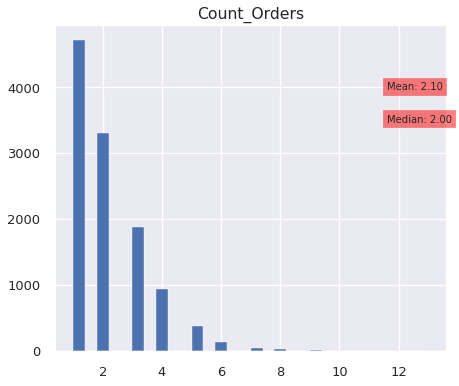

Cluster 1


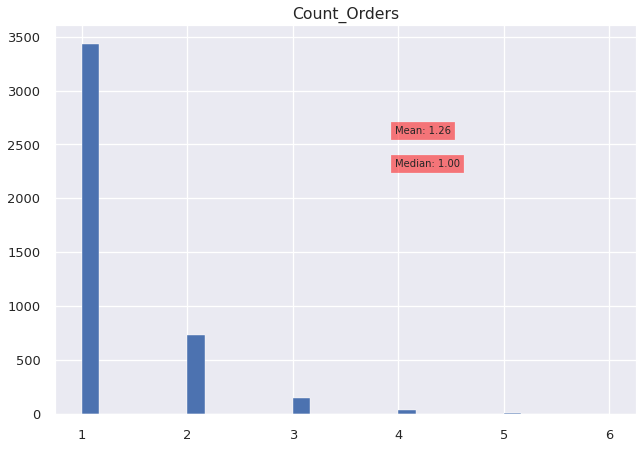

Cluster 2


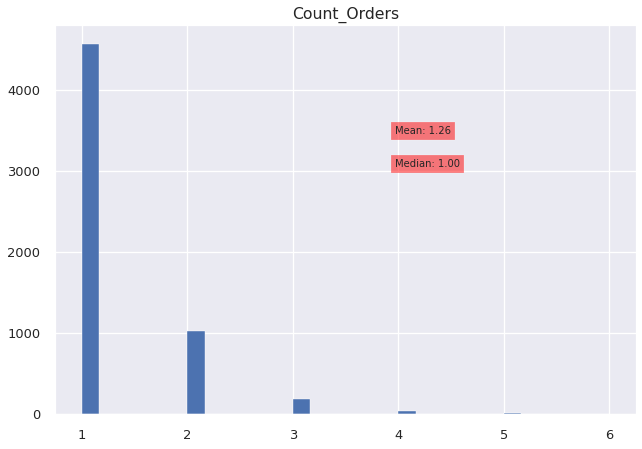

Cluster 3


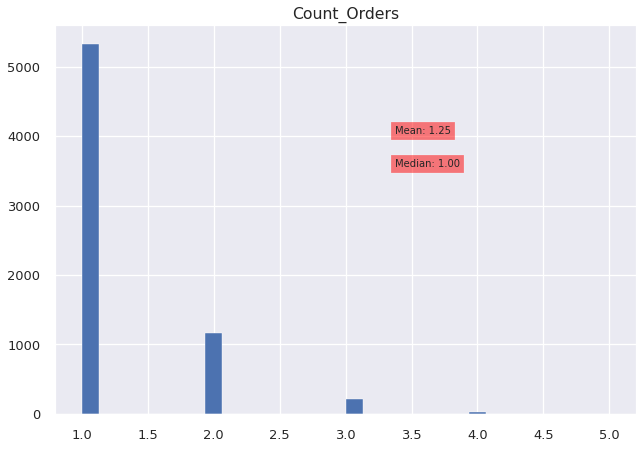

Cluster 4


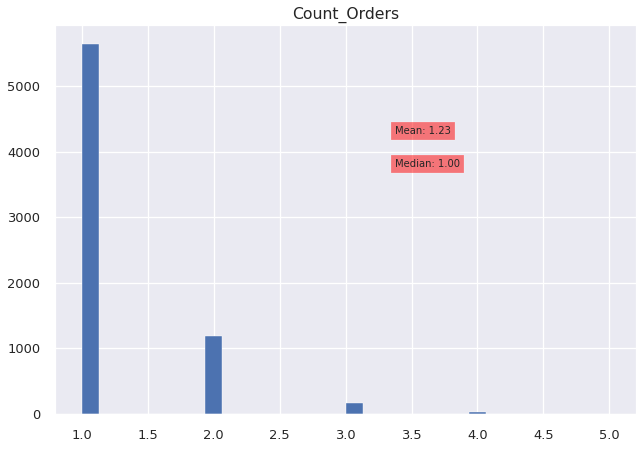

---------------------------------------------------------
count    35321.000000
mean        10.097244
std          7.258420
min          1.000000
25%          5.000000
50%          8.500000
75%         13.500000
max        127.000000
Name: Average_Products_Order, dtype: float64
Cluster 0


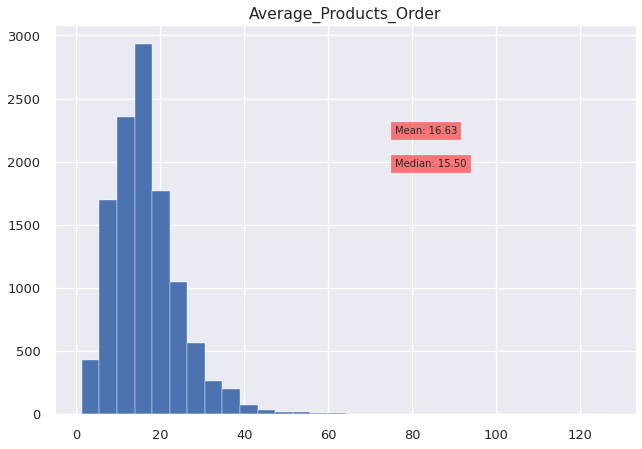

Cluster 1


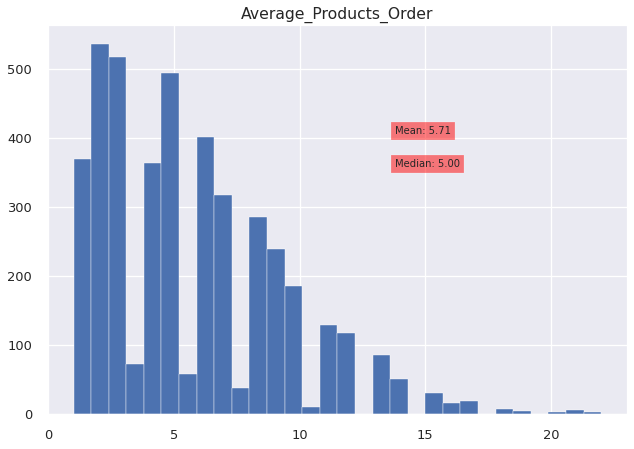

Cluster 2


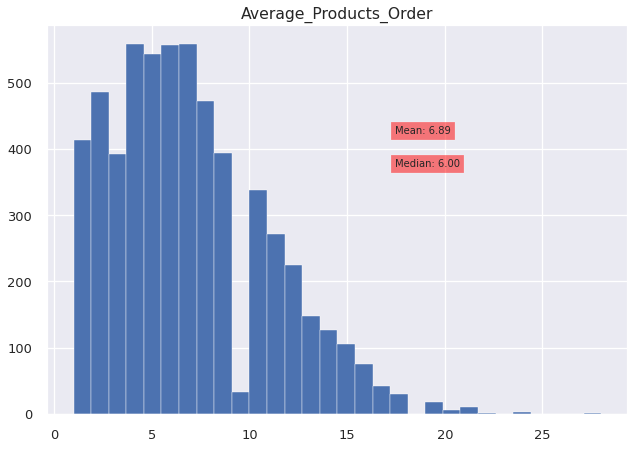

Cluster 3


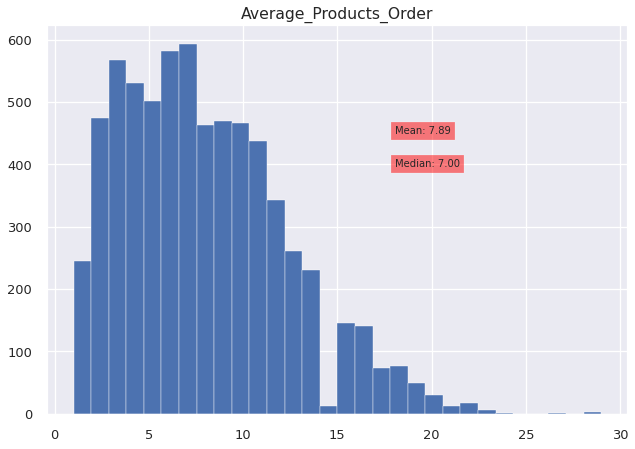

Cluster 4


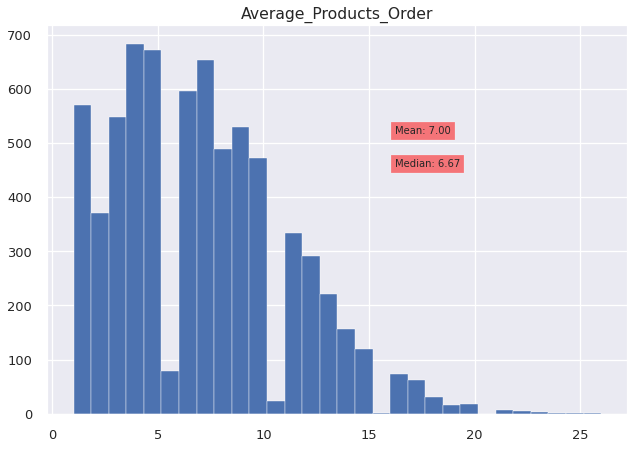

---------------------------------------------------------
count    35321.000000
mean         0.266036
std          0.185490
min          0.000000
25%          0.150000
50%          0.250000
75%          0.355556
max          1.000000
Name: Yogurt & Fruits, dtype: float64
Cluster 0


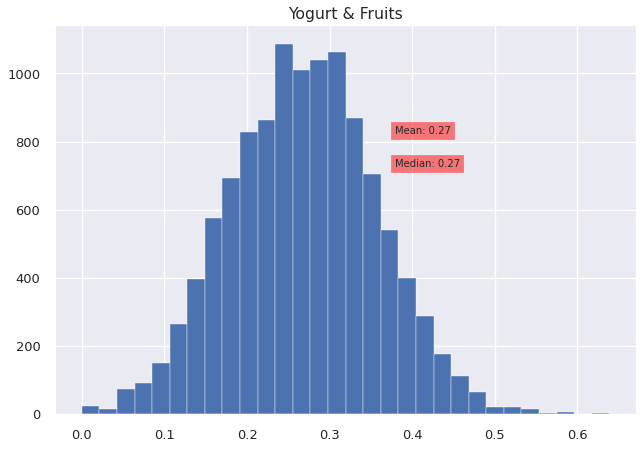

Cluster 1


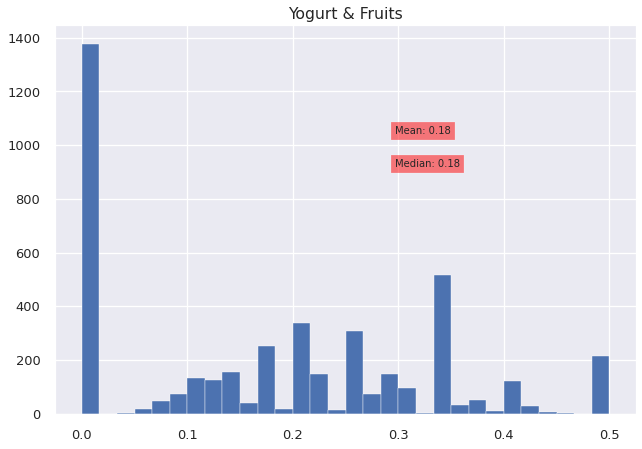

Cluster 2


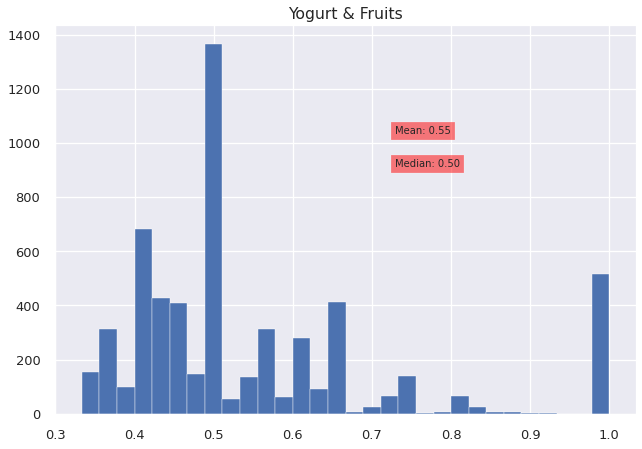

Cluster 3


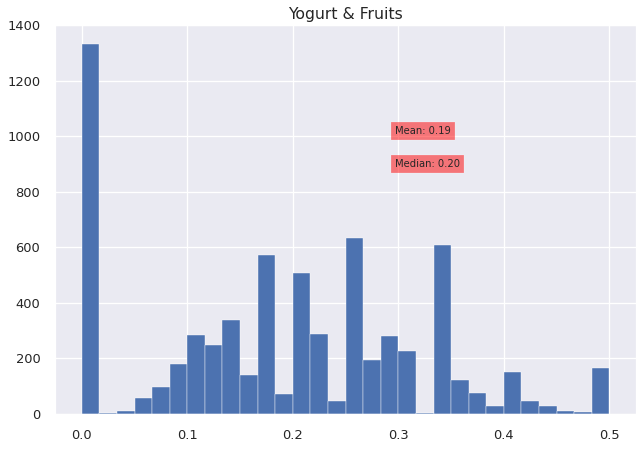

Cluster 4


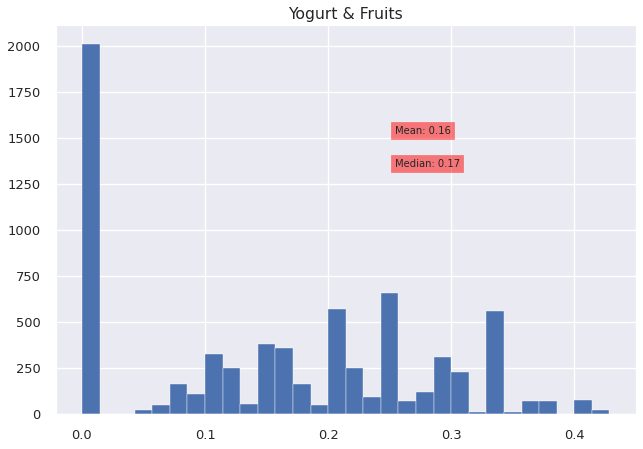

---------------------------------------------------------
count    35321.000000
mean         0.202886
std          0.170425
min          0.000000
25%          0.096774
50%          0.181818
75%          0.272727
max          1.000000
Name: Fruits & Vegs, dtype: float64
Cluster 0


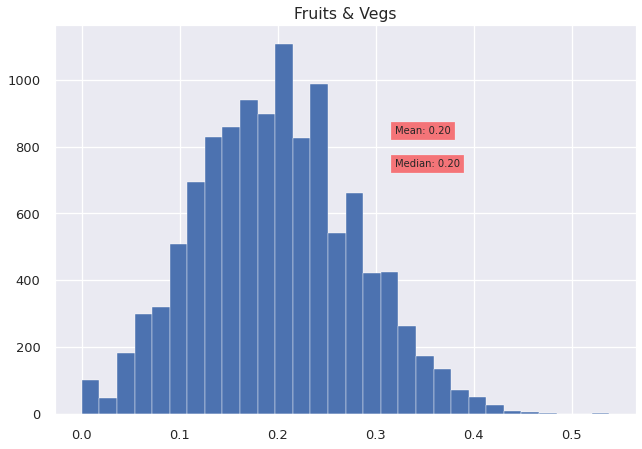

Cluster 1


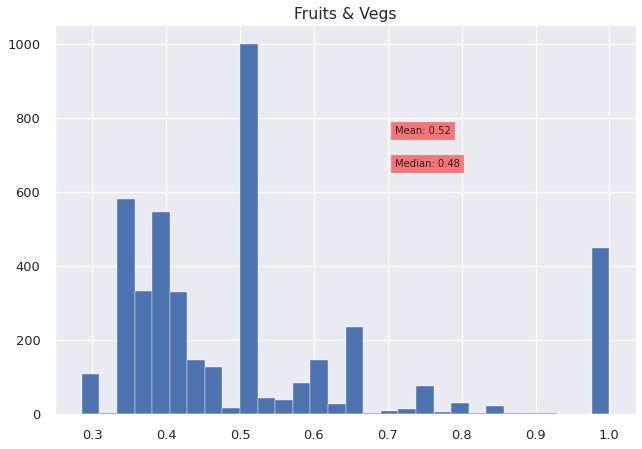

Cluster 2


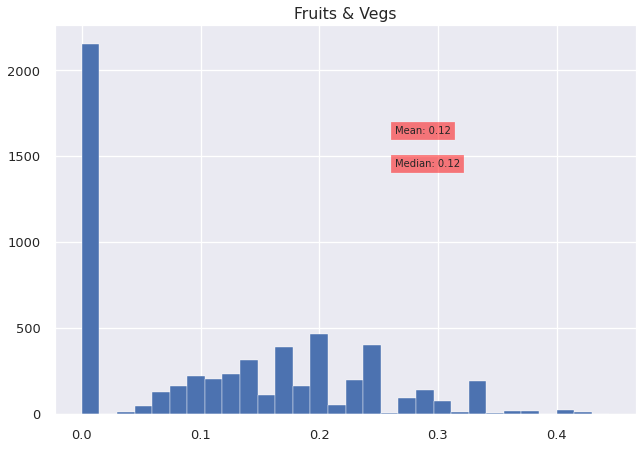

Cluster 3


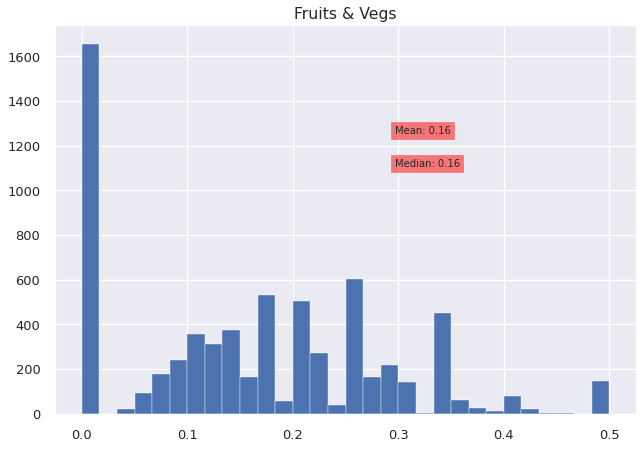

Cluster 4


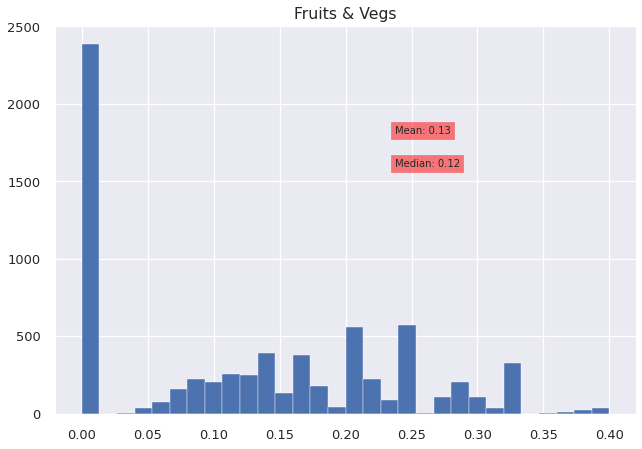

---------------------------------------------------------
count    35321.000000
mean         0.188082
std          0.164036
min          0.000000
25%          0.062500
50%          0.166667
75%          0.272727
max          1.000000
Name: Packed Vegs & Fruits, dtype: float64
Cluster 0


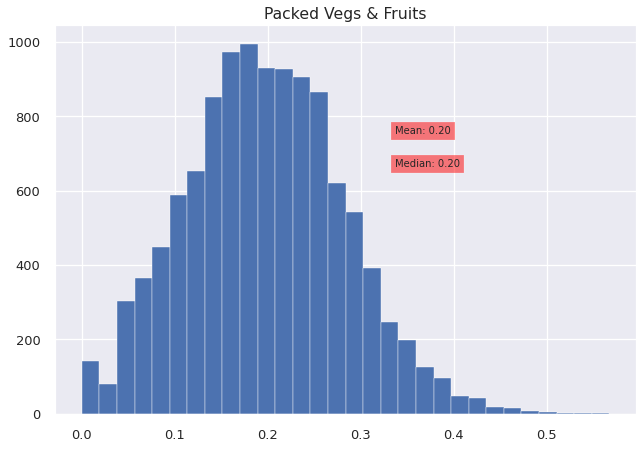

Cluster 1


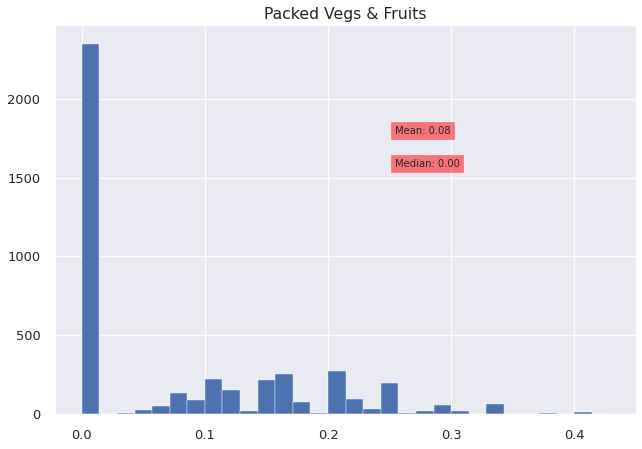

Cluster 2


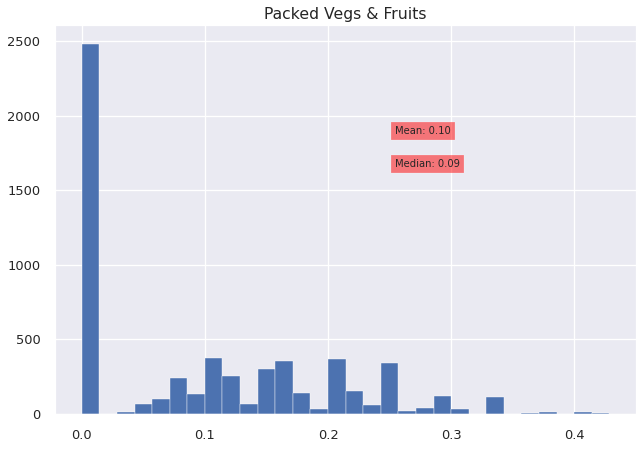

Cluster 3


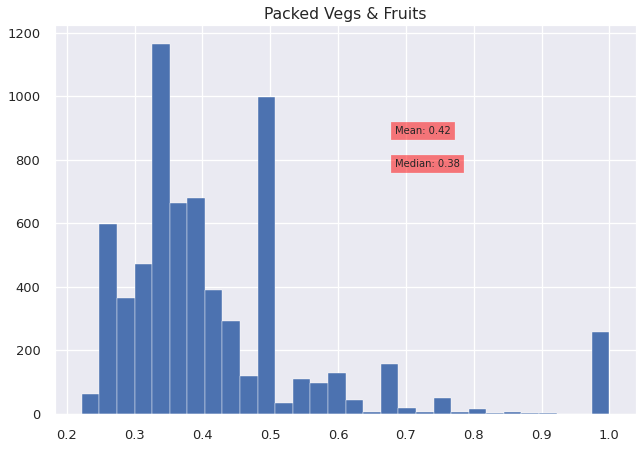

Cluster 4


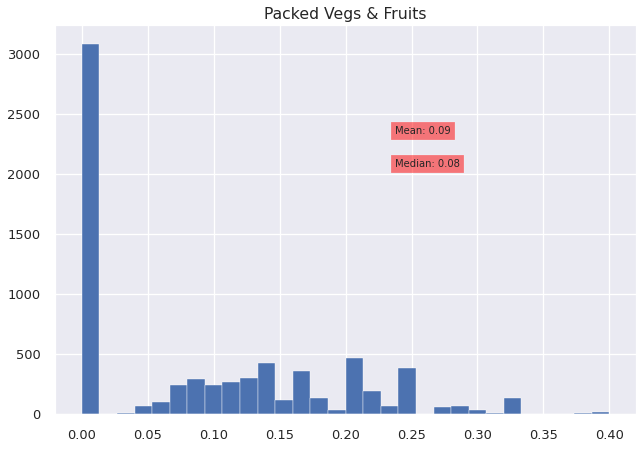

---------------------------------------------------------
count    35321.000000
mean         0.162729
std          0.163239
min          0.000000
25%          0.027027
50%          0.137931
75%          0.230769
max          1.000000
Name: Pretzels Lovers, dtype: float64
Cluster 0


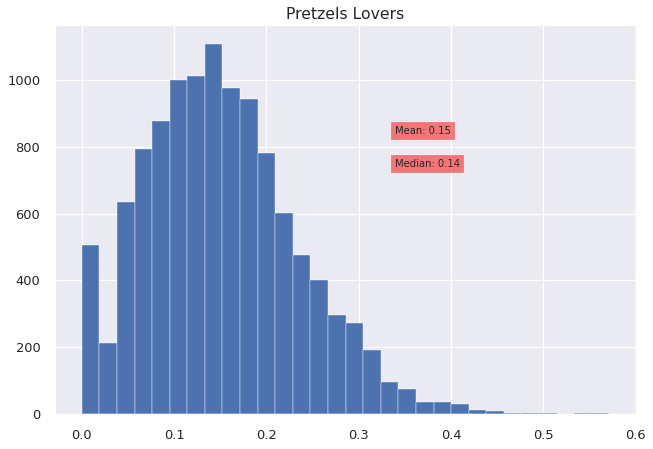

Cluster 1


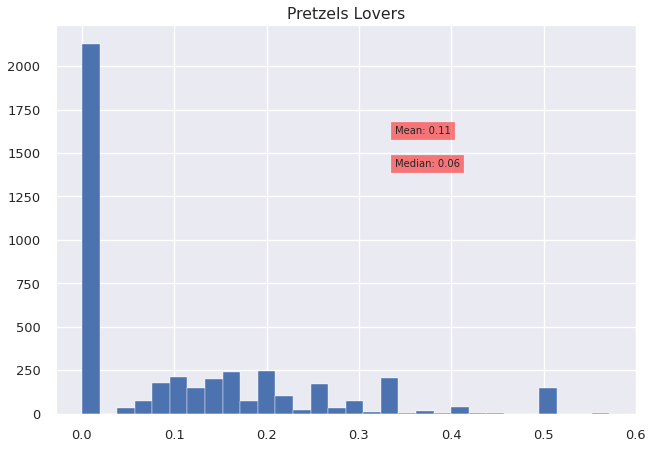

Cluster 2


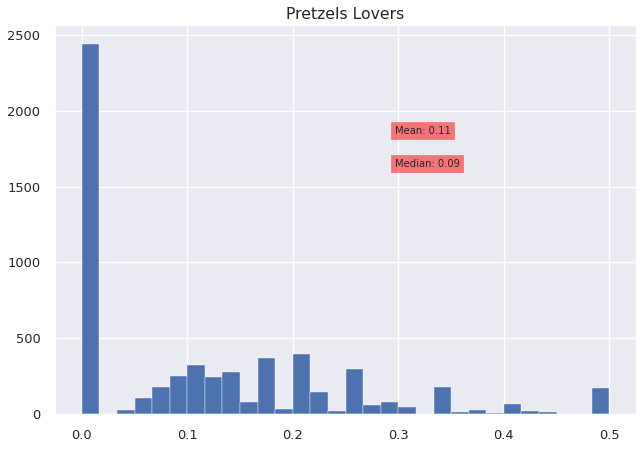

Cluster 3


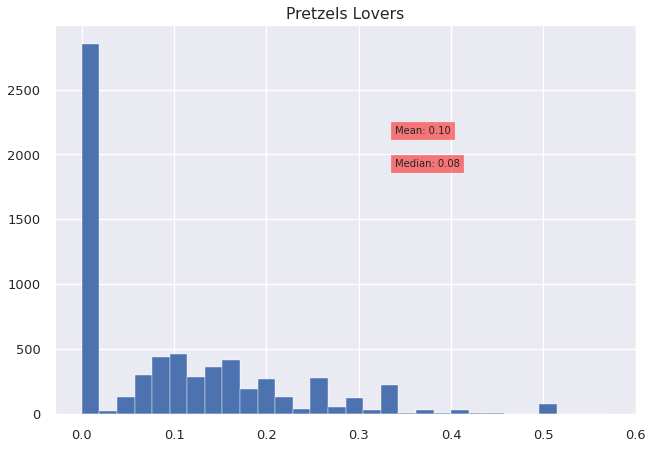

Cluster 4


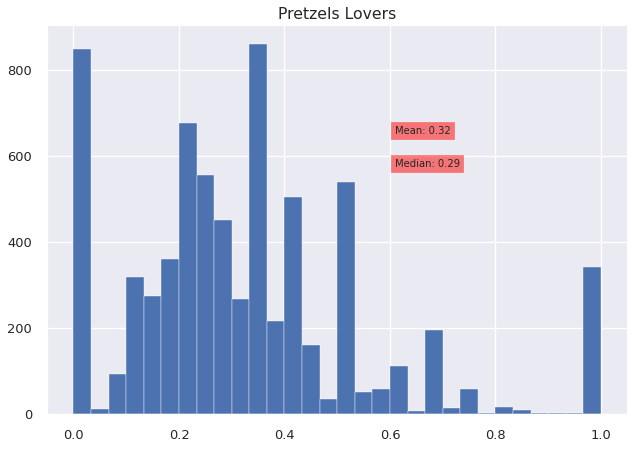

---------------------------------------------------------
count    35321.000000
mean         0.180268
std          0.159221
min          0.000000
25%          0.071429
50%          0.166667
75%          0.250000
max          1.000000
Name: Bread Lover, dtype: float64
Cluster 0


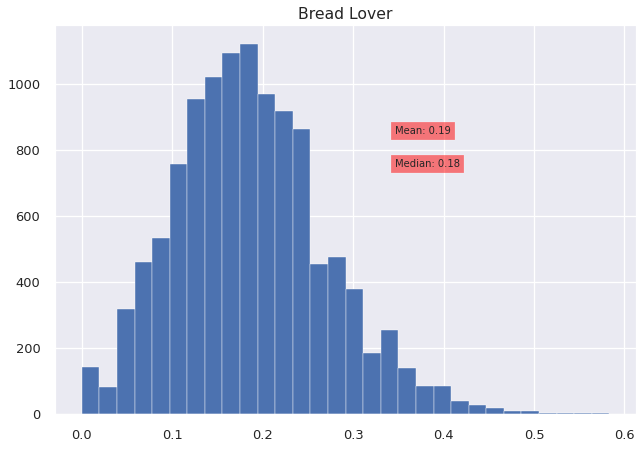

Cluster 1


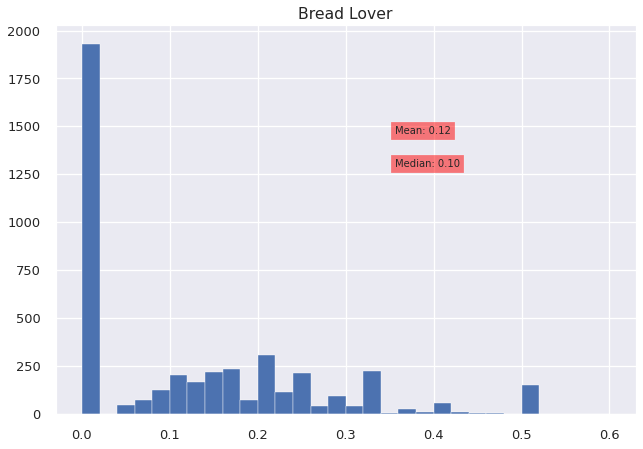

Cluster 2


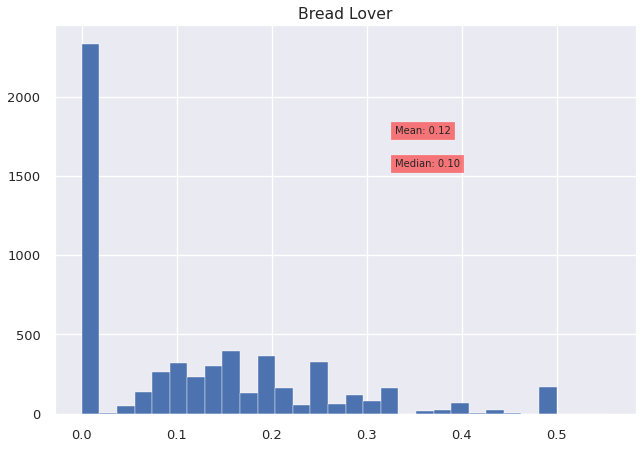

Cluster 3


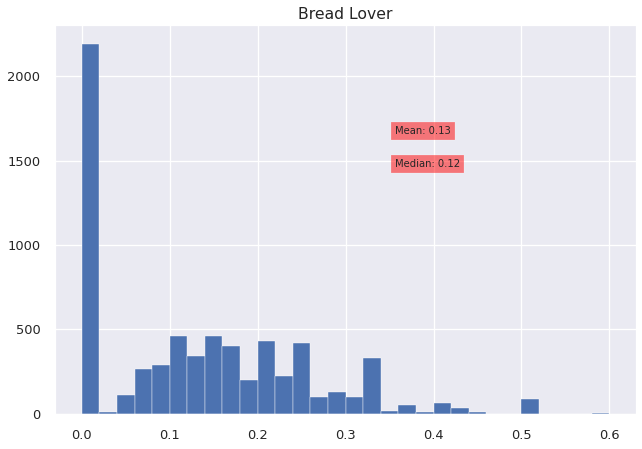

Cluster 4


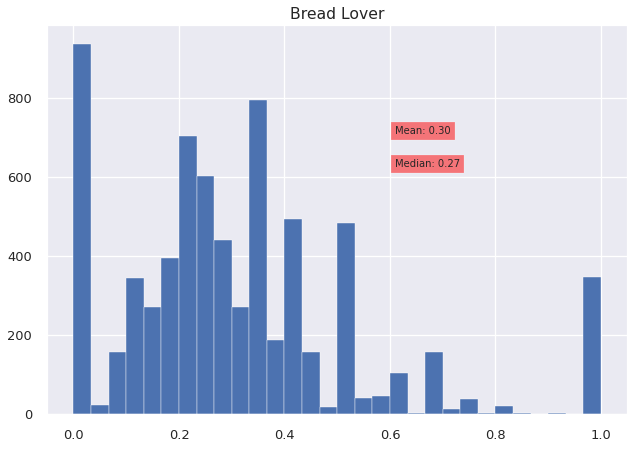

---------------------------------------------------------


In [ ]:
hist_kmeans_clusters(5)

In [ ]:
df_kmeans_clusters(5)

A/Number_Of_Customers B/Count_Orders  ... H/Bread Lover        N/
0                  11387        37.79 %  ...        3.09 %    3.09 %
1                   4351       -17.04 %  ...      -32.73 %  -32.73 %
2                   5817       -17.08 %  ...      -32.96 %  -32.96 %
3                   6735       -18.06 %  ...      -27.53 %  -27.53 %
4                   7031       -19.21 %  ...       68.89 %   68.89 %

[5 rows x 9 columns]

count    35321.000000
mean         1.520738
std          0.926963
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: Count_Orders, dtype: float64
Cluster 0


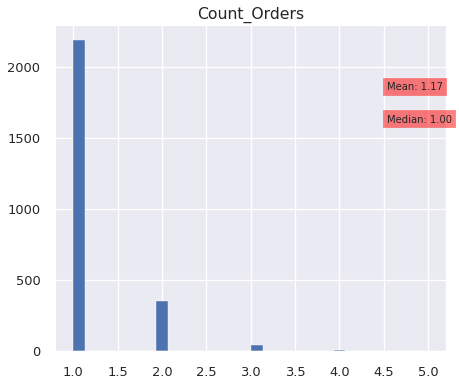

Cluster 1


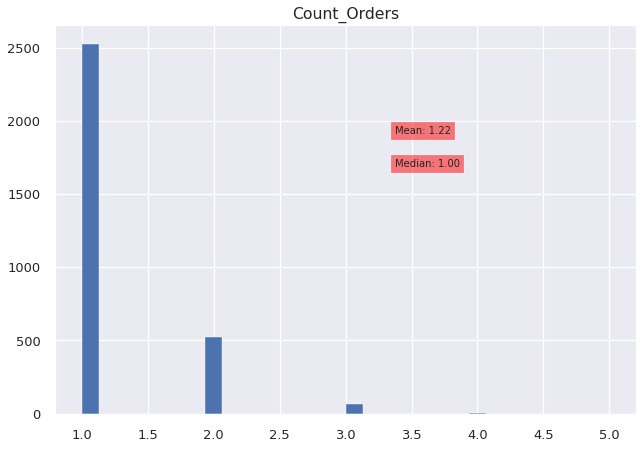

Cluster 2


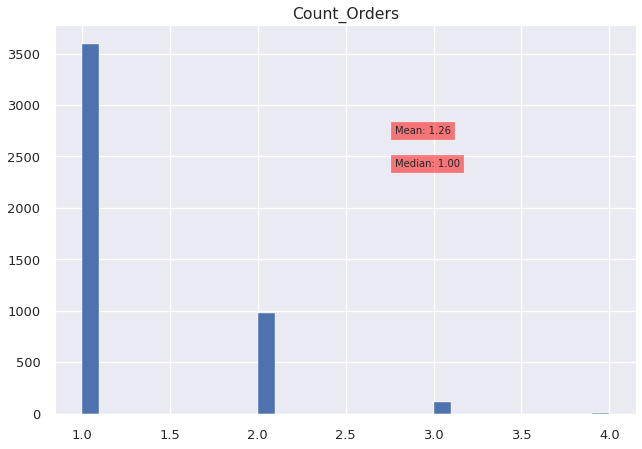

Cluster 3


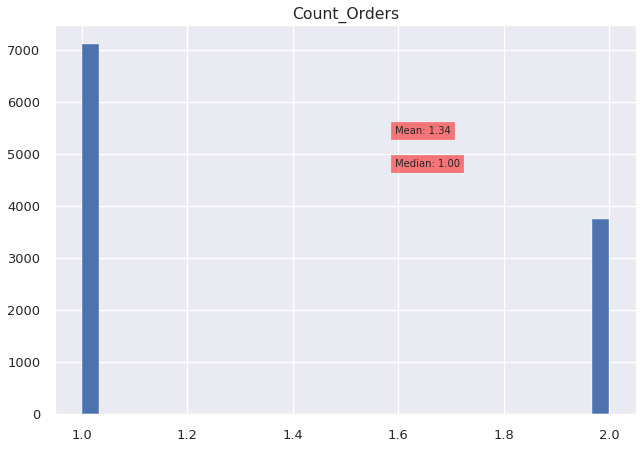

Cluster 4


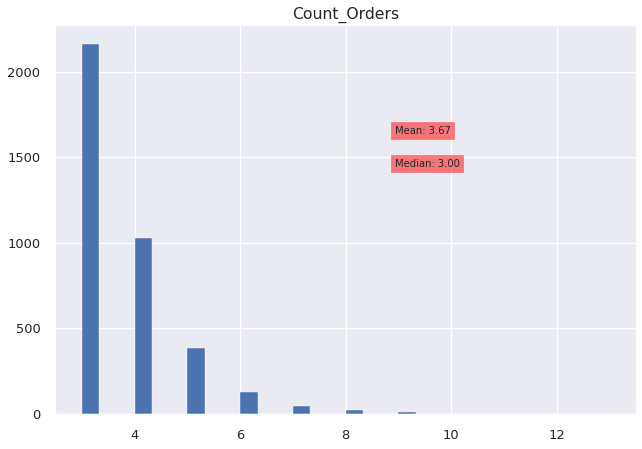

Cluster 5


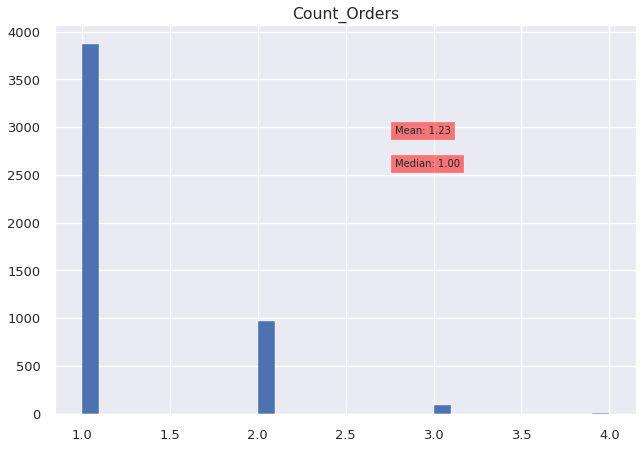

Cluster 6


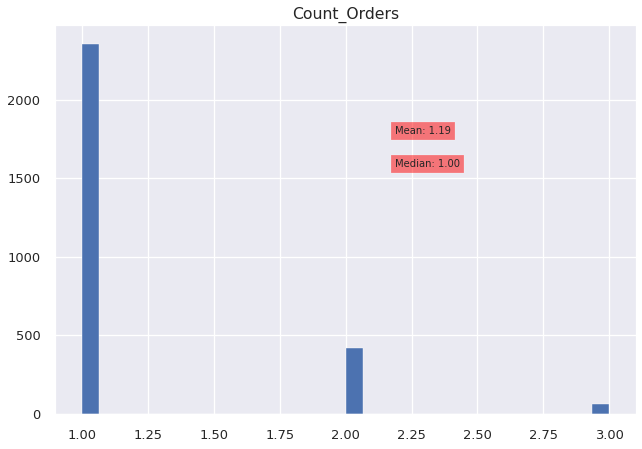

Cluster 7


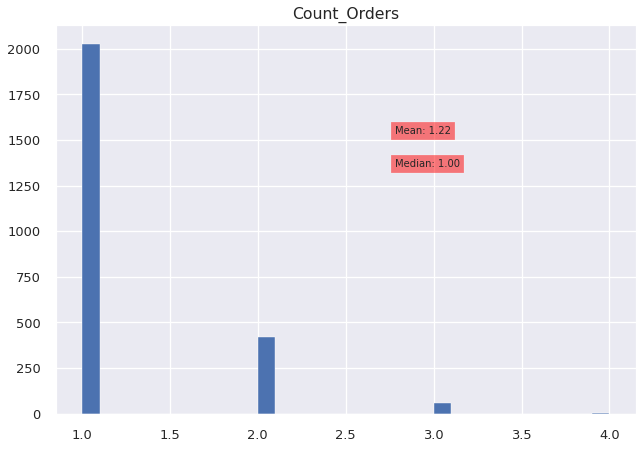

---------------------------------------------------------
count    35321.000000
mean        10.097244
std          7.258420
min          1.000000
25%          5.000000
50%          8.500000
75%         13.500000
max        127.000000
Name: Average_Products_Order, dtype: float64
Cluster 0


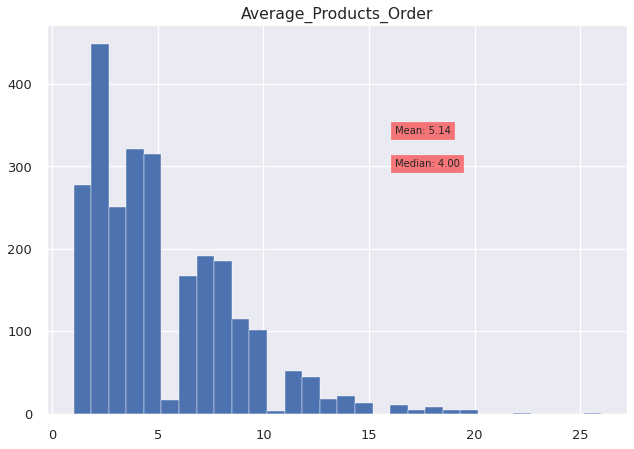

Cluster 1


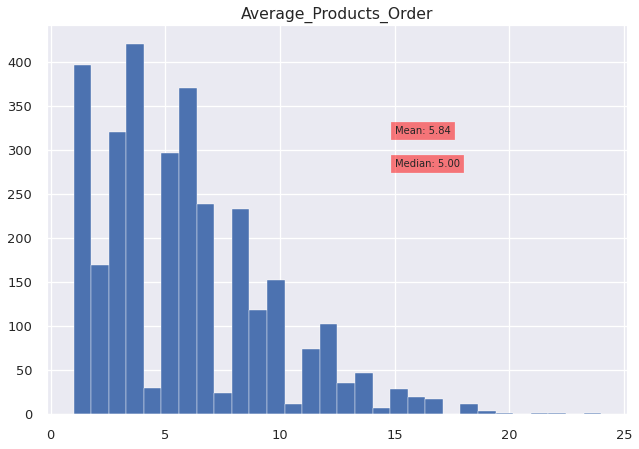

Cluster 2


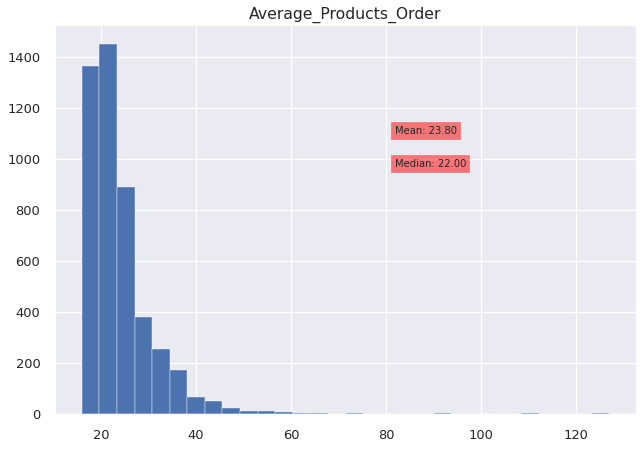

Cluster 3


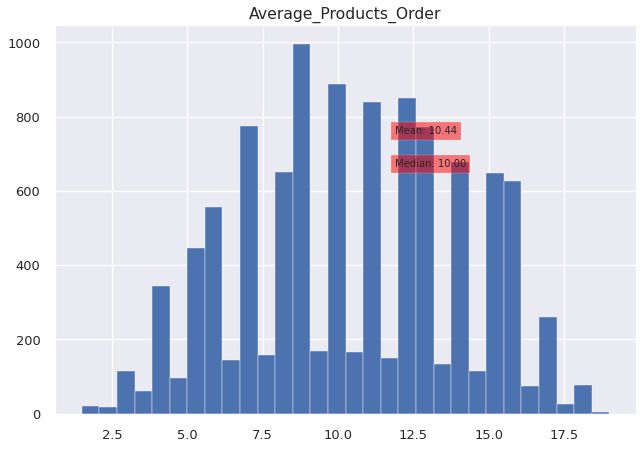

Cluster 4


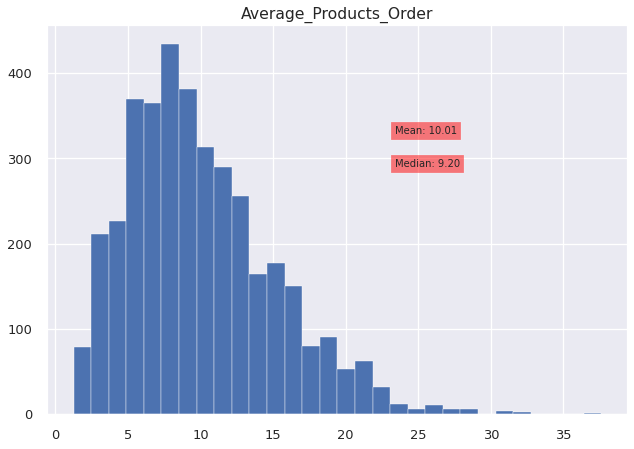

Cluster 5


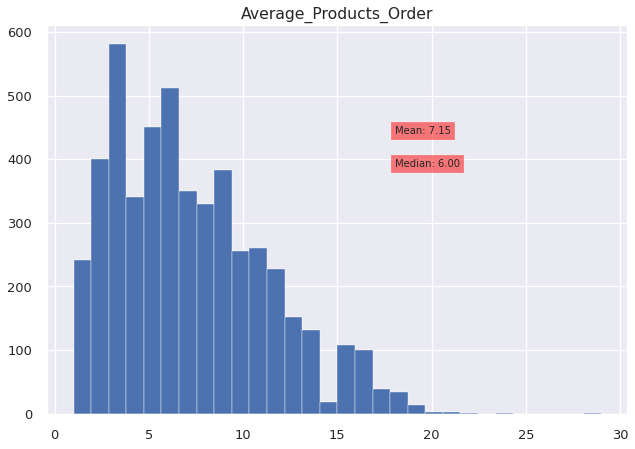

Cluster 6


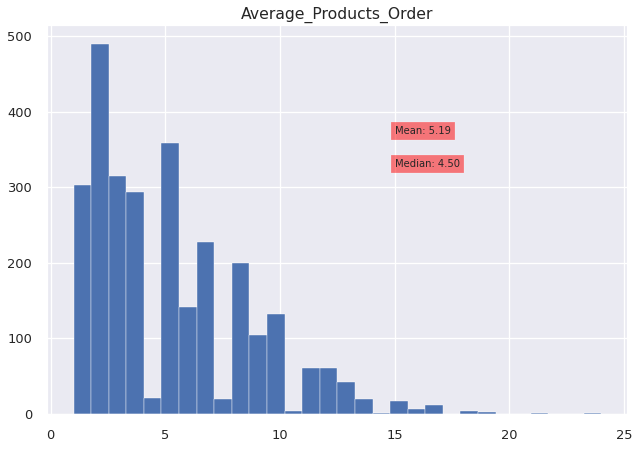

Cluster 7


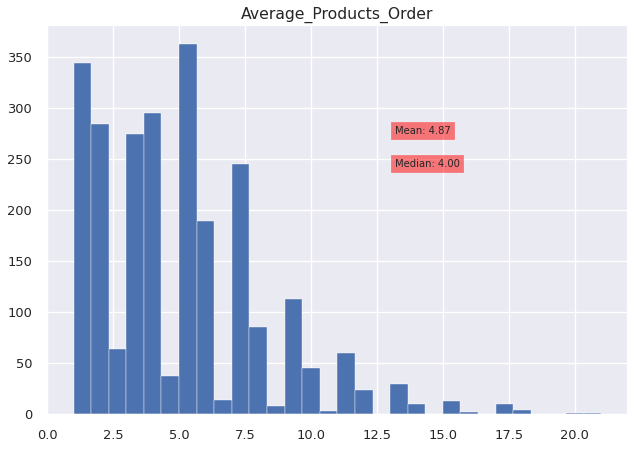

---------------------------------------------------------
count    35321.000000
mean         0.266036
std          0.185490
min          0.000000
25%          0.150000
50%          0.250000
75%          0.355556
max          1.000000
Name: Yogurt & Fruits, dtype: float64
Cluster 0


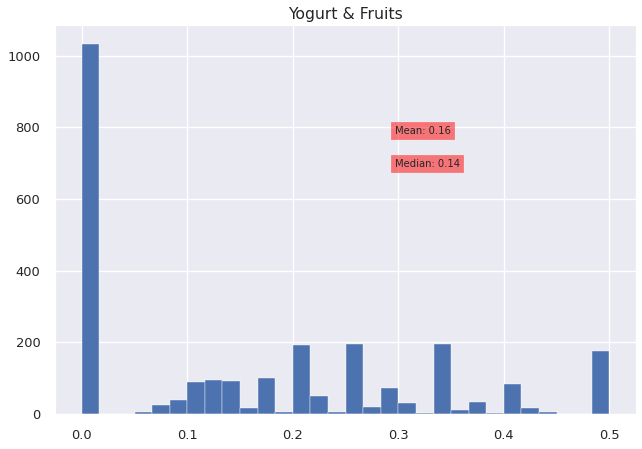

Cluster 1


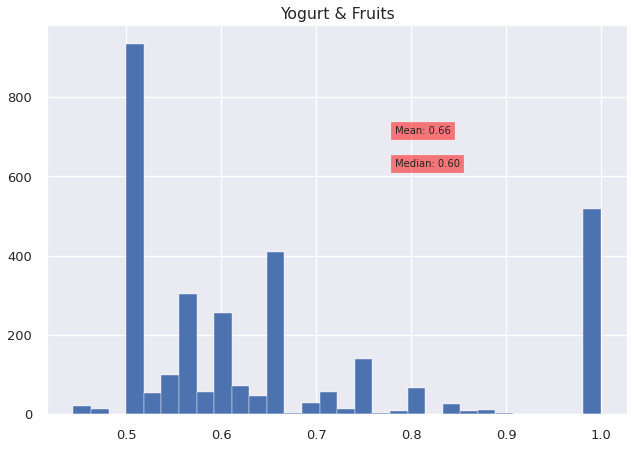

Cluster 2


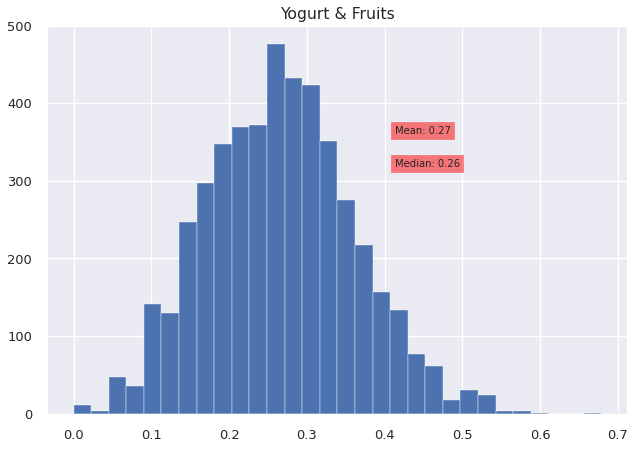

Cluster 3


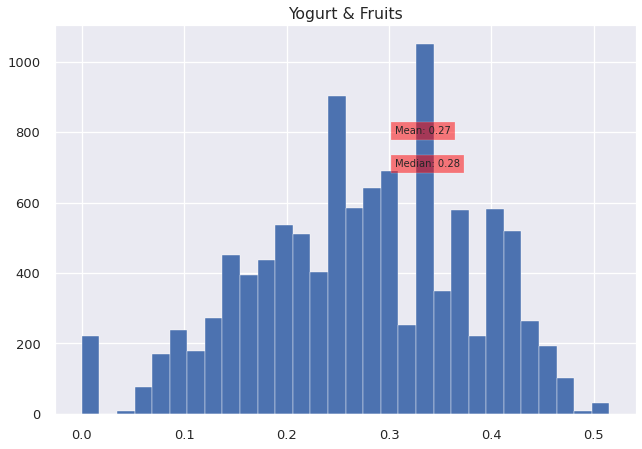

Cluster 4


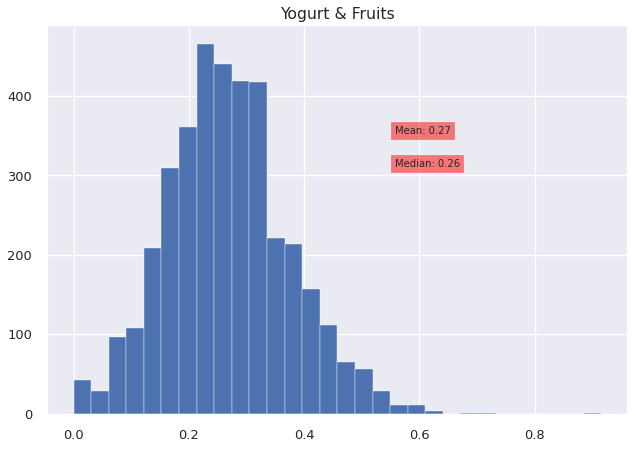

Cluster 5


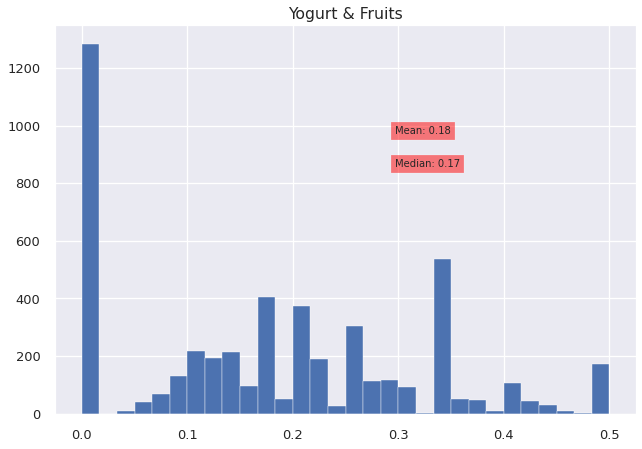

Cluster 6


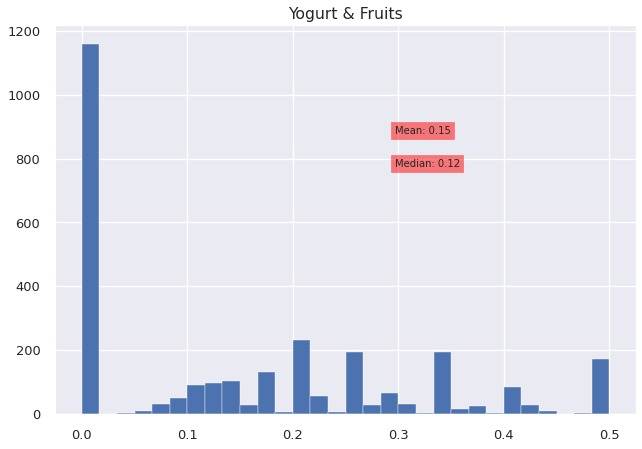

Cluster 7


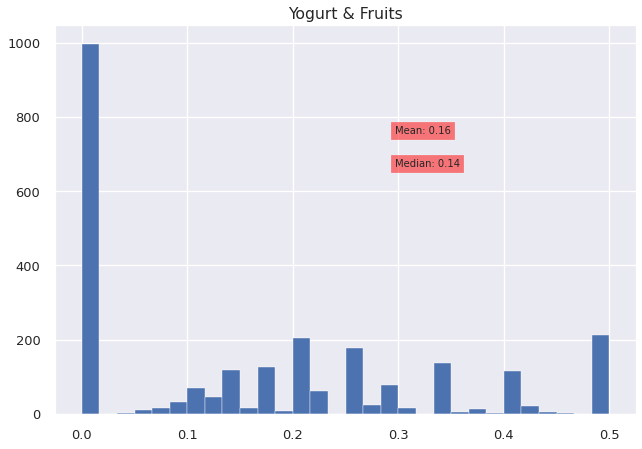

---------------------------------------------------------
count    35321.000000
mean         0.202886
std          0.170425
min          0.000000
25%          0.096774
50%          0.181818
75%          0.272727
max          1.000000
Name: Fruits & Vegs, dtype: float64
Cluster 0


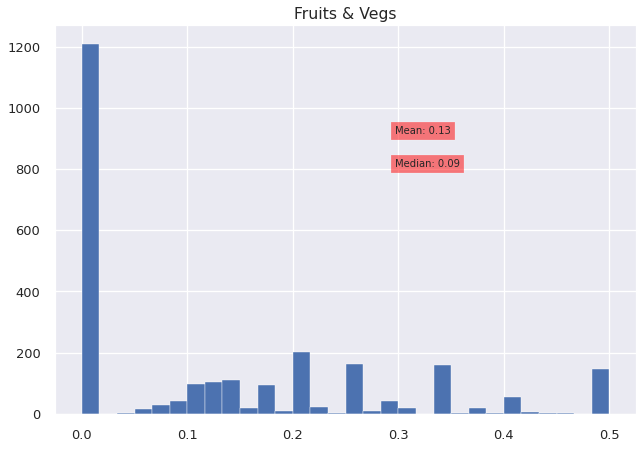

Cluster 1


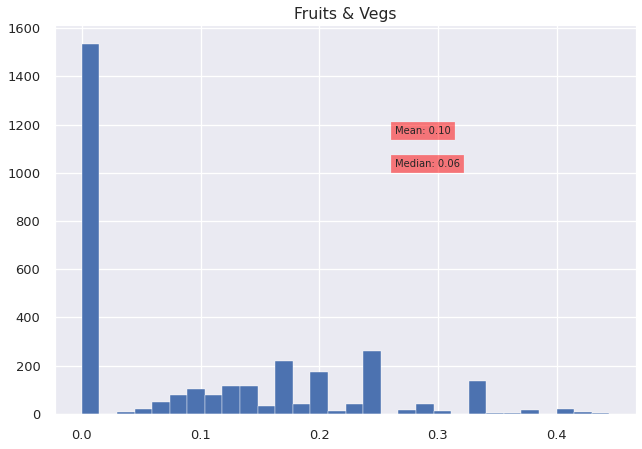

Cluster 2


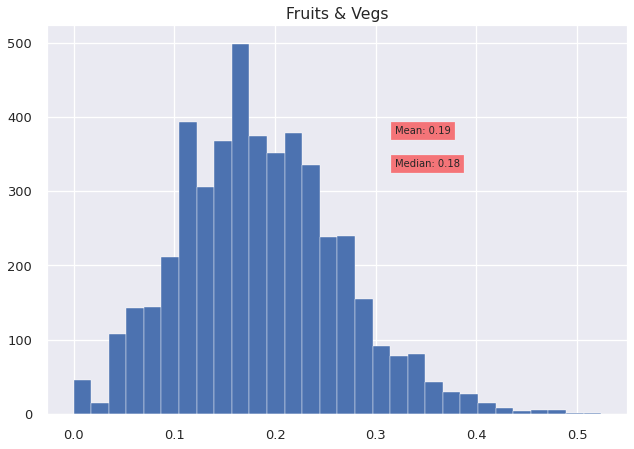

Cluster 3


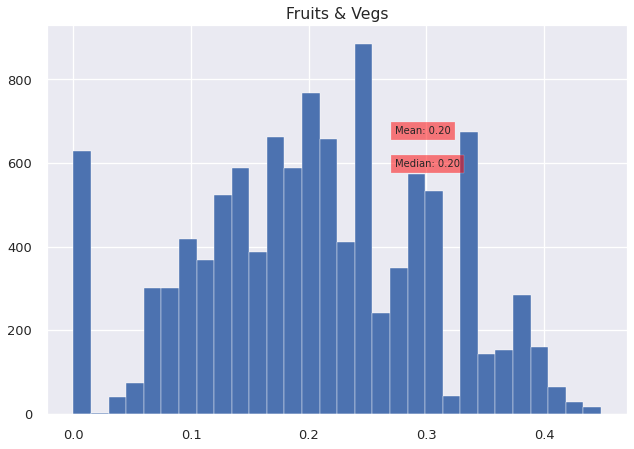

Cluster 4


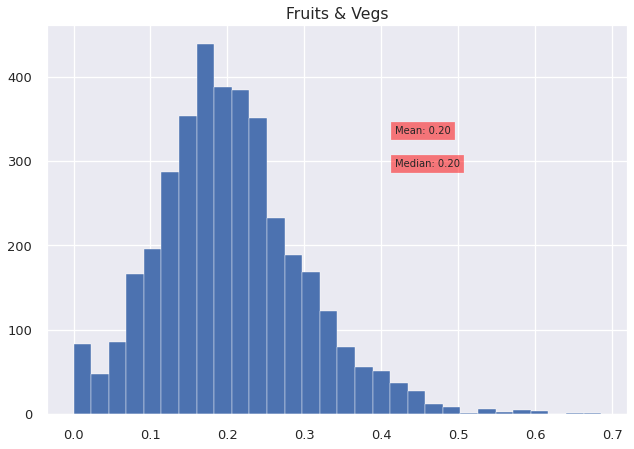

Cluster 5


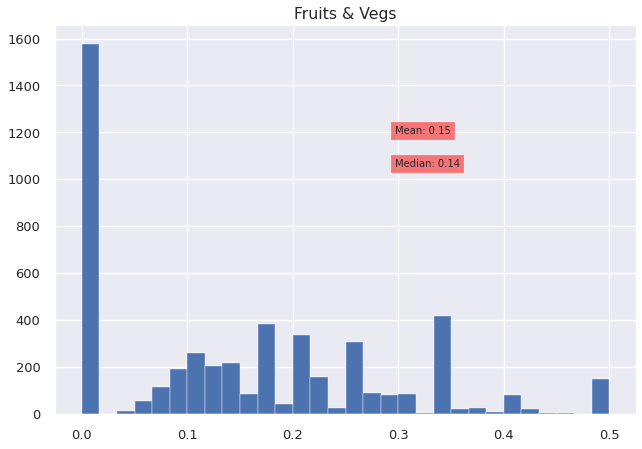

Cluster 6


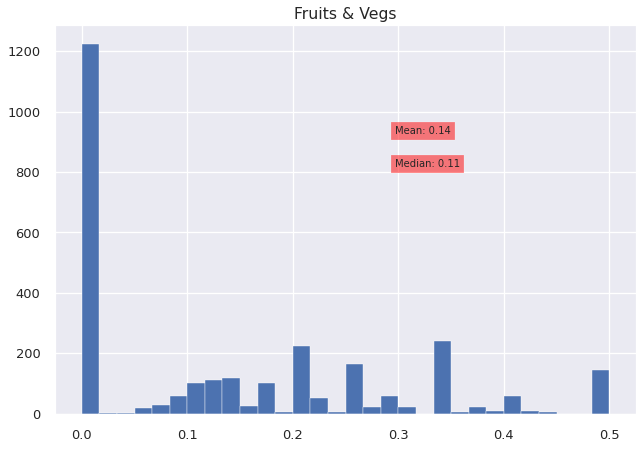

Cluster 7


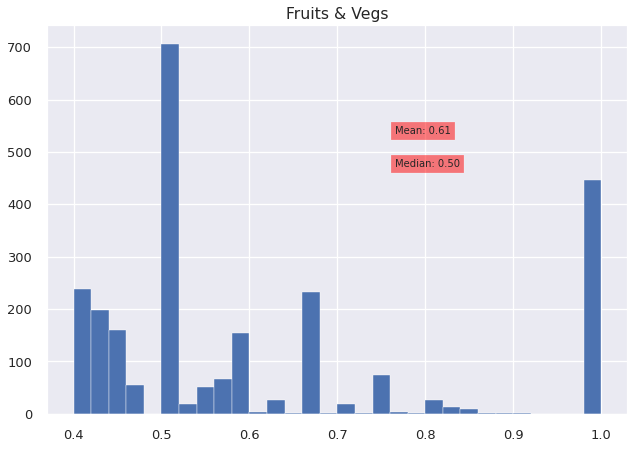

---------------------------------------------------------
count    35321.000000
mean         0.188082
std          0.164036
min          0.000000
25%          0.062500
50%          0.166667
75%          0.272727
max          1.000000
Name: Packed Vegs & Fruits, dtype: float64
Cluster 0


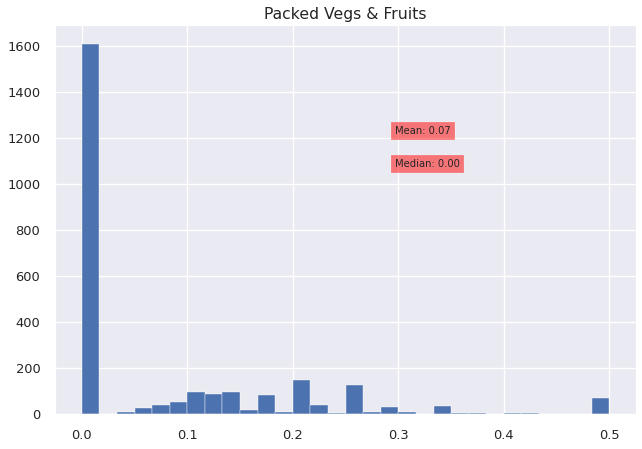

Cluster 1


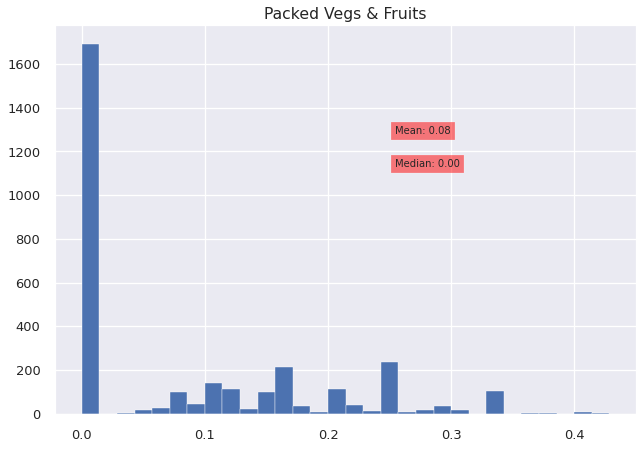

Cluster 2


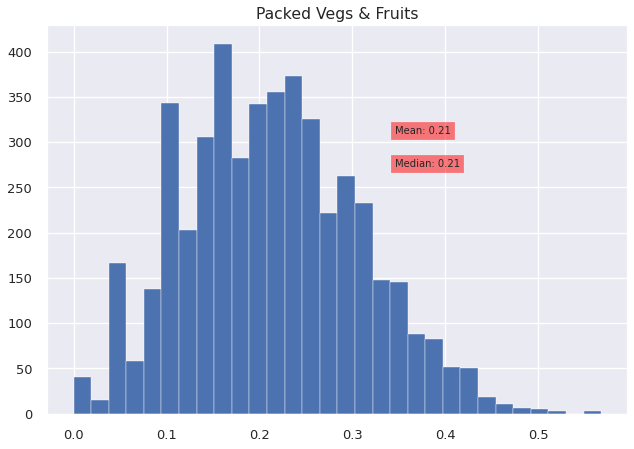

Cluster 3


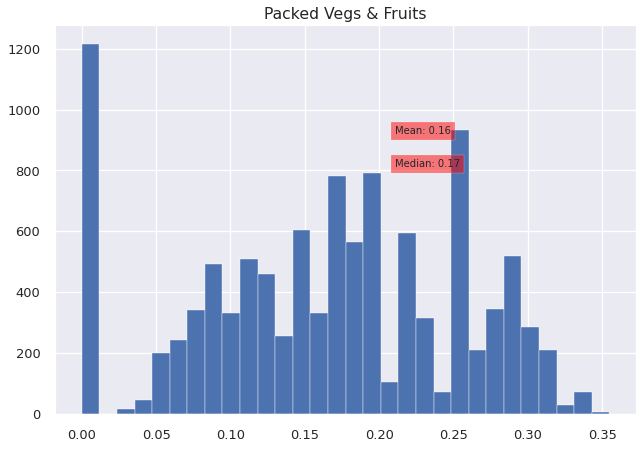

Cluster 4


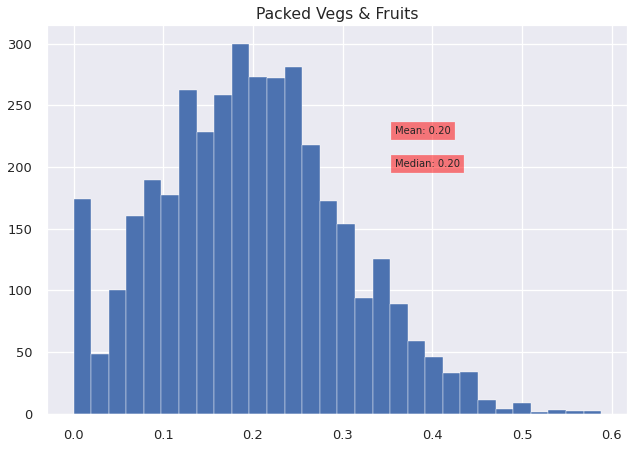

Cluster 5


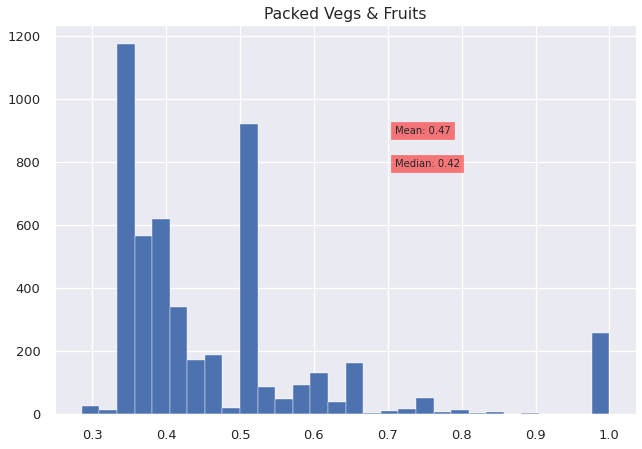

Cluster 6


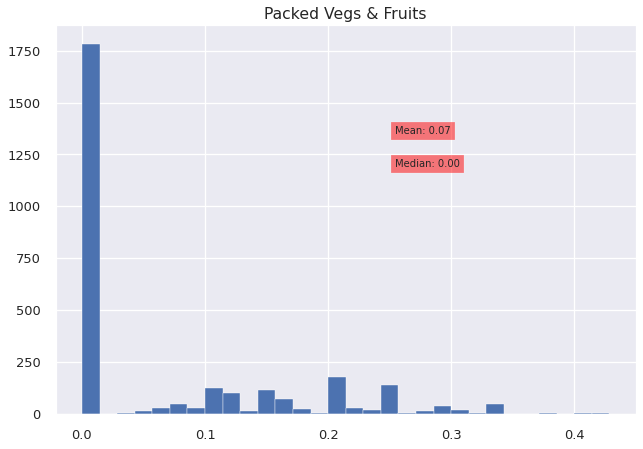

Cluster 7


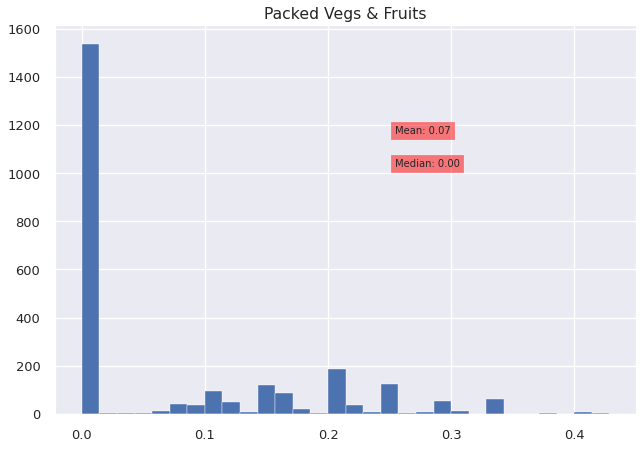

---------------------------------------------------------
count    35321.000000
mean         0.162729
std          0.163239
min          0.000000
25%          0.027027
50%          0.137931
75%          0.230769
max          1.000000
Name: Pretzels Lovers, dtype: float64
Cluster 0


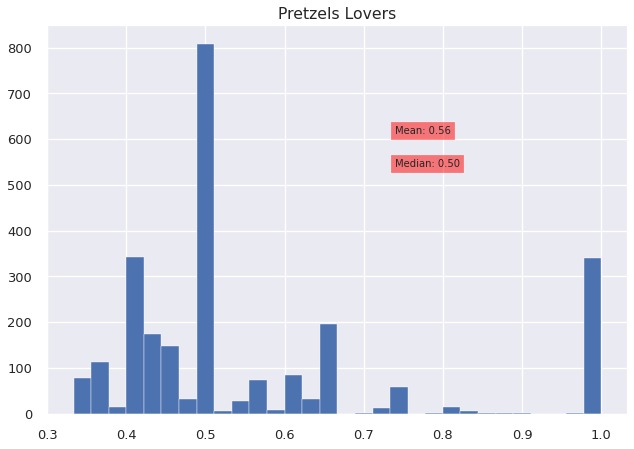

Cluster 1


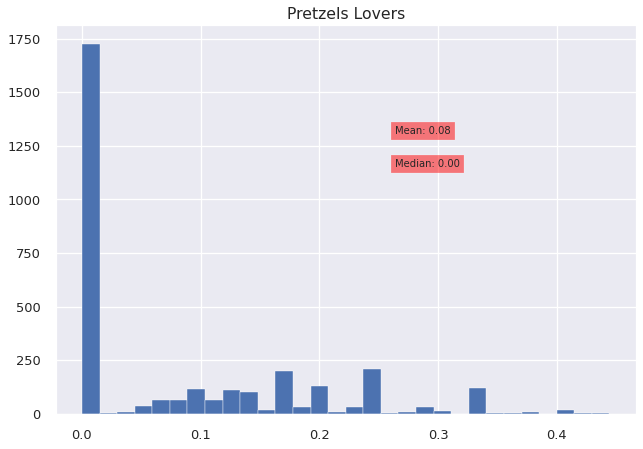

Cluster 2


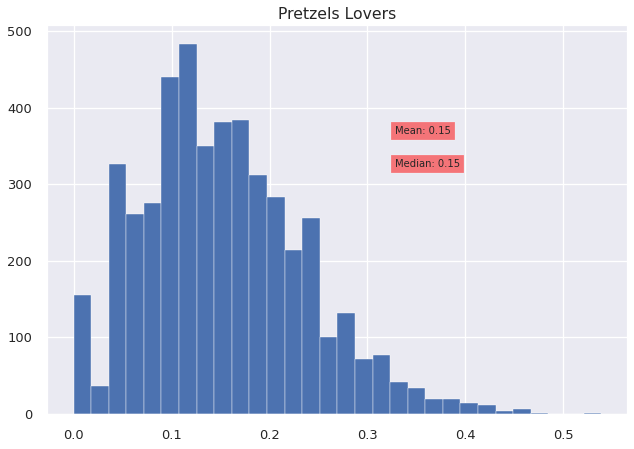

Cluster 3


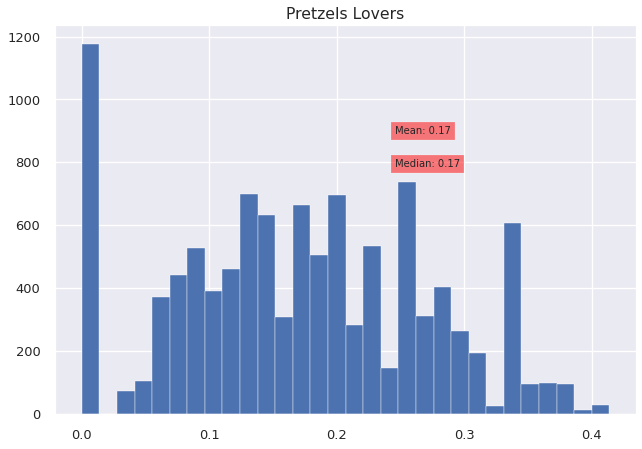

Cluster 4


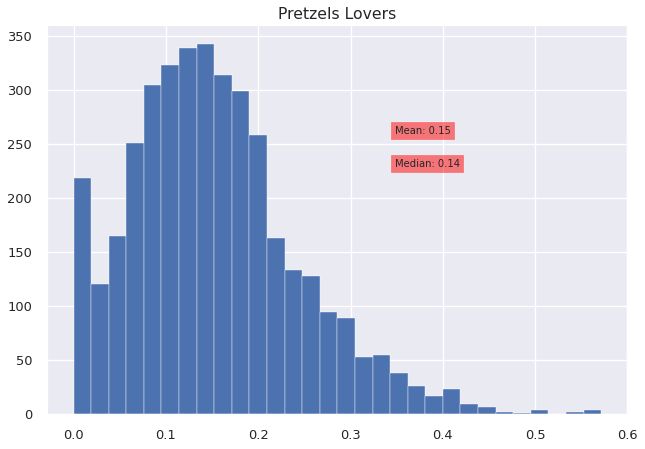

Cluster 5


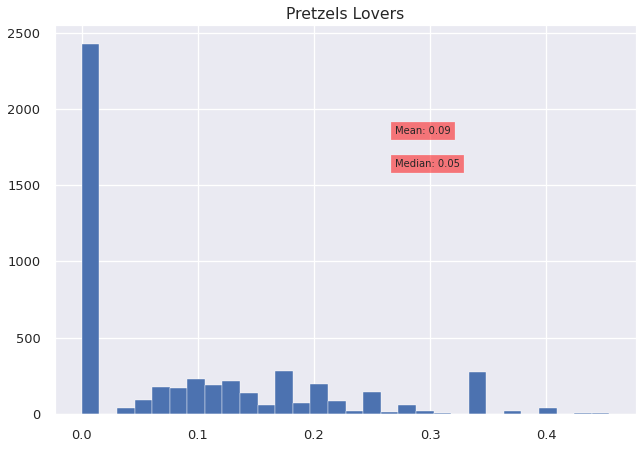

Cluster 6


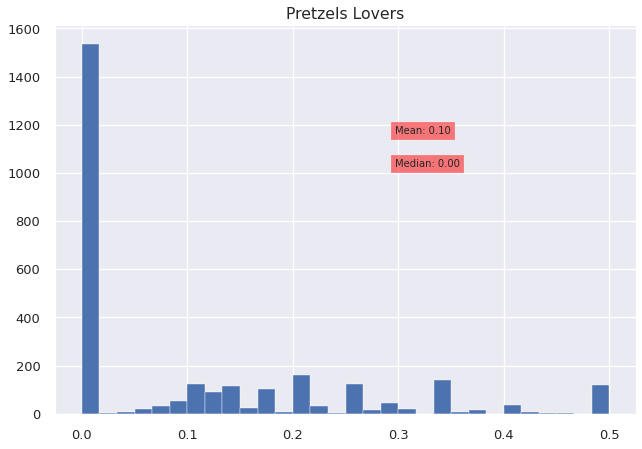

Cluster 7


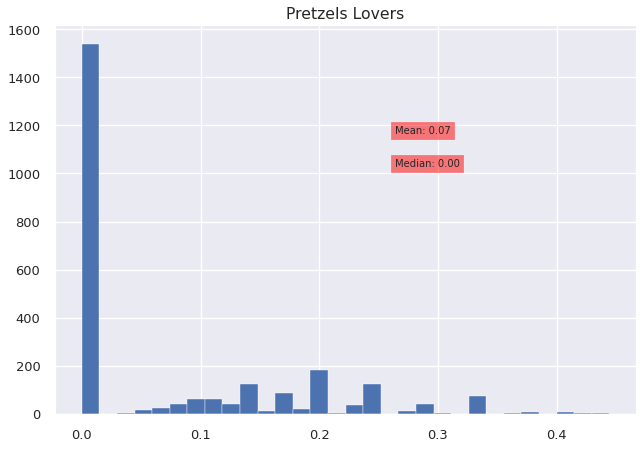

---------------------------------------------------------
count    35321.000000
mean         0.180268
std          0.159221
min          0.000000
25%          0.071429
50%          0.166667
75%          0.250000
max          1.000000
Name: Bread Lover, dtype: float64
Cluster 0


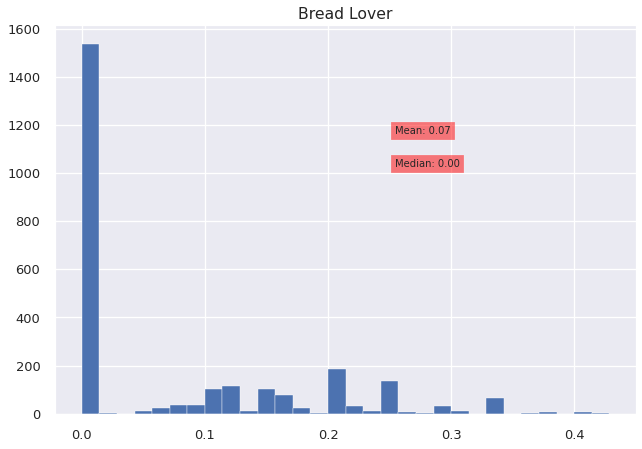

Cluster 1


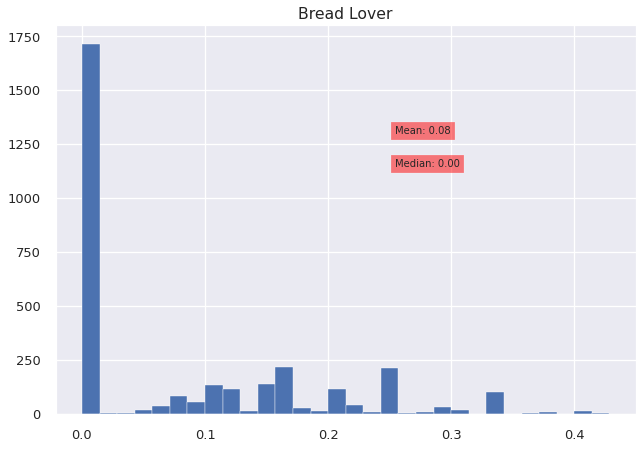

Cluster 2


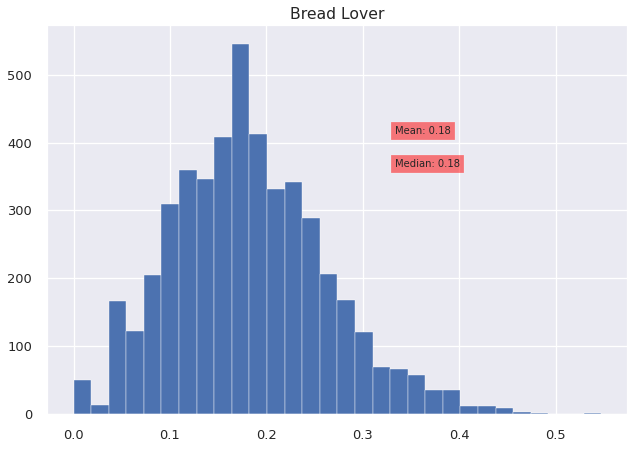

Cluster 3


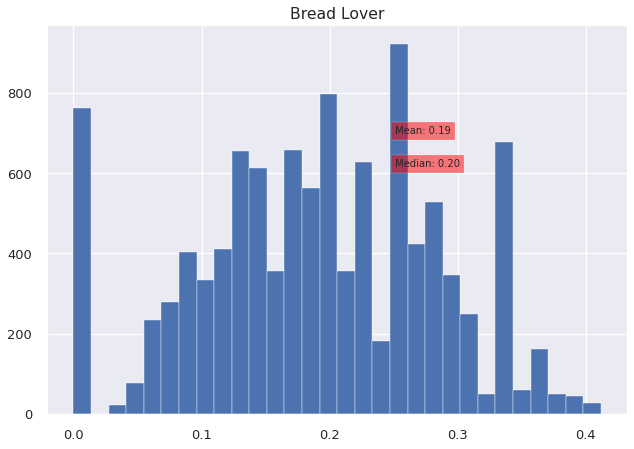

Cluster 4


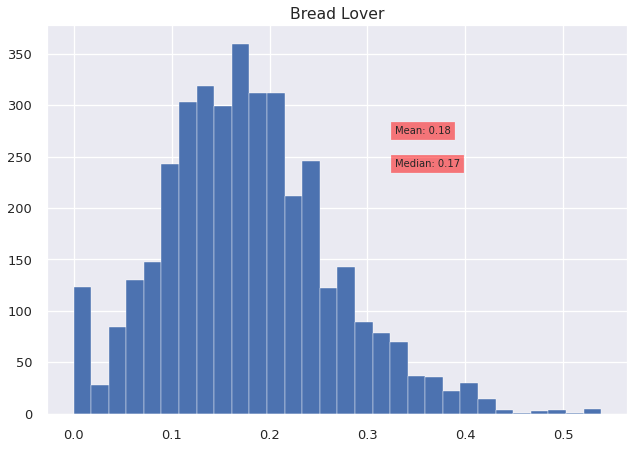

Cluster 5


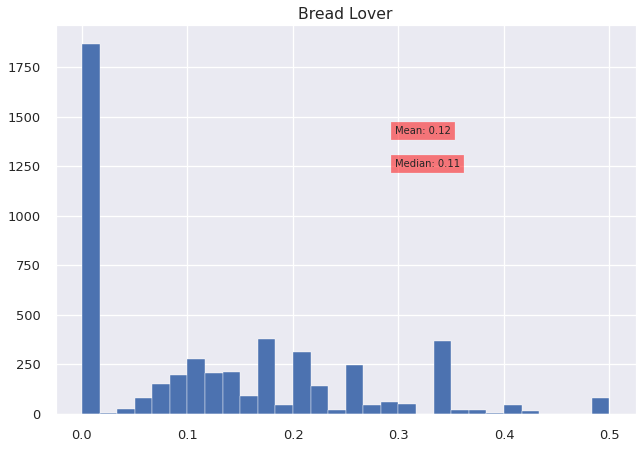

Cluster 6


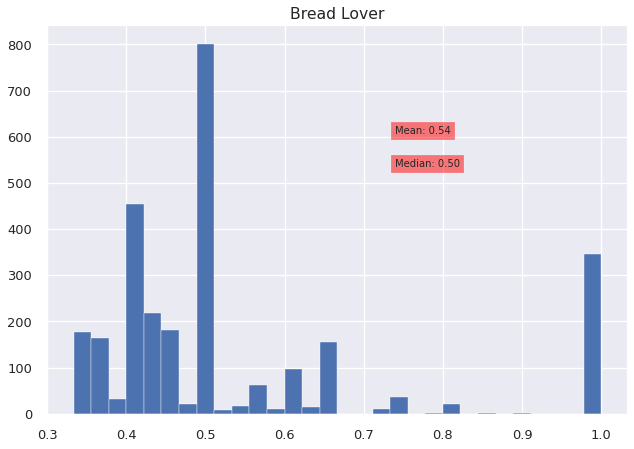

Cluster 7


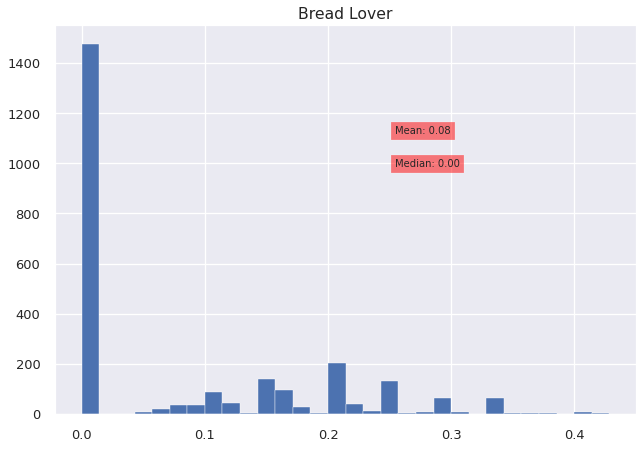

---------------------------------------------------------


In [ ]:
hist_kmeans_clusters(8)

In [ ]:
df_kmeans_clusters(8)

A/Number_Of_Customers B/Count_Orders  ... H/Bread Lover        N/
0                   2577       -23.12 %  ...      -59.02 %  -59.02 %
1                   3124       -19.99 %  ...      -54.83 %  -54.83 %
2                   4691       -17.25 %  ...        1.05 %    1.05 %
3                  10868       -11.60 %  ...        5.16 %    5.16 %
4                   3778       141.27 %  ...       -1.14 %   -1.14 %
5                   4938       -18.82 %  ...      -31.63 %  -31.63 %
6                   2833       -21.85 %  ...      199.22 %  199.22 %
7                   2512       -19.87 %  ...      -56.31 %  -56.31 %

[8 rows x 9 columns]

In [ ]:
def hist_dbscan_clusters(epsilon, minimum):
    ''' For each feature this fonction plot histograms of your dbscan model's clusters.
    
    Parameters:
      
      epsilon (float): the value of eps in DBSCAN clustering
      minimum (int): the value of min_samples in DBSCAN clustering
      
  '''
  
    dbsc = DBSCAN(eps =epsilon, min_samples = minimum).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype = bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels))
  
    fig, ax = plt.subplots(figsize=(7,6))

    for i in ['Count_Orders', 'Average_Products_Order', 'Yogurt & Fruits',
       'Fruits & Vegs', 'Packed Vegs & Fruits', 'Pretzels Lovers',
       'Bread Lover']:
        print(df_customers[i].describe())

        for id_cluster in range(-1, n_clusters_ -1):
            print("Cluster %d" % id_cluster)
            index = np.where(labels == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Median = df_customers[i][index].median()
            plt.hist(df_customers[i][index], bins = 30)
            plt.text(0.85, 0.8, 'Mean: %.2f' % Mean, bbox=dict(facecolor='red',
                                                                  alpha=0.5),
                    transform=ax.transAxes)
            plt.text(0.85, 0.7, 'Median: %.2f' % Median, bbox=dict(facecolor='red',
                                                                    alpha=0.5),
                    transform=ax.transAxes)
            plt.title(i)
            plt.show()
        print('---------------------------------------------------------')

In [ ]:
def df_dbscan_clusters(epsilon, minimum):
    ''' Show a dataframe with the average percentage difference betwean the mean 
        of each feature and the value of each point for each dbscan model's clusters.
  
    Parameters:
      
        epsilon (float): the value of eps in DBSCAN clustering
        minimum (int): the value of min_samples in DBSCAN clustering
      
    '''
  
    dbsc = DBSCAN(eps =epsilon, min_samples = minimum).fit(df_standard)
    core_samples = np.zeros_like(dbsc.labels_, dtype = bool)
    core_samples[dbsc.core_sample_indices_] = True
    labels = dbsc.labels_
    n_clusters_ = len(set(labels))
    my_dict={}
    alphabet = 'BCDEFGHIJKLM'
    my_dict['A/Number_Of_Customers'] = [len(np.where(labels == id_cluster)[0])
                                      for id_cluster in range(-1, n_clusters_ -1)]

    for h,i in enumerate(['Count_Orders', 'Average_Products_Order', 'Yogurt & Fruits',
       'Fruits & Vegs', 'Packed Vegs & Fruits', 'Pretzels Lovers',
       'Bread Lover']):
        feature = []

        for id_cluster in range(-1, n_clusters_ -1):
            index = np.where(labels == id_cluster)[0]
            Mean = df_customers[i][index].mean()
            Mean_feature = df_customers[i].mean()
            pourcentage_mean = str('%.2f' % ((Mean - Mean_feature)*100/Mean_feature)) + ' %'
            feature.append(pourcentage_mean)
      
        my_dict[alphabet[h] + '/' + i] = feature
     
    Clusters_df = pd.DataFrame(my_dict, index=range(-1, n_clusters_ -1))
  
    return Clusters_df.head(n_clusters_)

count    35321.000000
mean         1.520738
std          0.926963
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: Count_Orders, dtype: float64
Cluster -1


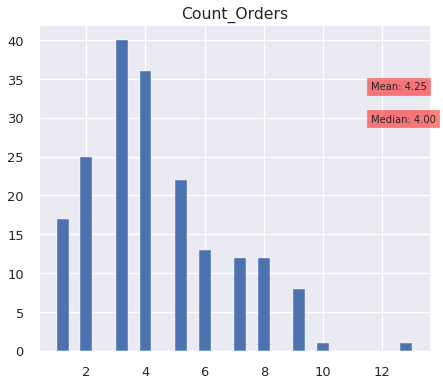

Cluster 0


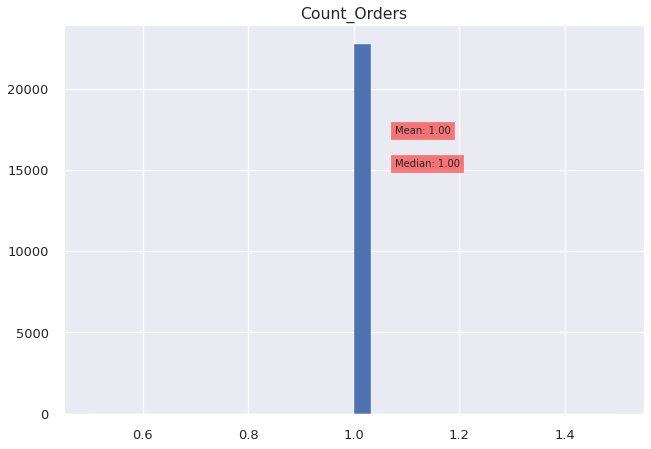

Cluster 1


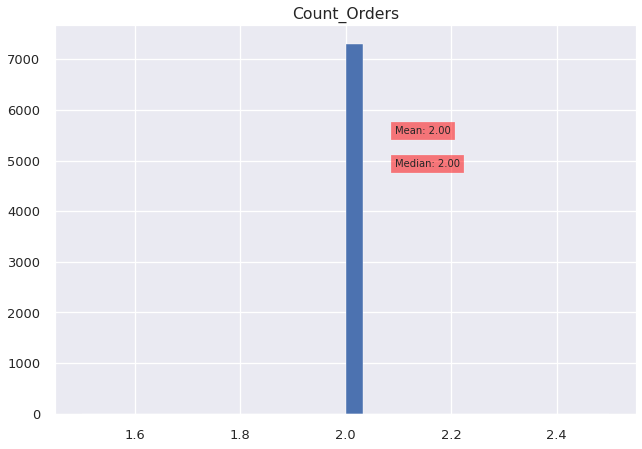

Cluster 2


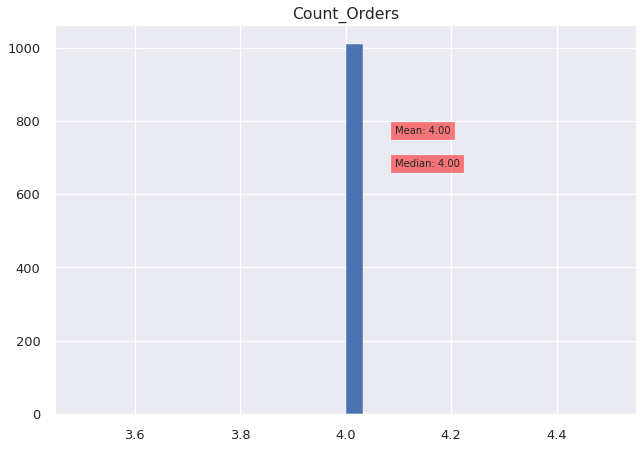

Cluster 3


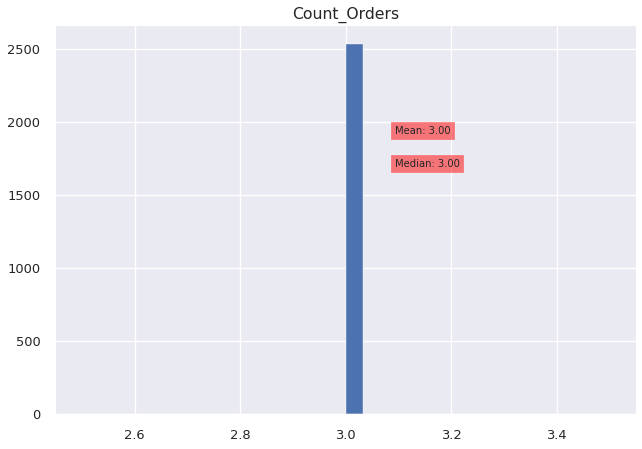

Cluster 4


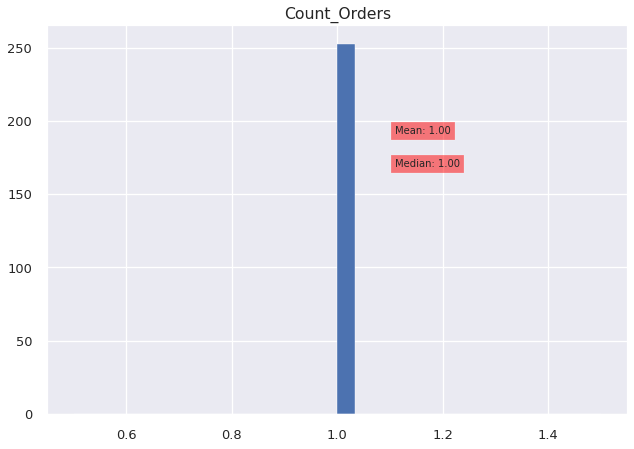

Cluster 5


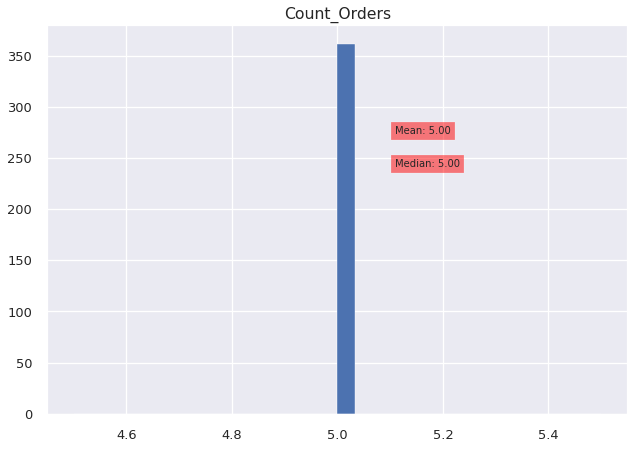

Cluster 6


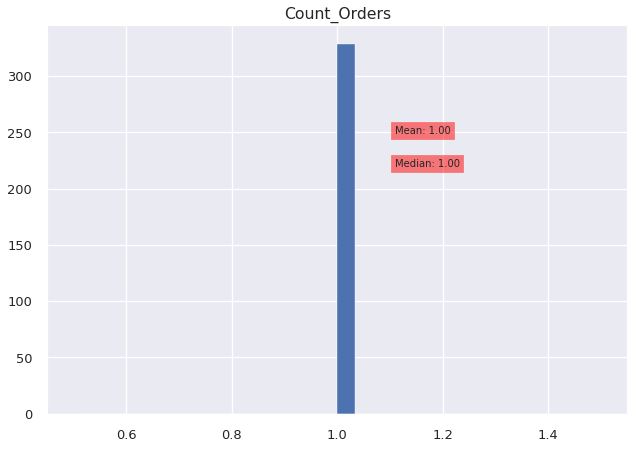

Cluster 7


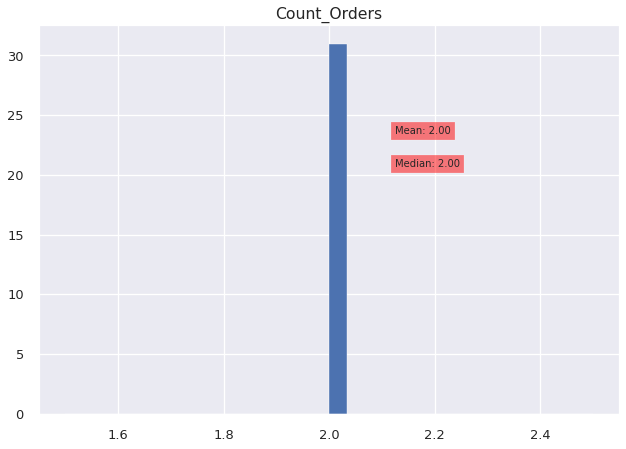

Cluster 8


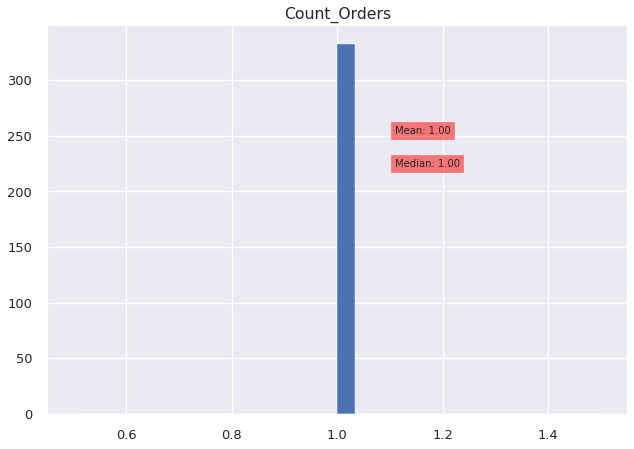

Cluster 9


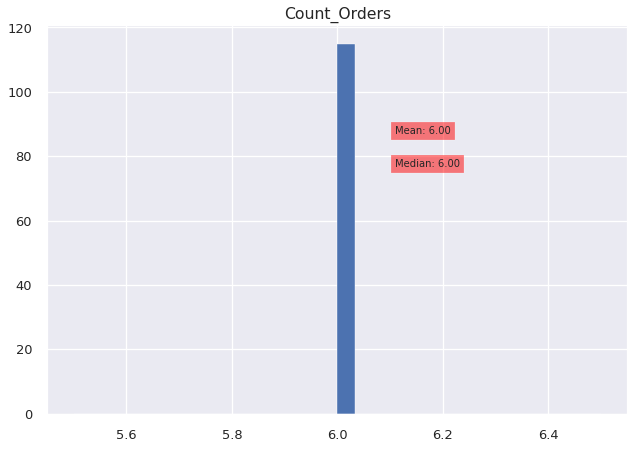

Cluster 10


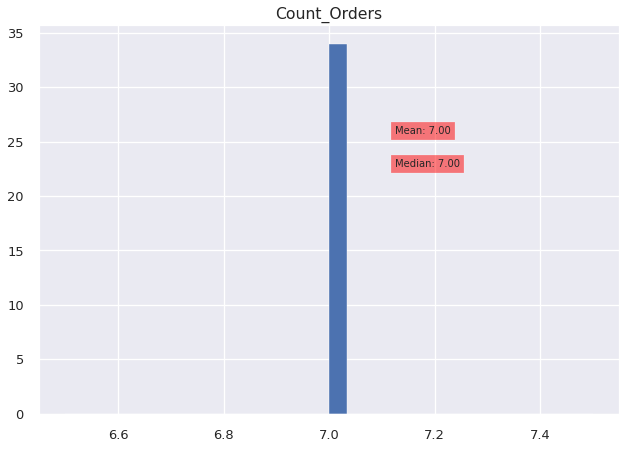

Cluster 11


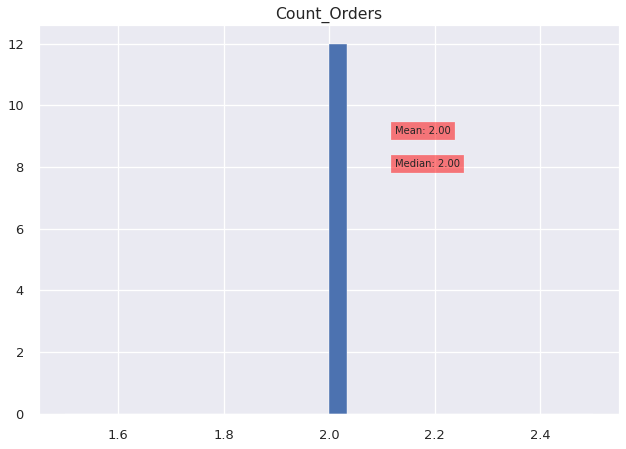

Cluster 12


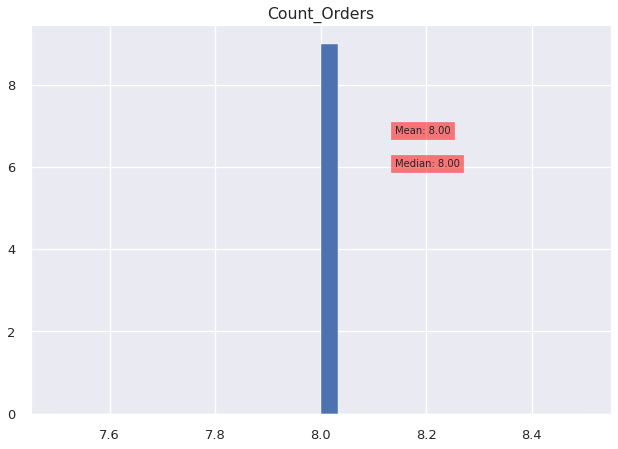

Cluster 13


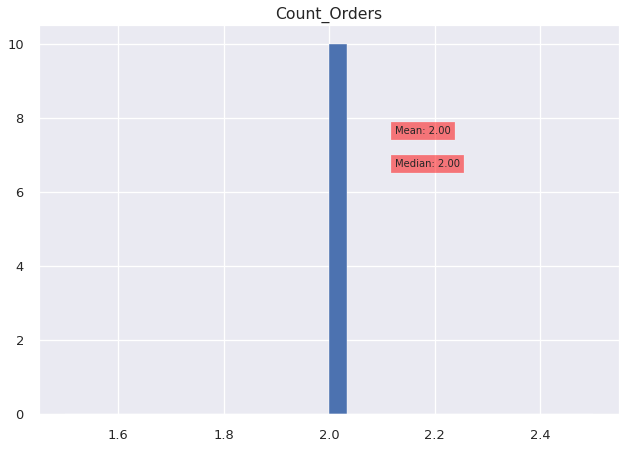

Cluster 14


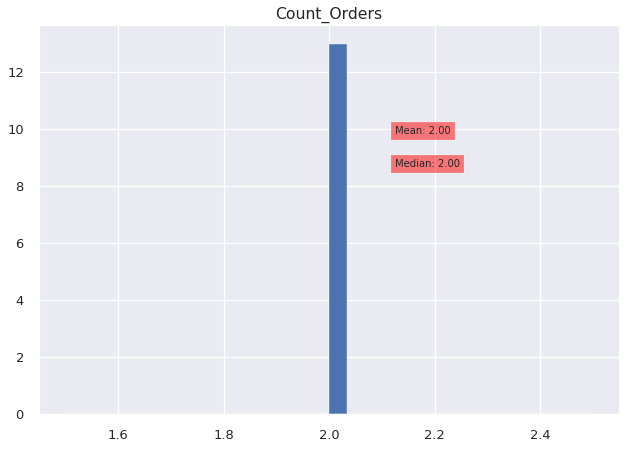

Cluster 15


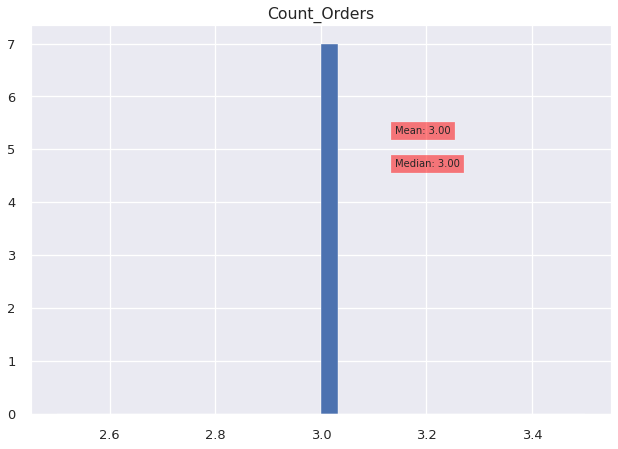

---------------------------------------------------------
count    35321.000000
mean        10.097244
std          7.258420
min          1.000000
25%          5.000000
50%          8.500000
75%         13.500000
max        127.000000
Name: Average_Products_Order, dtype: float64
Cluster -1


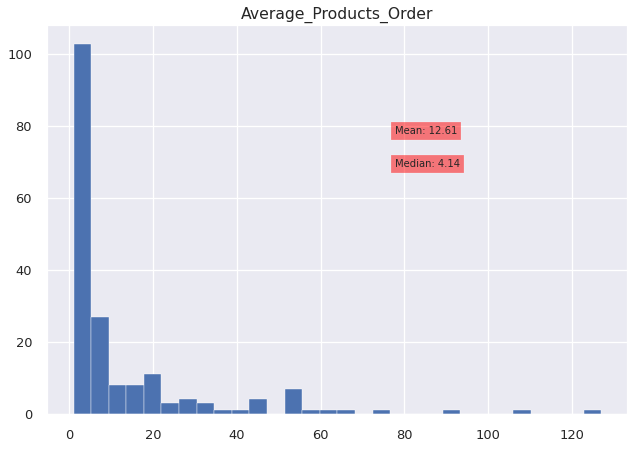

Cluster 0


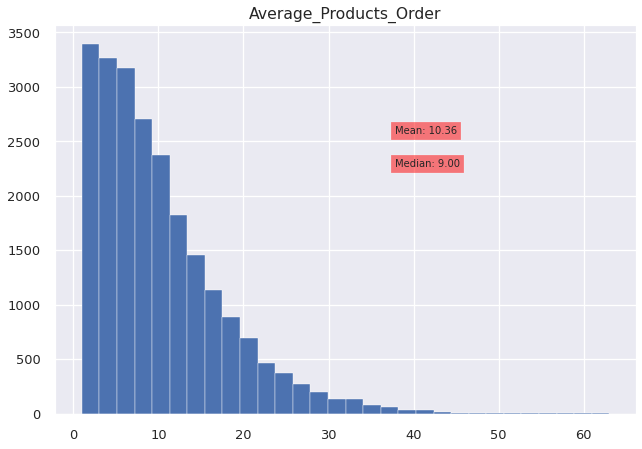

Cluster 1


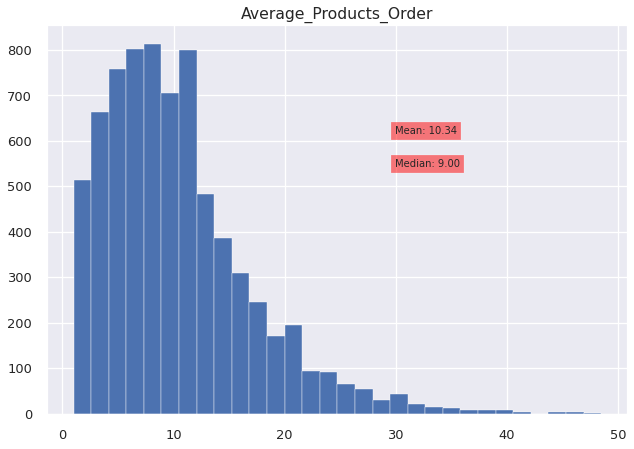

Cluster 2


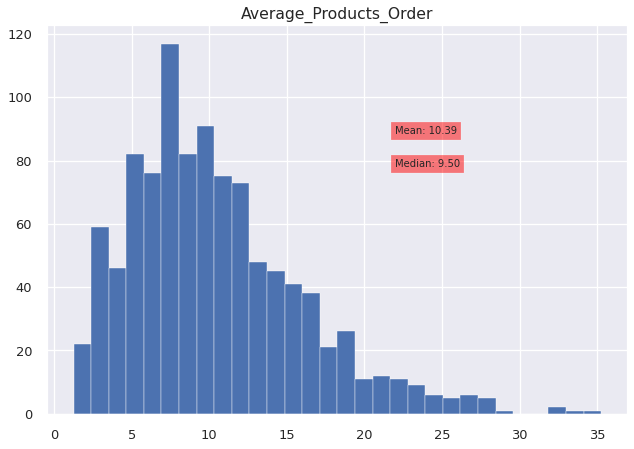

Cluster 3


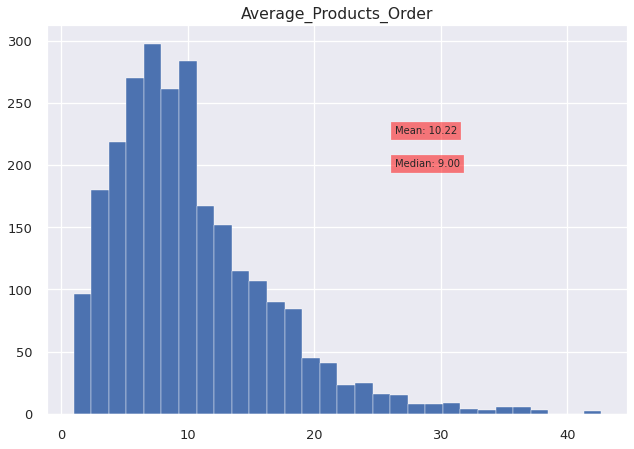

Cluster 4


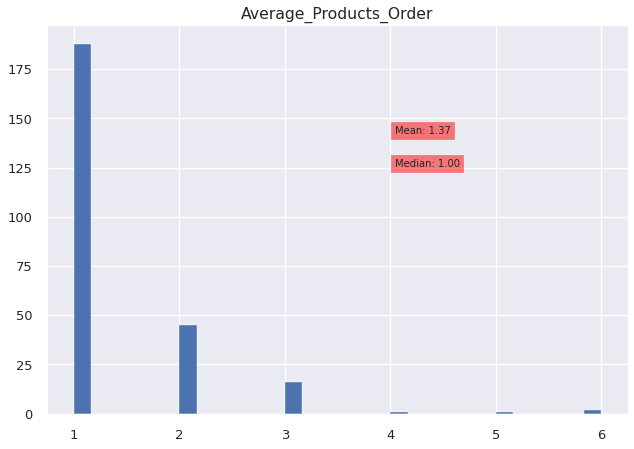

Cluster 5


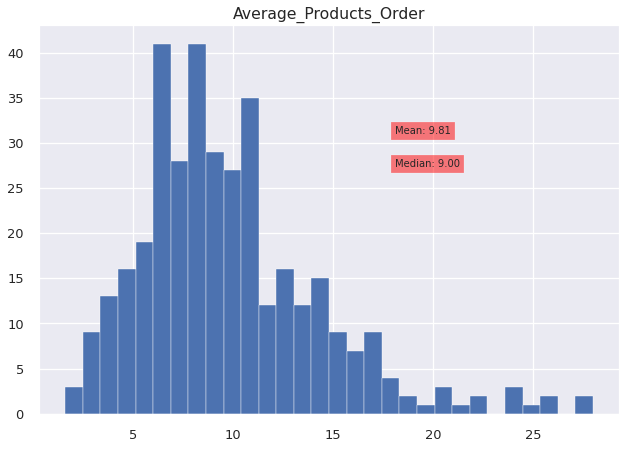

Cluster 6


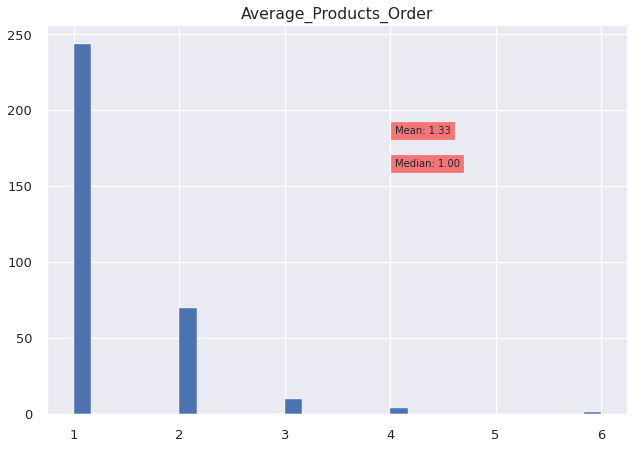

Cluster 7


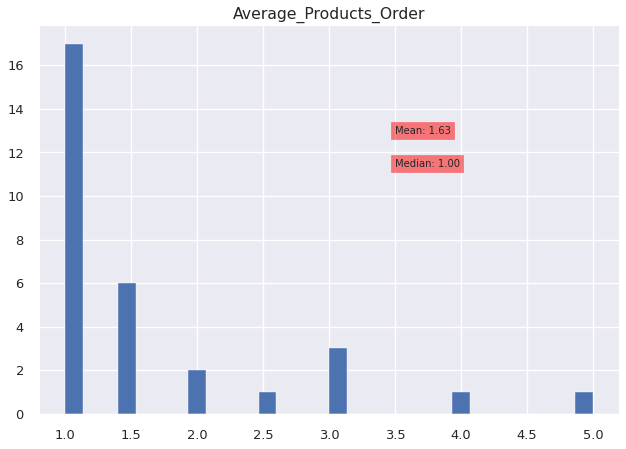

Cluster 8


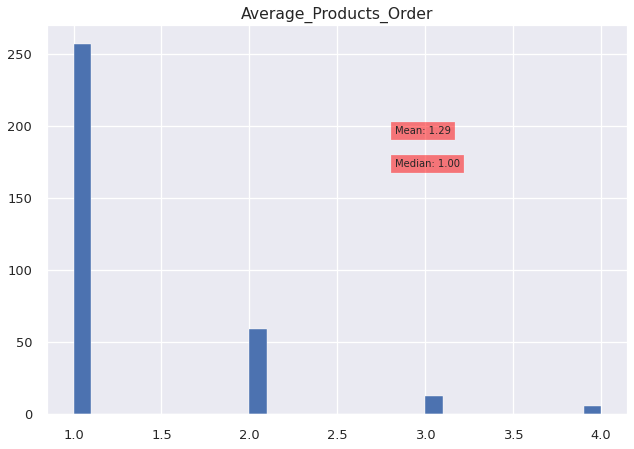

Cluster 9


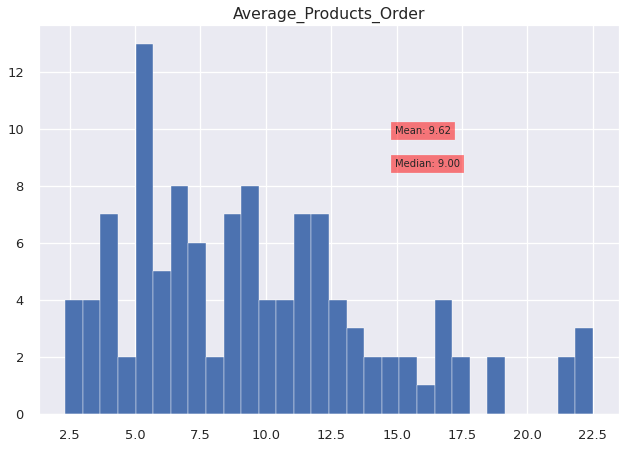

Cluster 10


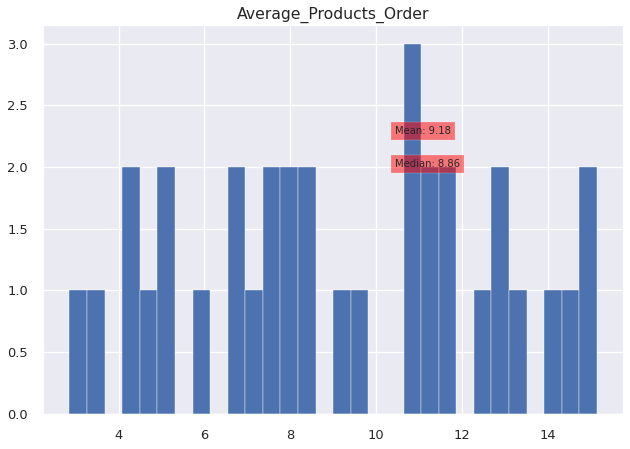

Cluster 11


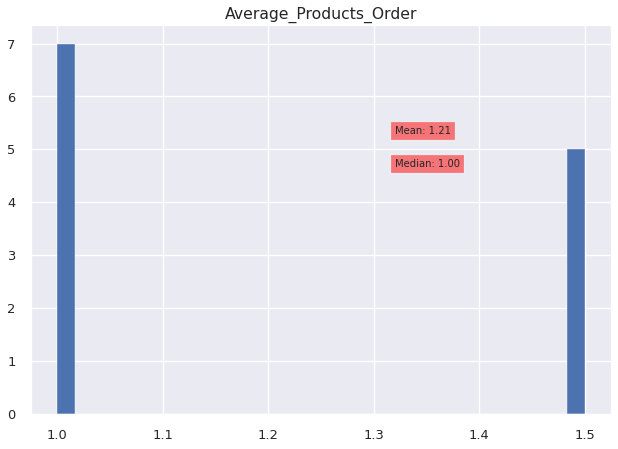

Cluster 12


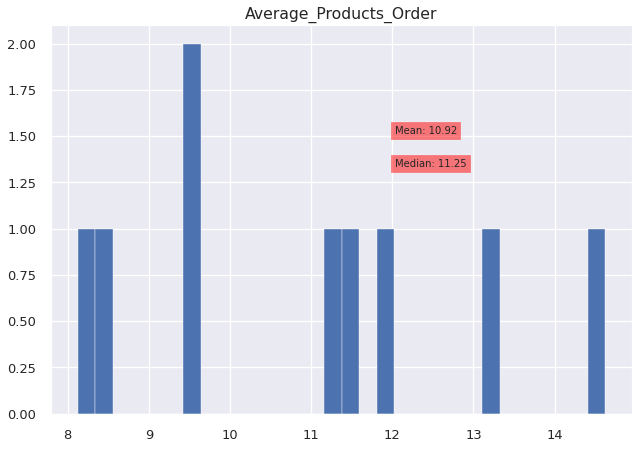

Cluster 13


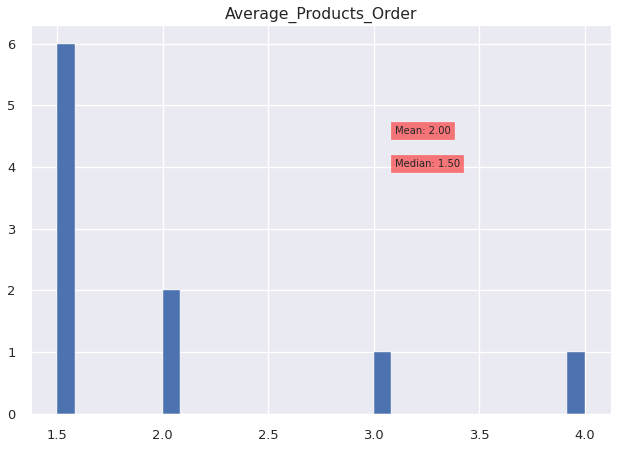

Cluster 14


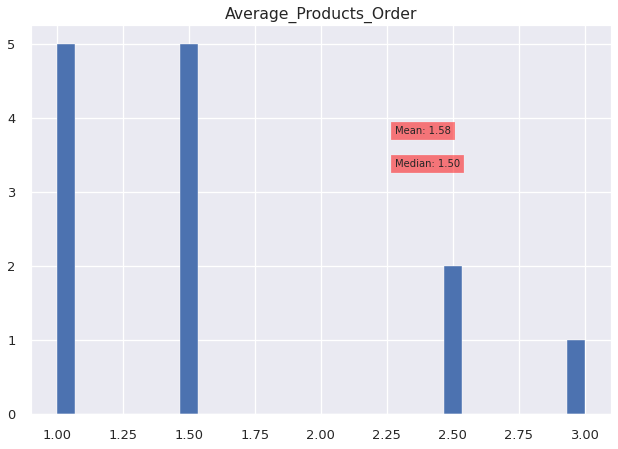

Cluster 15


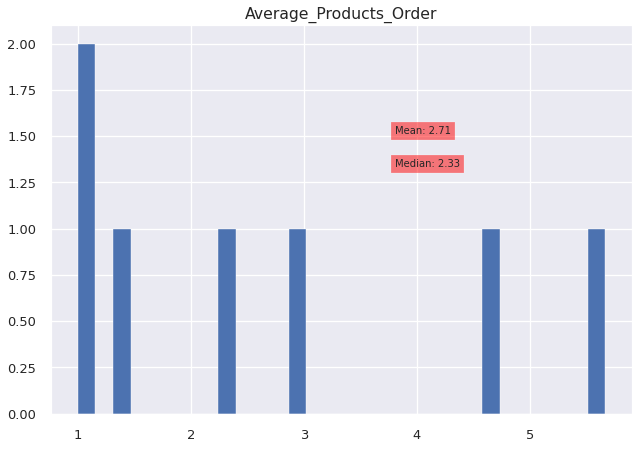

---------------------------------------------------------
count    35321.000000
mean         0.266036
std          0.185490
min          0.000000
25%          0.150000
50%          0.250000
75%          0.355556
max          1.000000
Name: Yogurt & Fruits, dtype: float64
Cluster -1


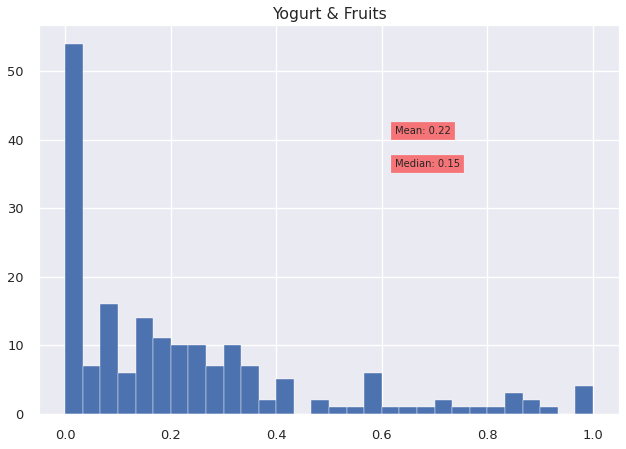

Cluster 0


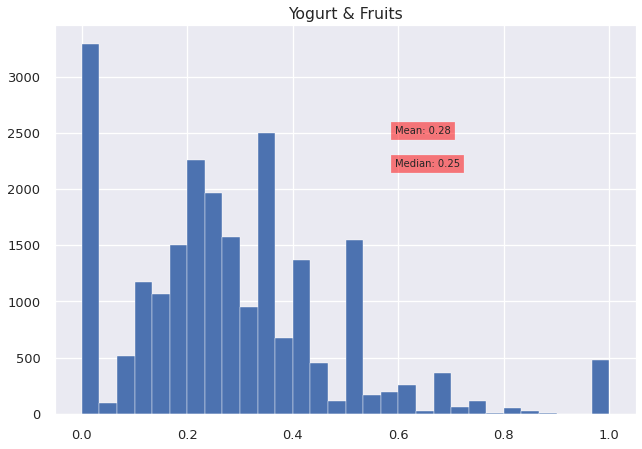

Cluster 1


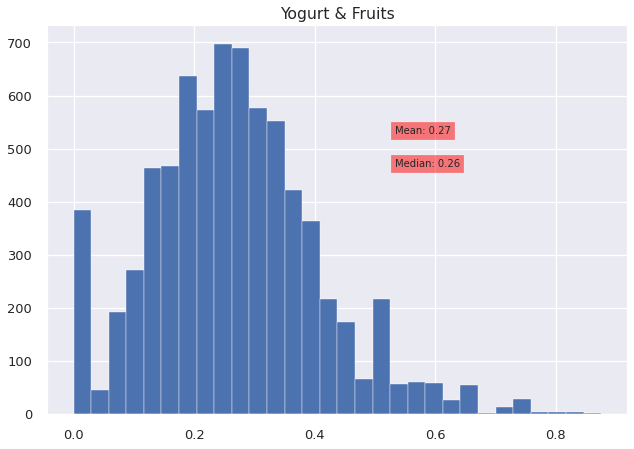

Cluster 2


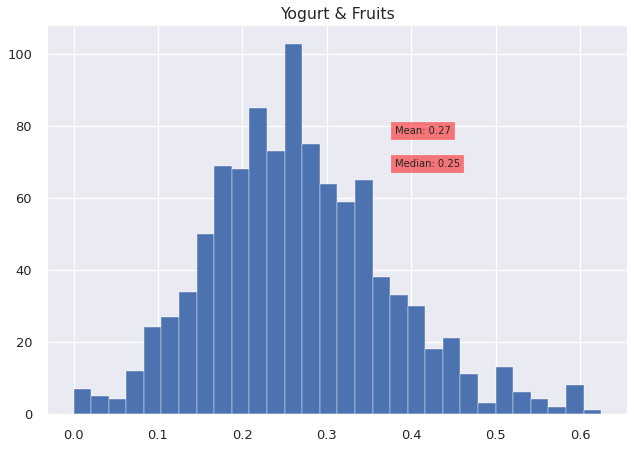

Cluster 3


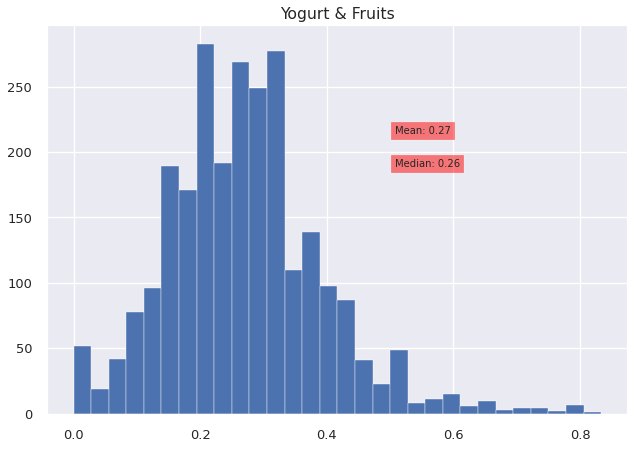

Cluster 4


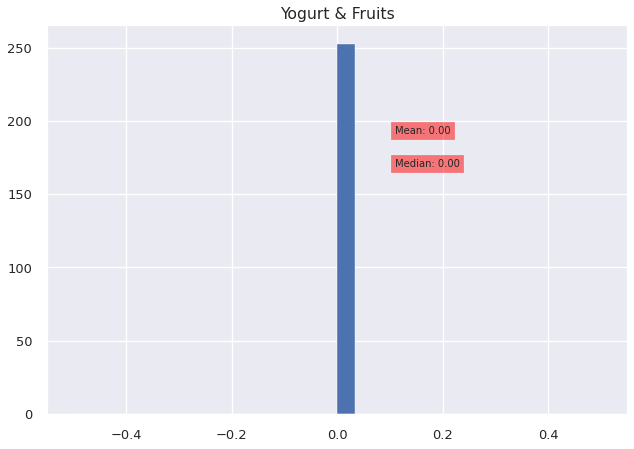

Cluster 5


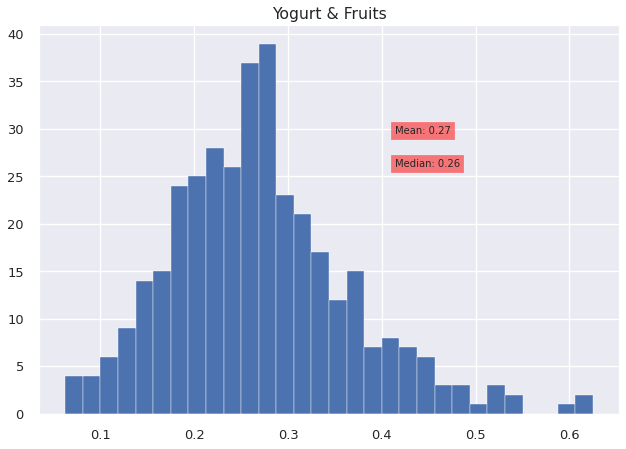

Cluster 6


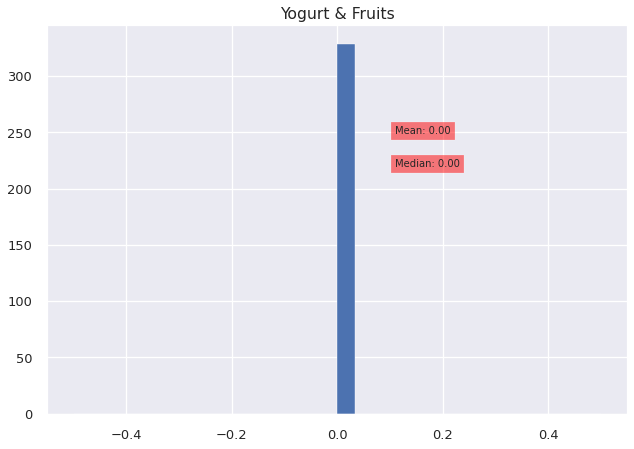

Cluster 7


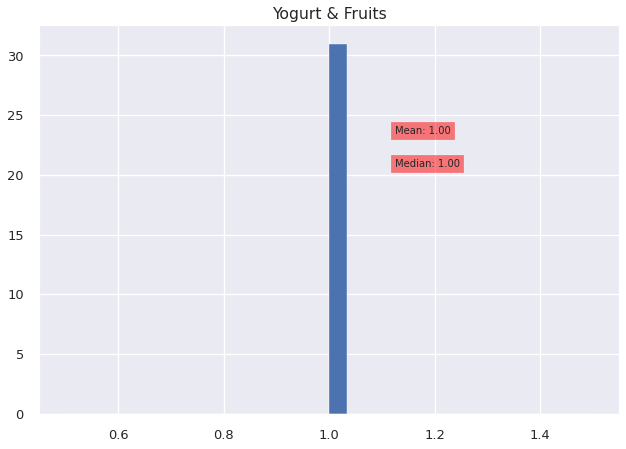

Cluster 8


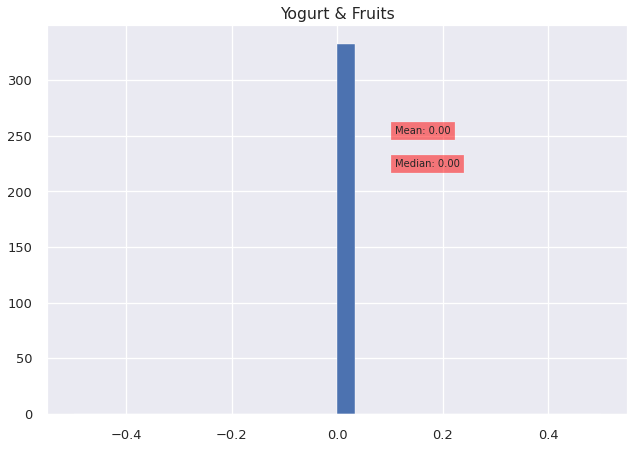

Cluster 9


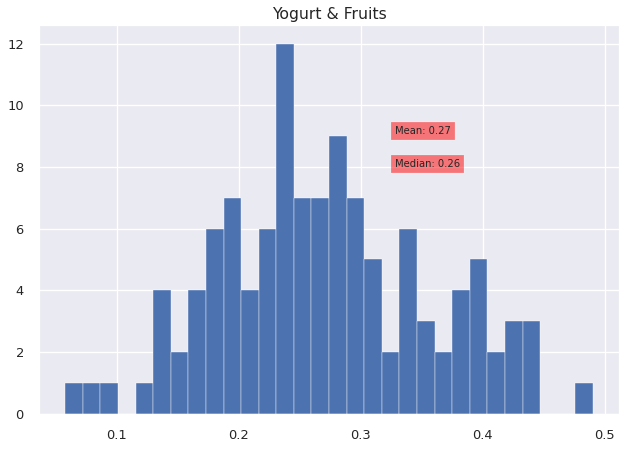

Cluster 10


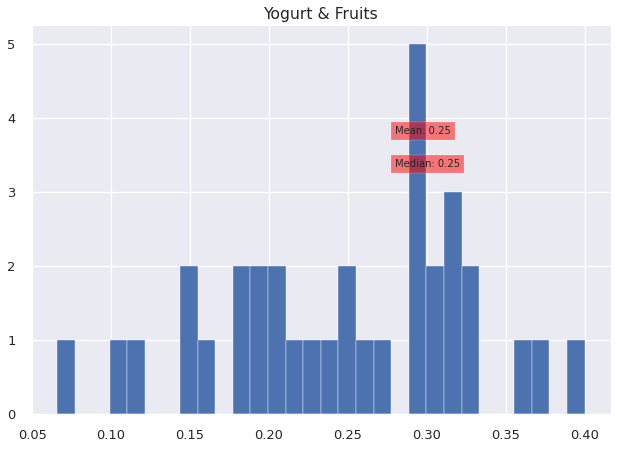

Cluster 11


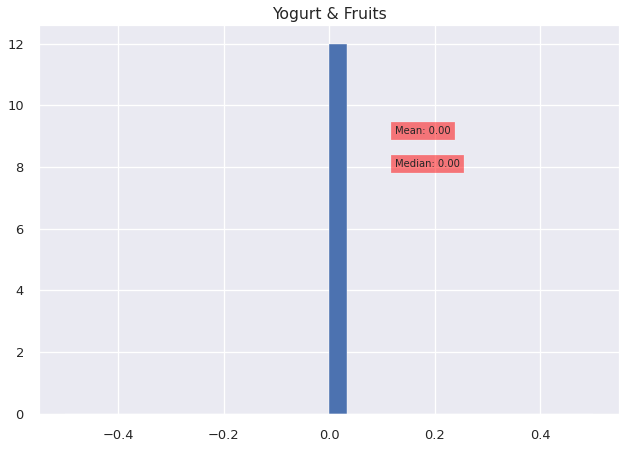

Cluster 12


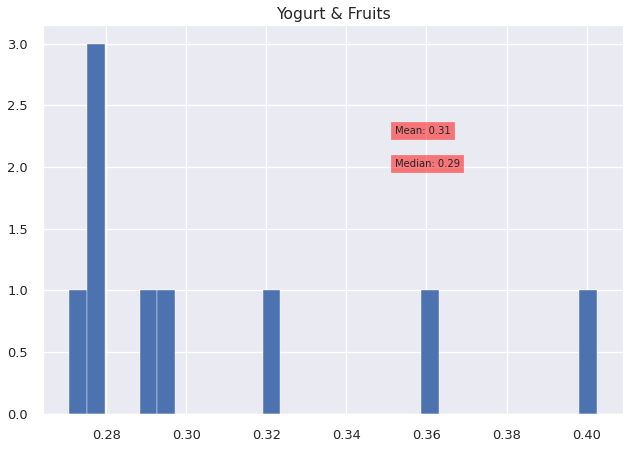

Cluster 13


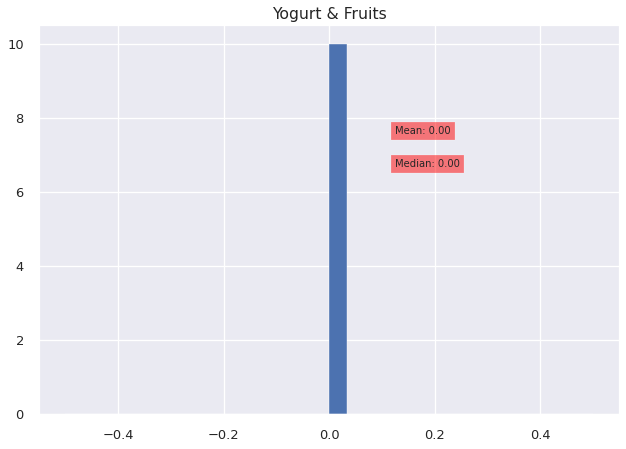

Cluster 14


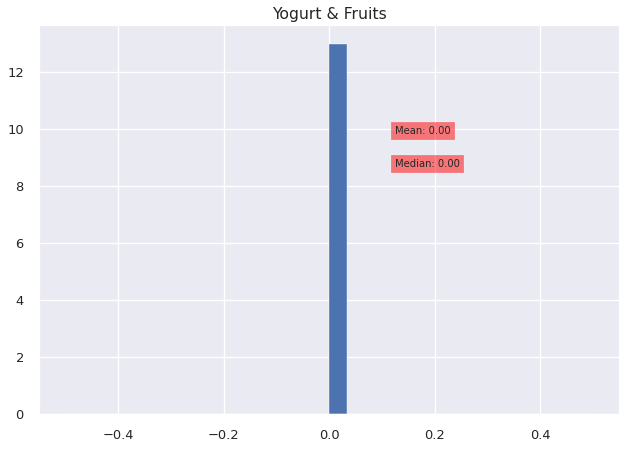

Cluster 15


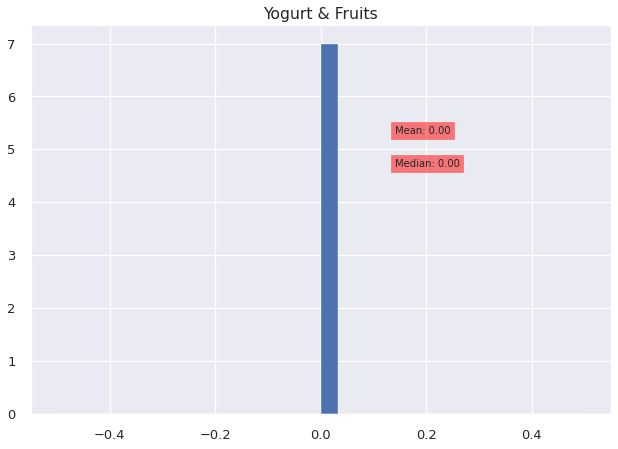

---------------------------------------------------------
count    35321.000000
mean         0.202886
std          0.170425
min          0.000000
25%          0.096774
50%          0.181818
75%          0.272727
max          1.000000
Name: Fruits & Vegs, dtype: float64
Cluster -1


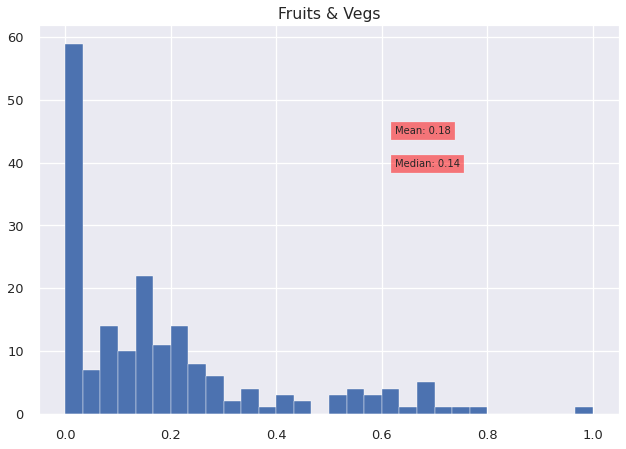

Cluster 0


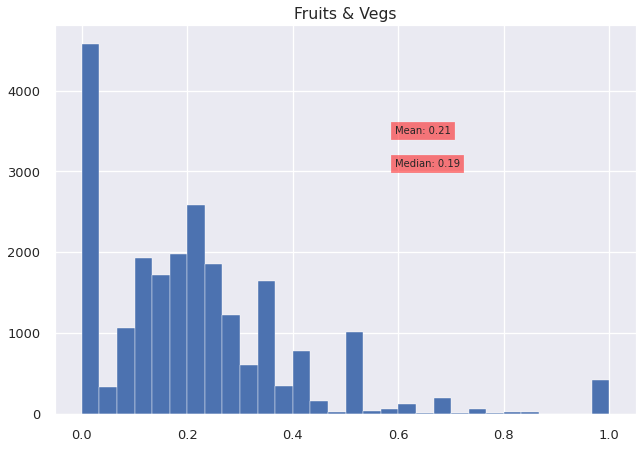

Cluster 1


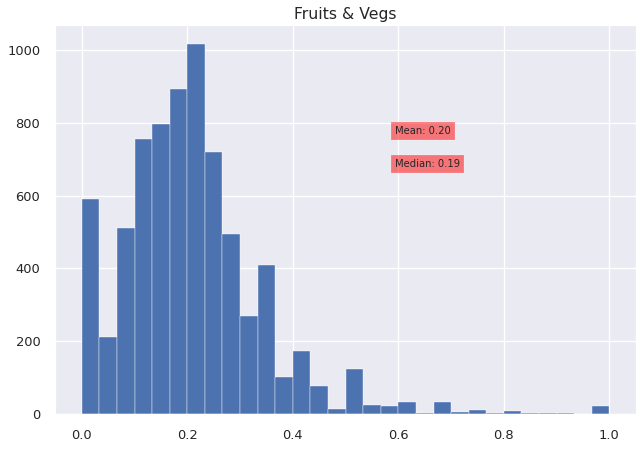

Cluster 2


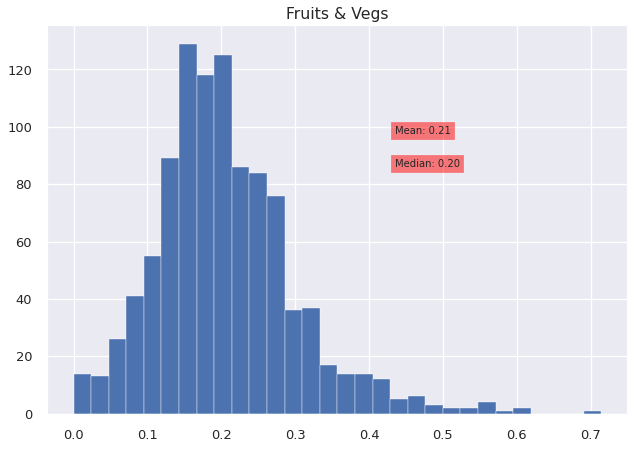

Cluster 3


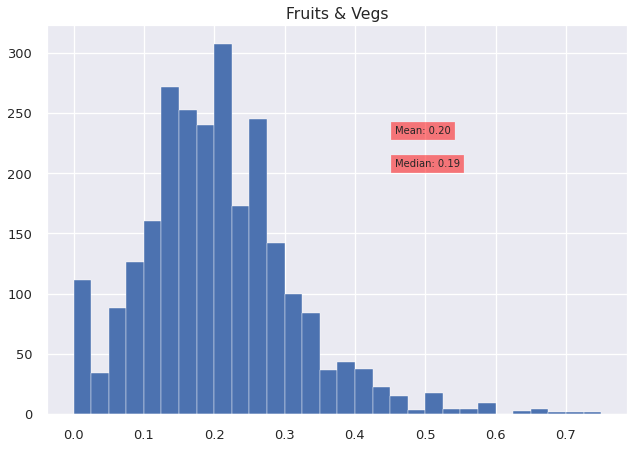

Cluster 4


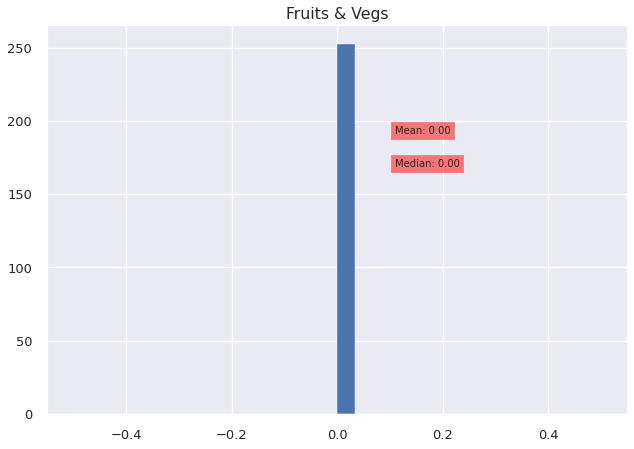

Cluster 5


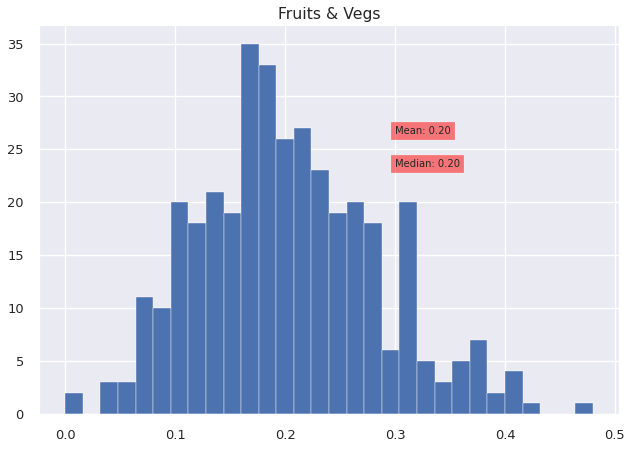

Cluster 6


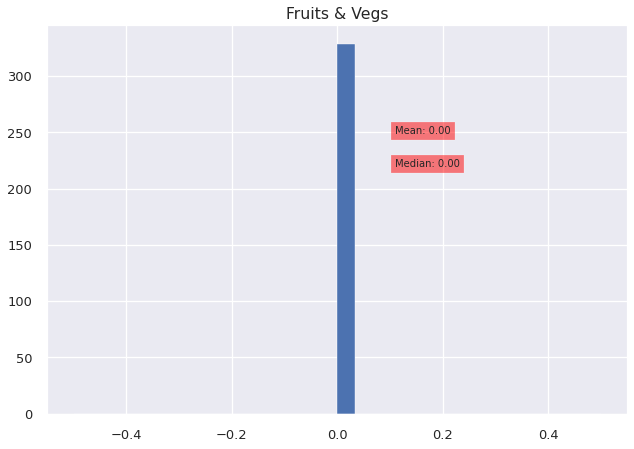

Cluster 7


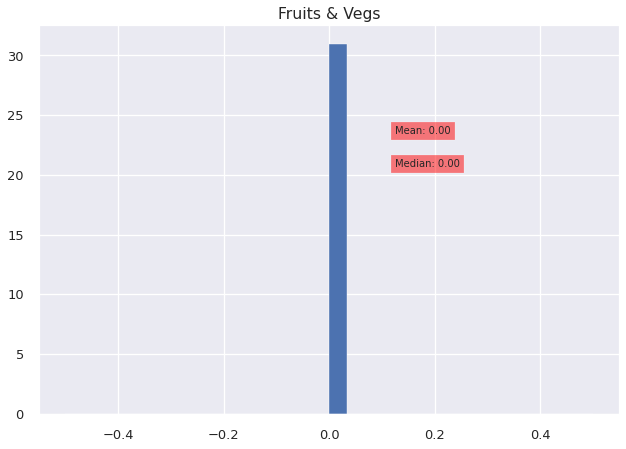

Cluster 8


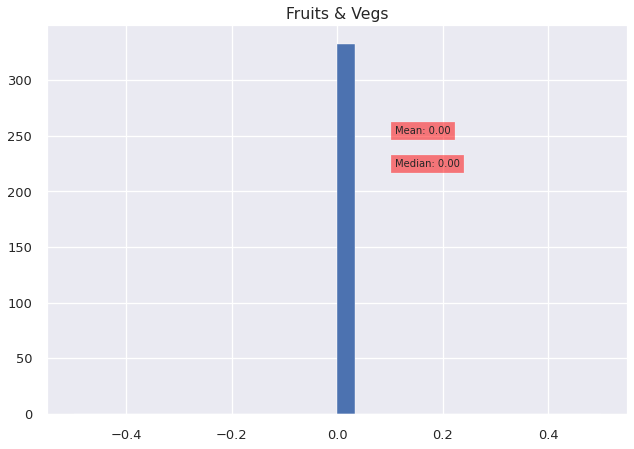

Cluster 9


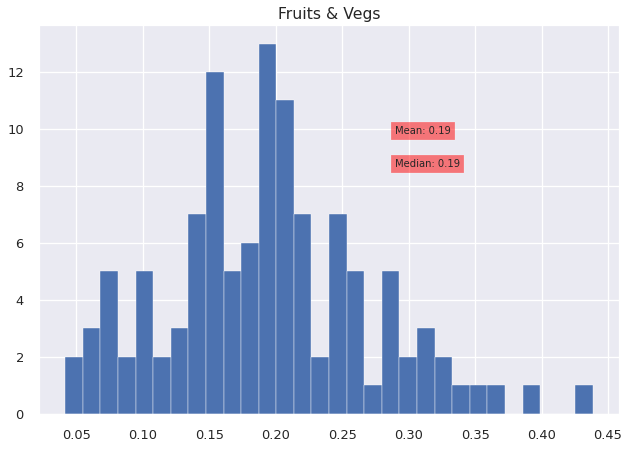

Cluster 10


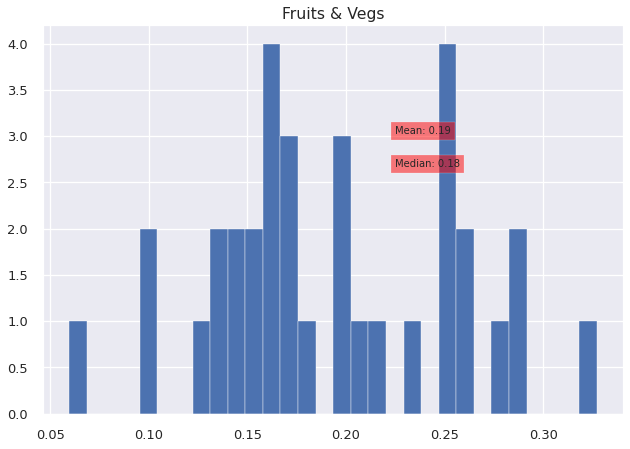

Cluster 11


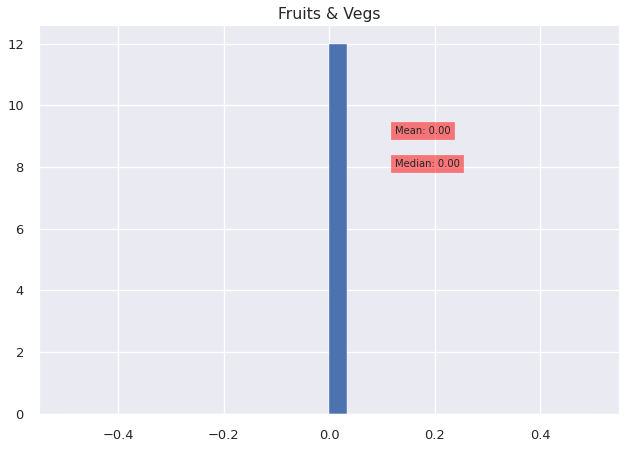

Cluster 12


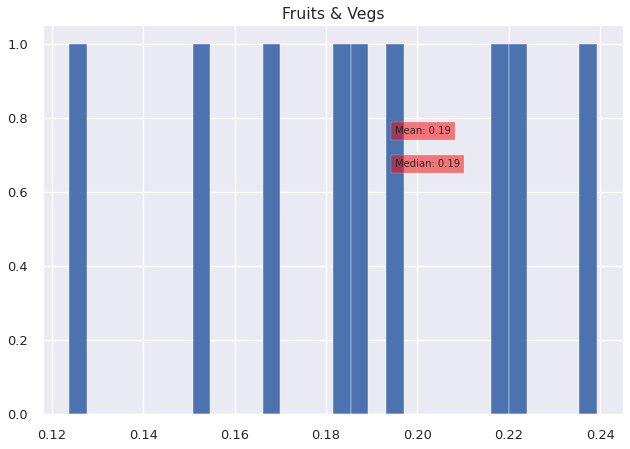

Cluster 13


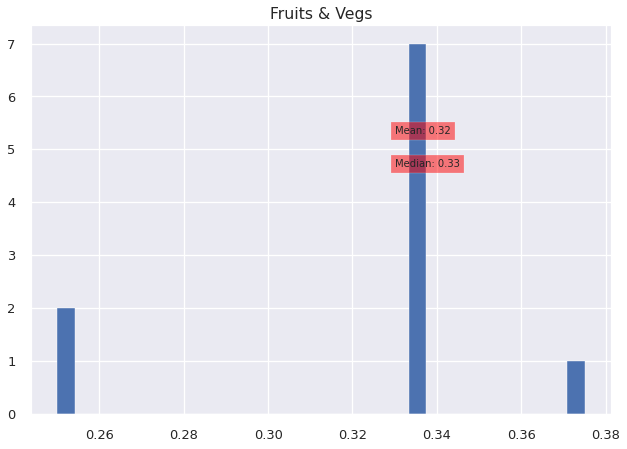

Cluster 14


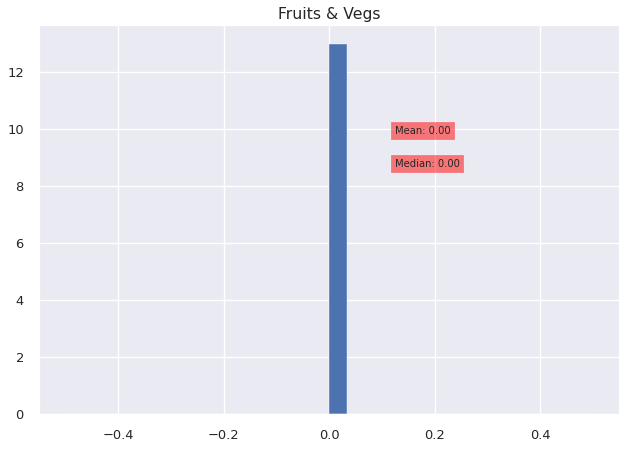

Cluster 15


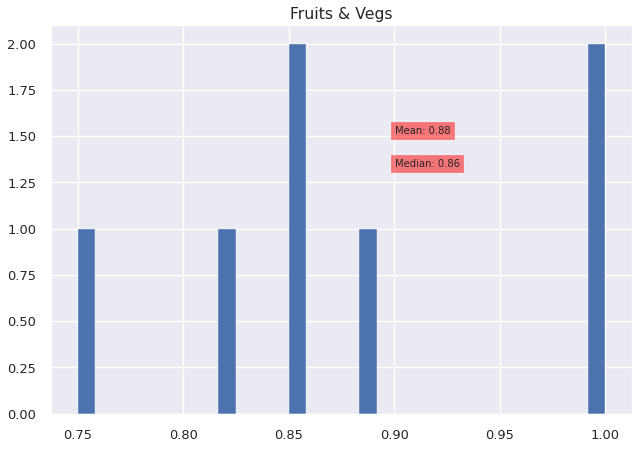

---------------------------------------------------------
count    35321.000000
mean         0.188082
std          0.164036
min          0.000000
25%          0.062500
50%          0.166667
75%          0.272727
max          1.000000
Name: Packed Vegs & Fruits, dtype: float64
Cluster -1


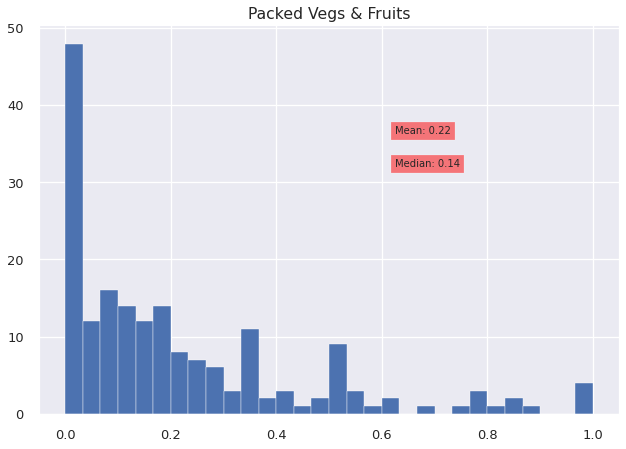

Cluster 0


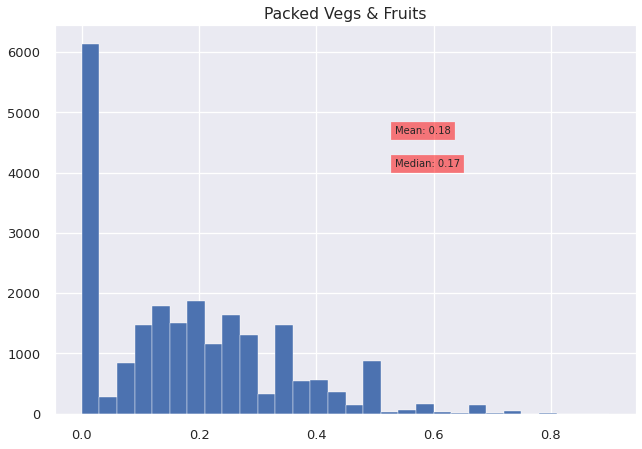

Cluster 1


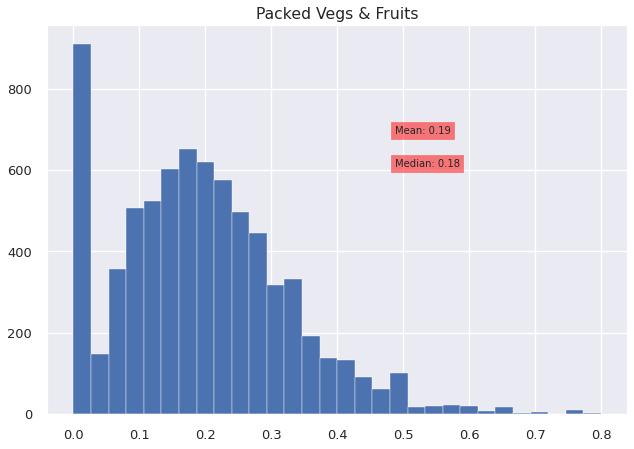

Cluster 2


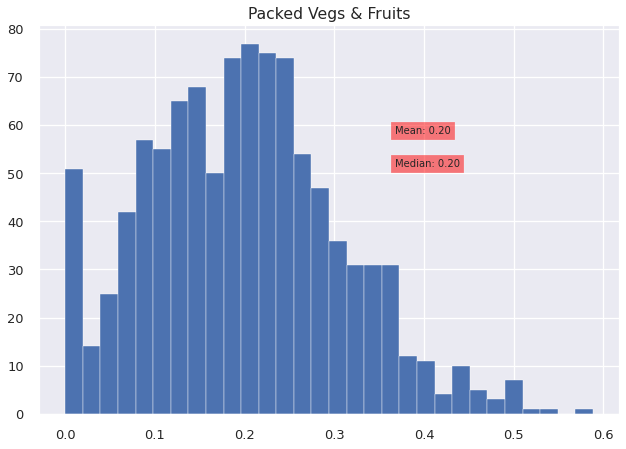

Cluster 3


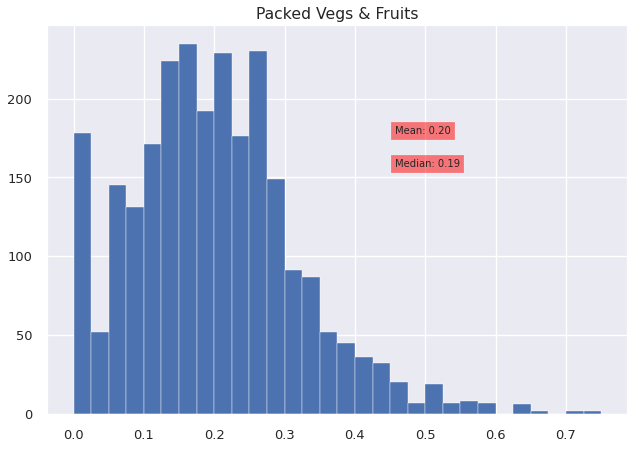

Cluster 4


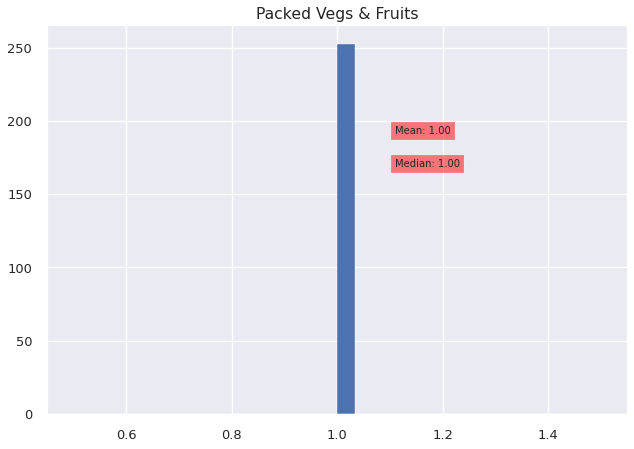

Cluster 5


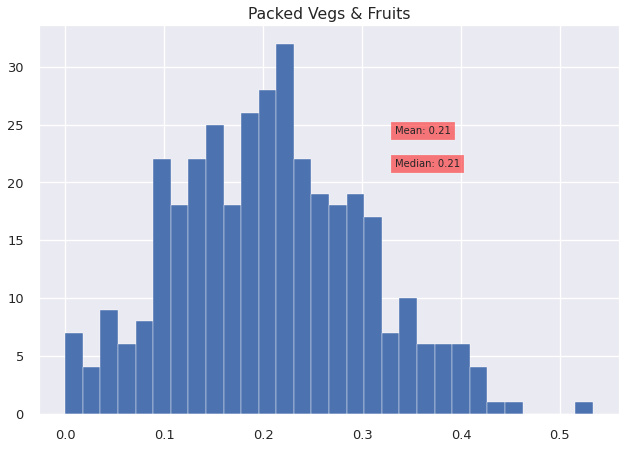

Cluster 6


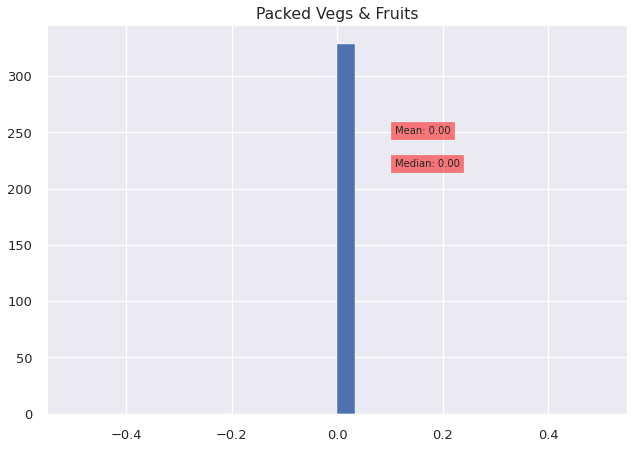

Cluster 7


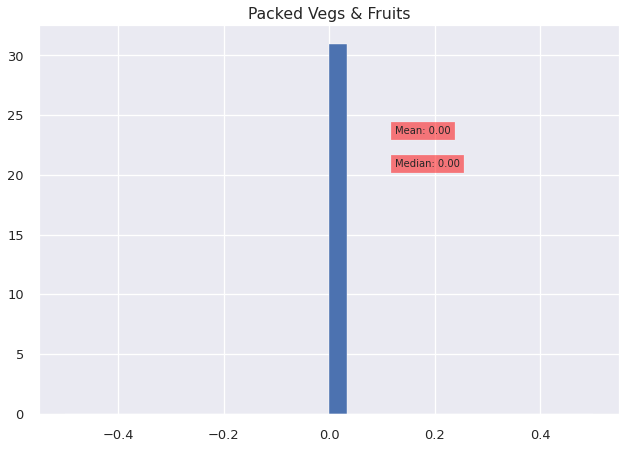

Cluster 8


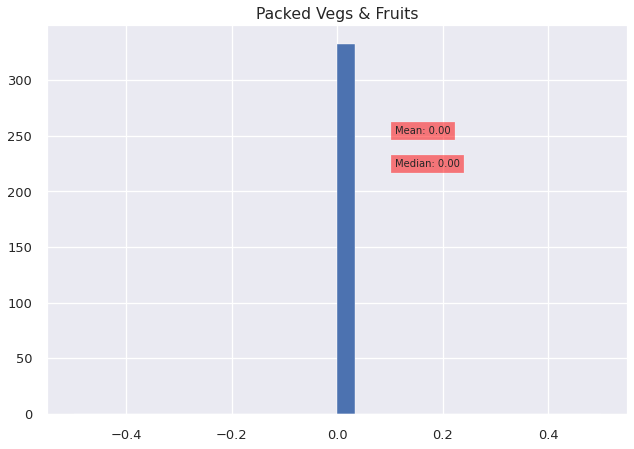

Cluster 9


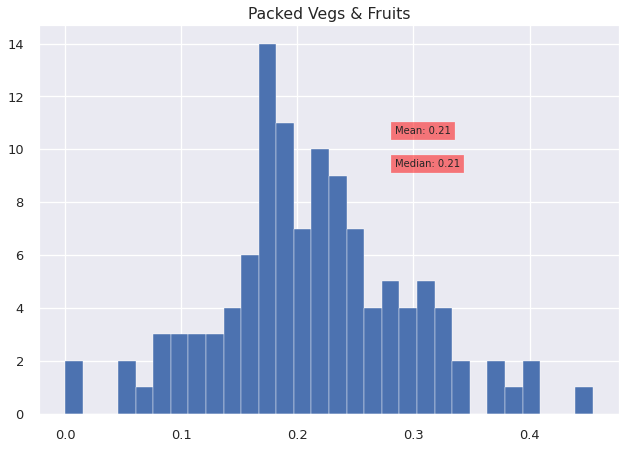

Cluster 10


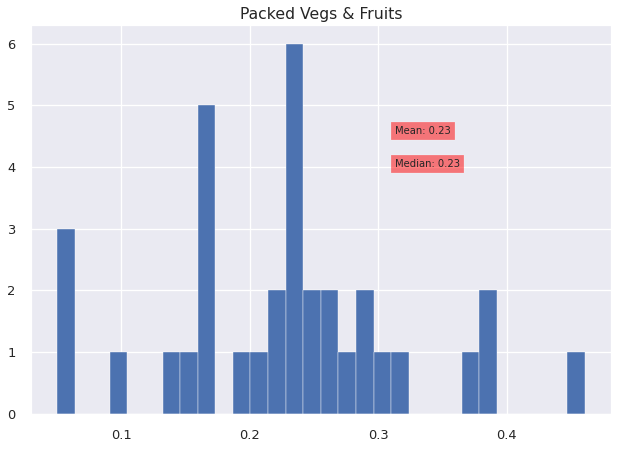

Cluster 11


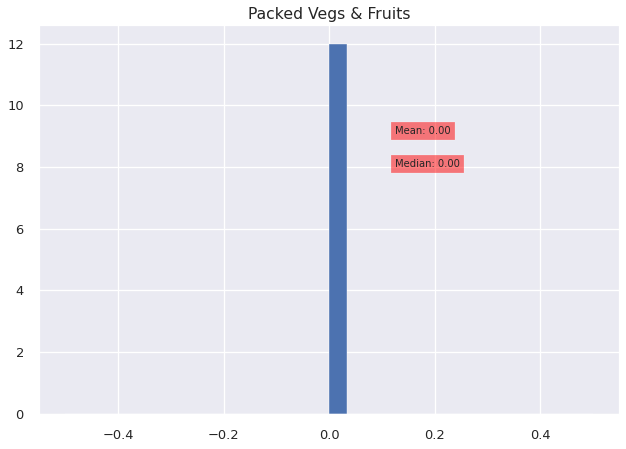

Cluster 12


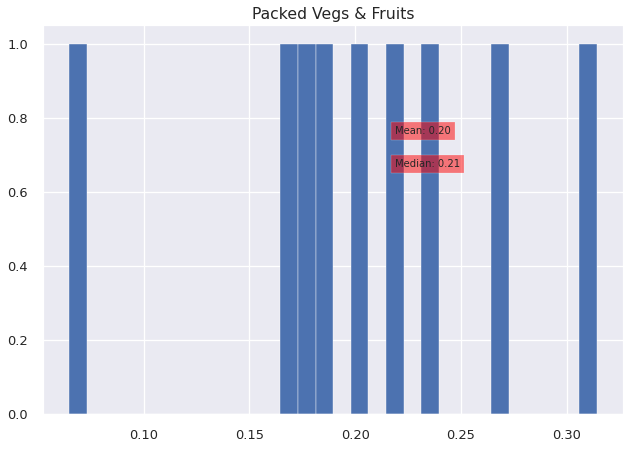

Cluster 13


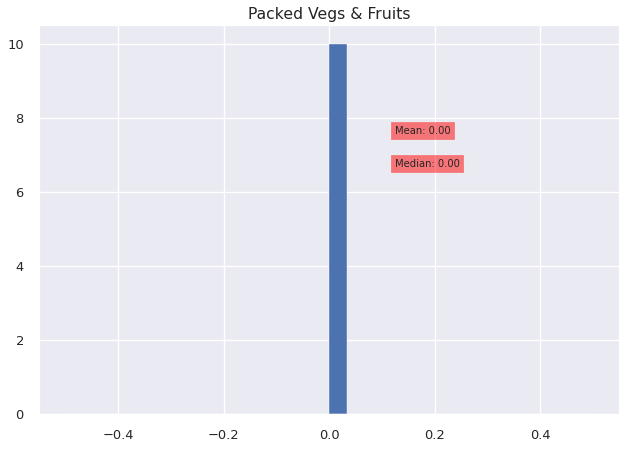

Cluster 14


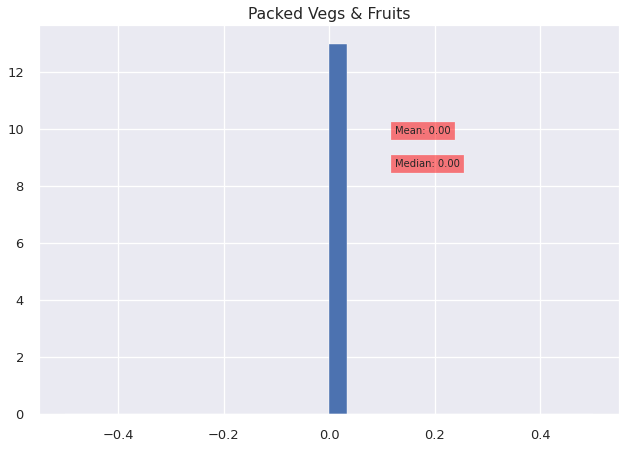

Cluster 15


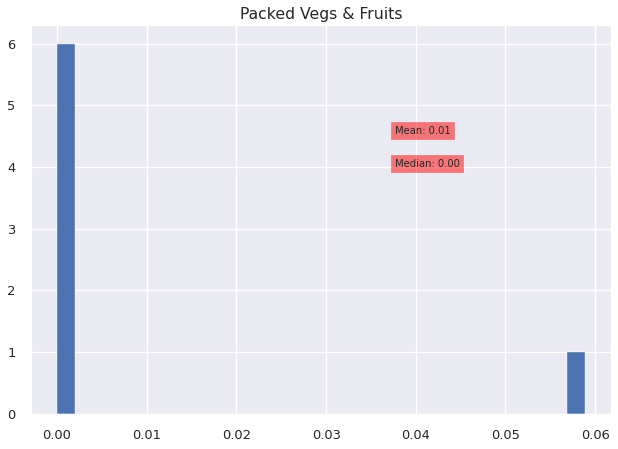

---------------------------------------------------------
count    35321.000000
mean         0.162729
std          0.163239
min          0.000000
25%          0.027027
50%          0.137931
75%          0.230769
max          1.000000
Name: Pretzels Lovers, dtype: float64
Cluster -1


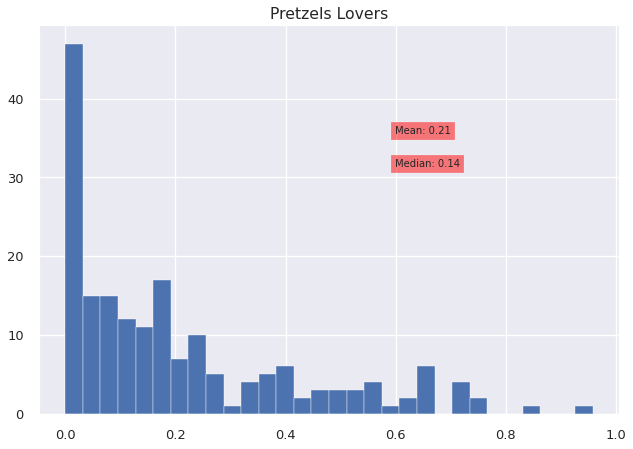

Cluster 0


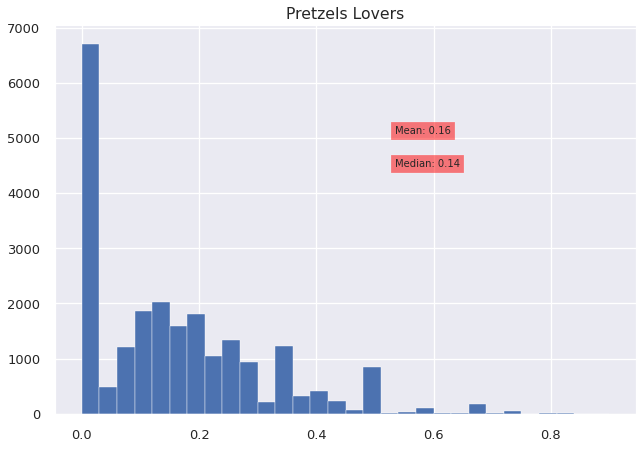

Cluster 1


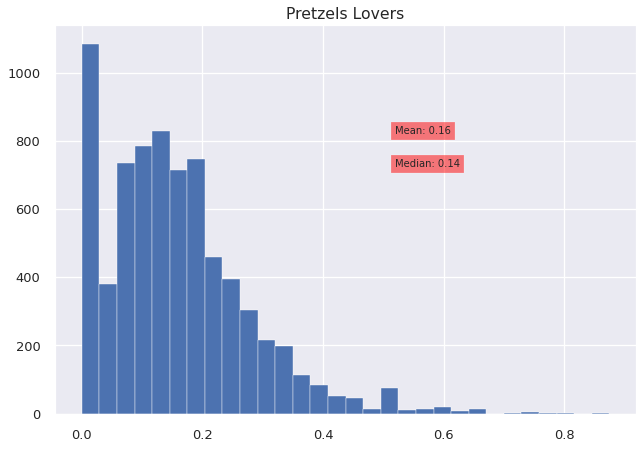

Cluster 2


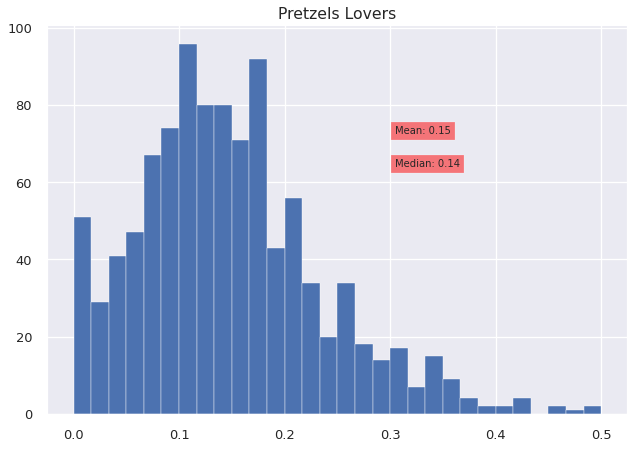

Cluster 3


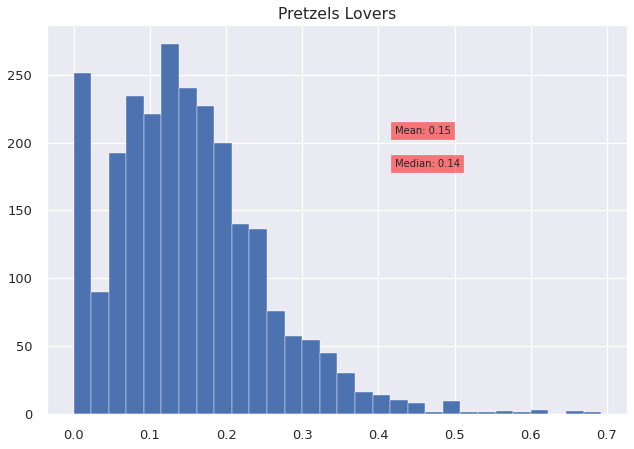

Cluster 4


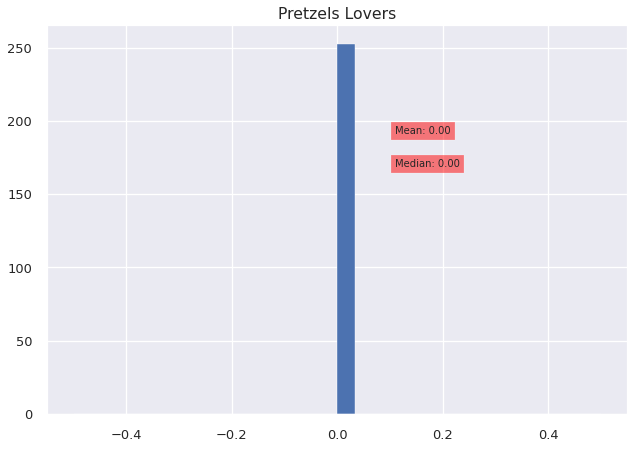

Cluster 5


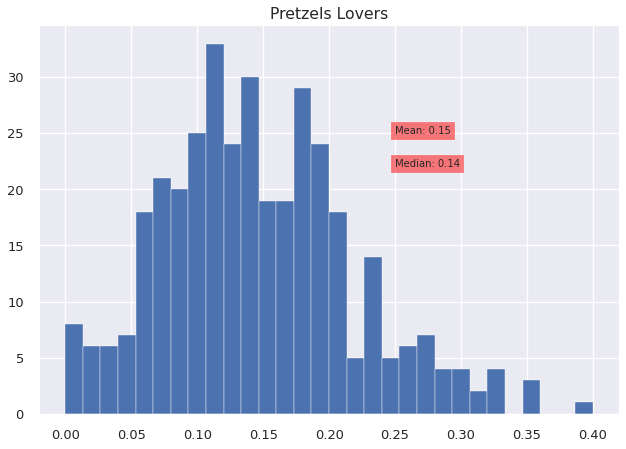

Cluster 6


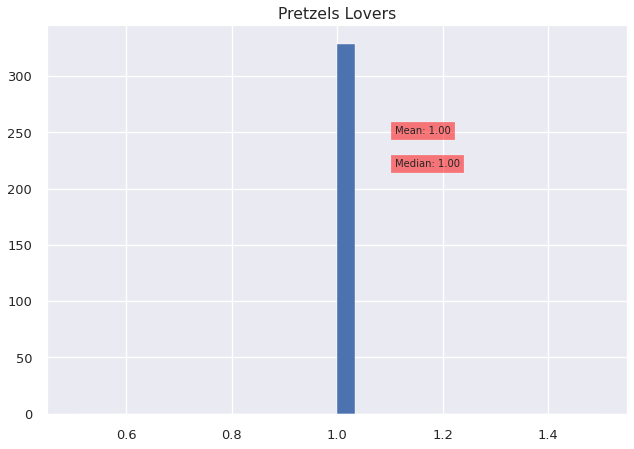

Cluster 7


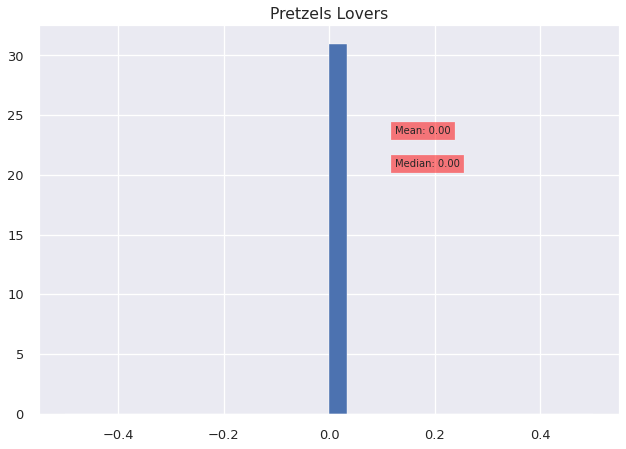

Cluster 8


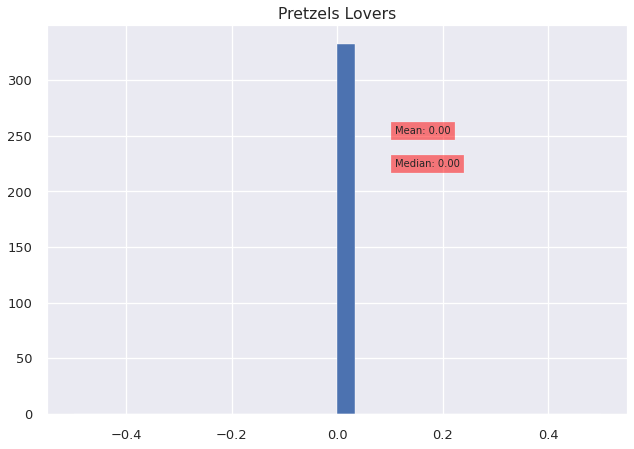

Cluster 9


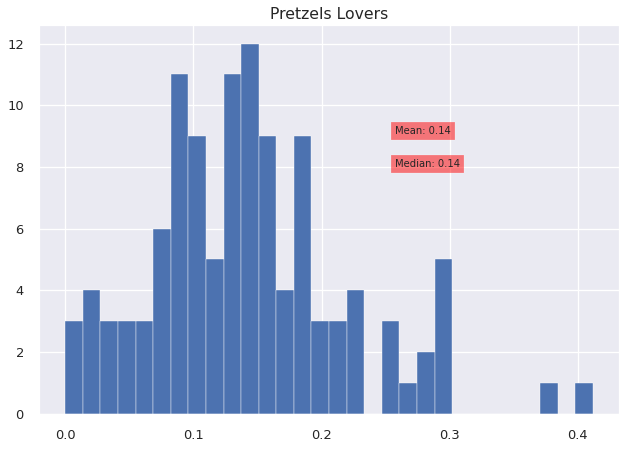

Cluster 10


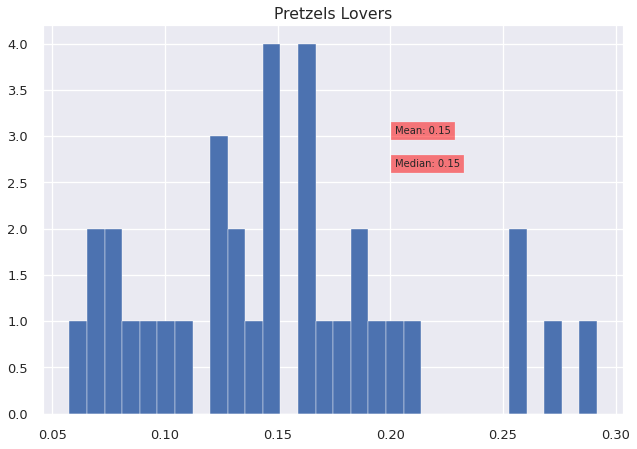

Cluster 11


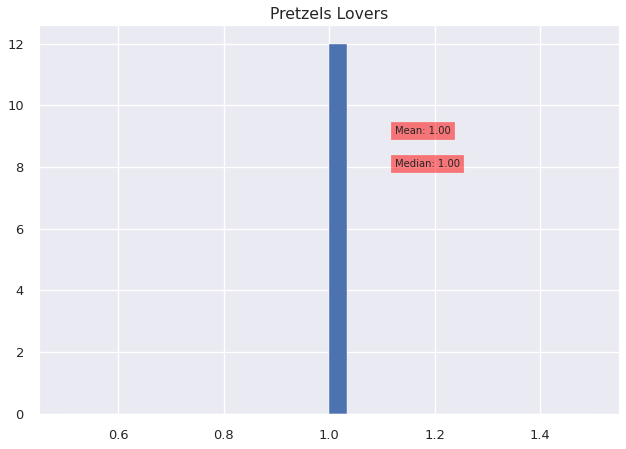

Cluster 12


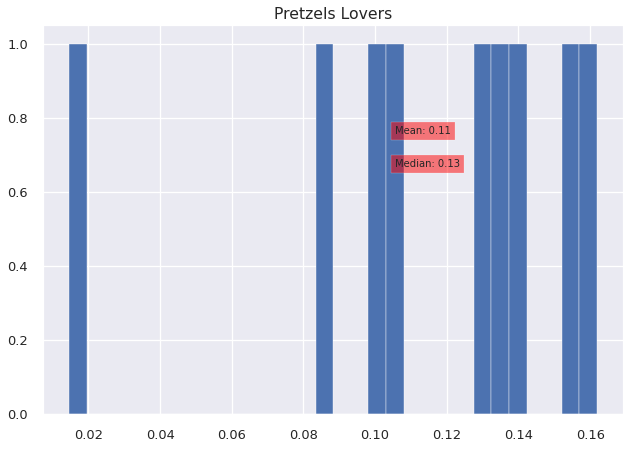

Cluster 13


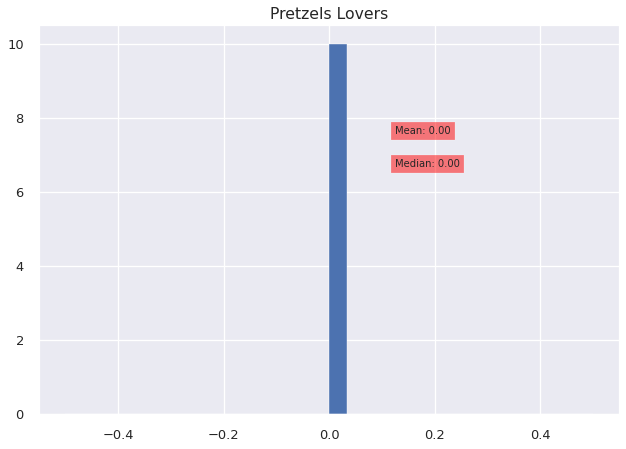

Cluster 14


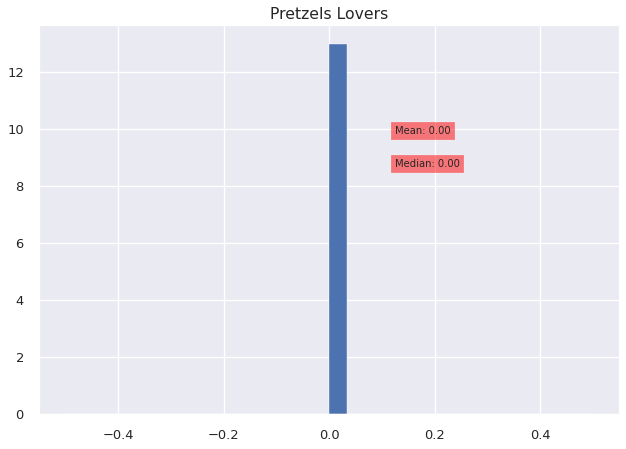

Cluster 15


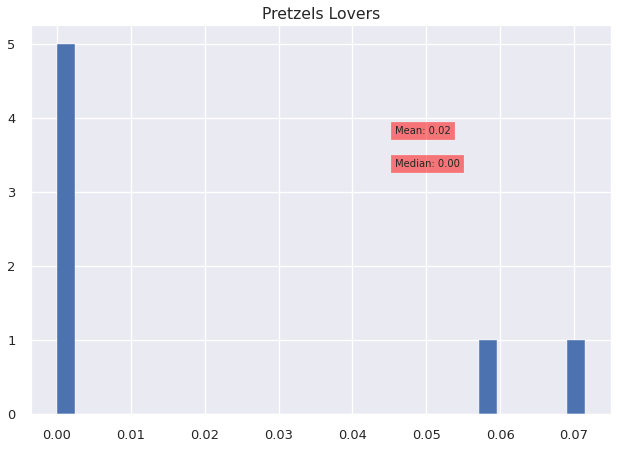

---------------------------------------------------------
count    35321.000000
mean         0.180268
std          0.159221
min          0.000000
25%          0.071429
50%          0.166667
75%          0.250000
max          1.000000
Name: Bread Lover, dtype: float64
Cluster -1


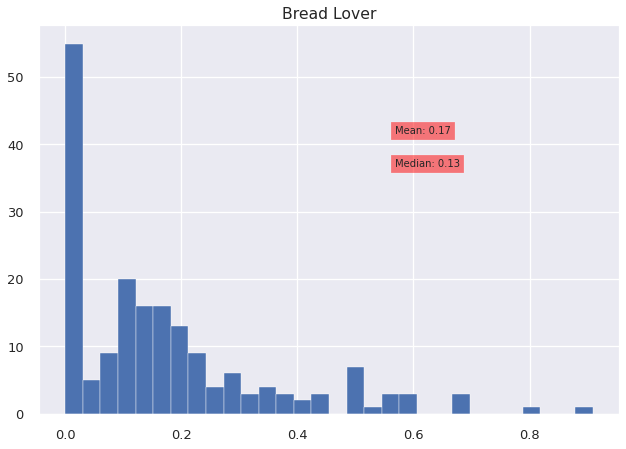

Cluster 0


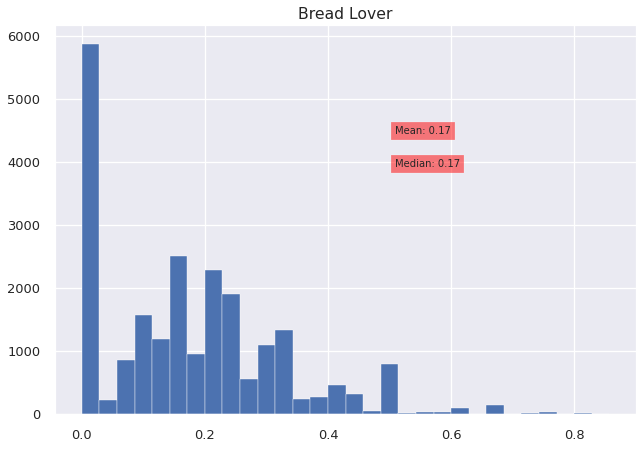

Cluster 1


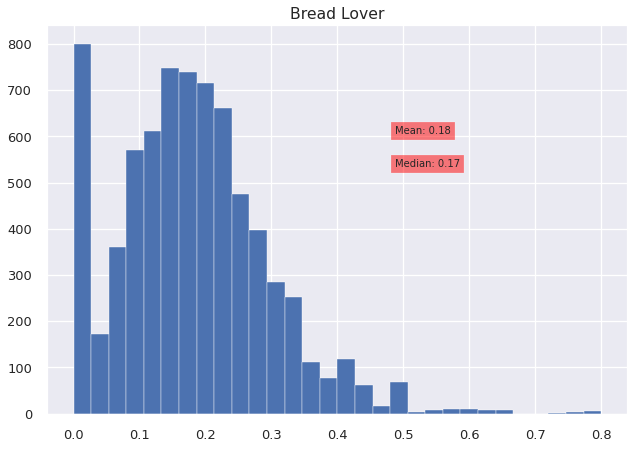

Cluster 2


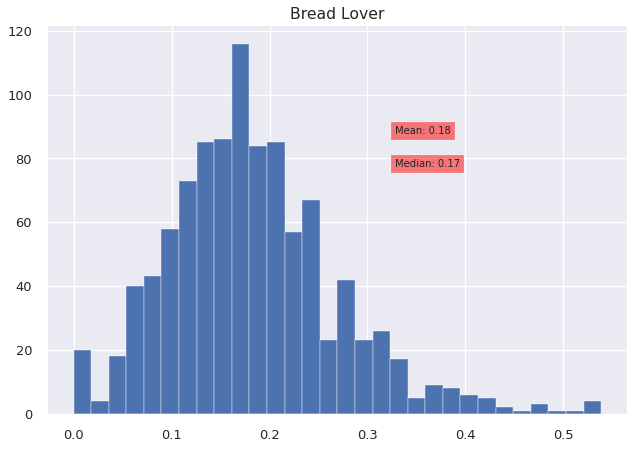

Cluster 3


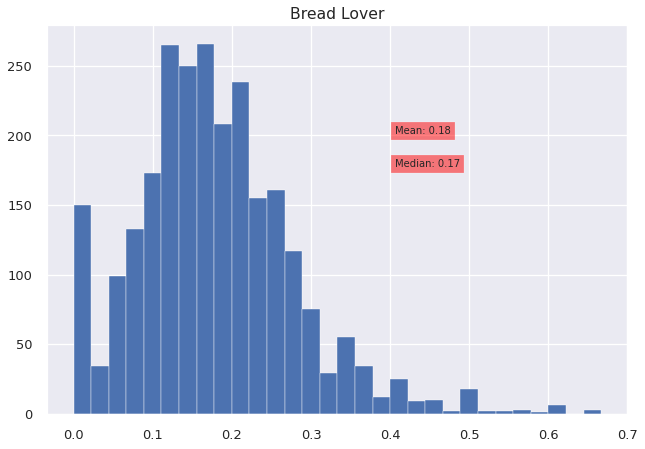

Cluster 4


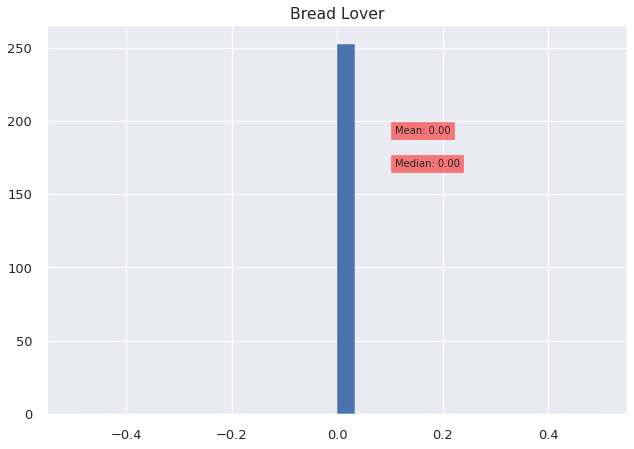

Cluster 5


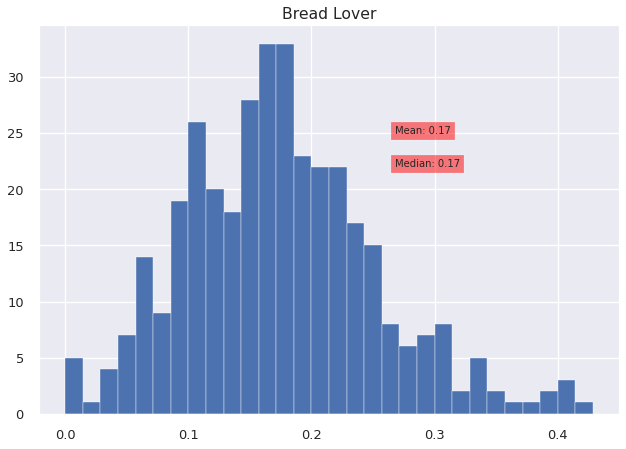

Cluster 6


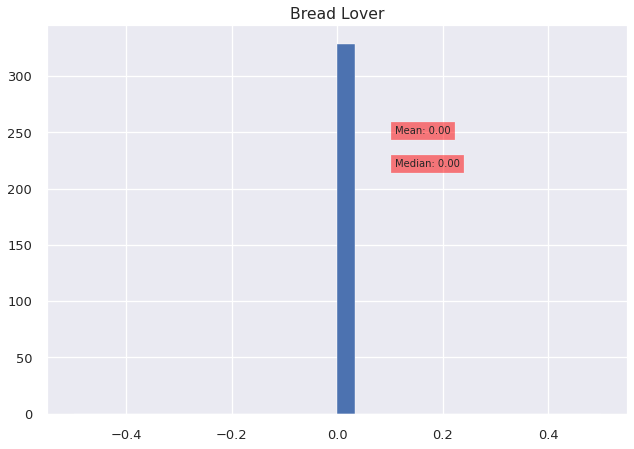

Cluster 7


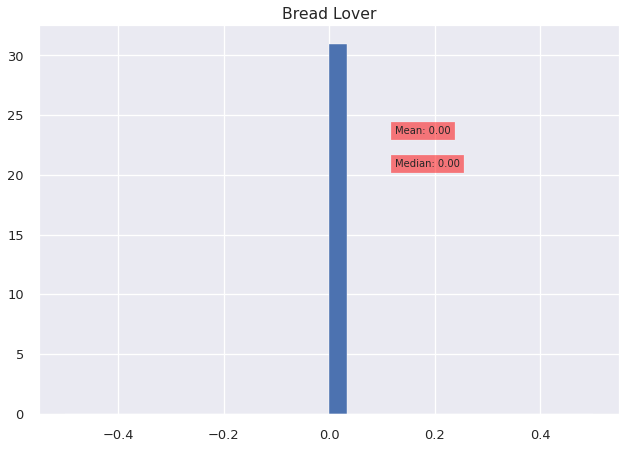

Cluster 8


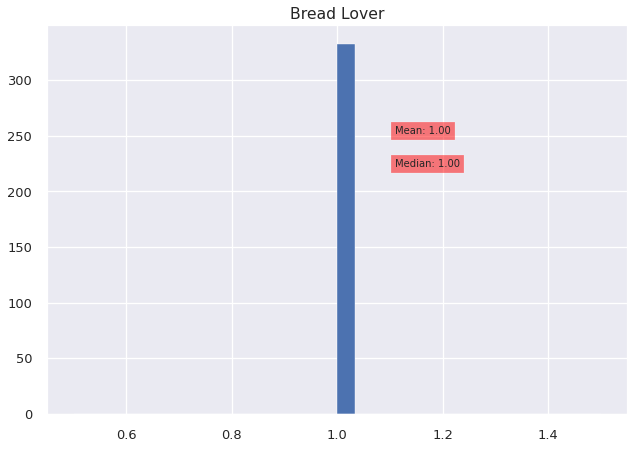

Cluster 9


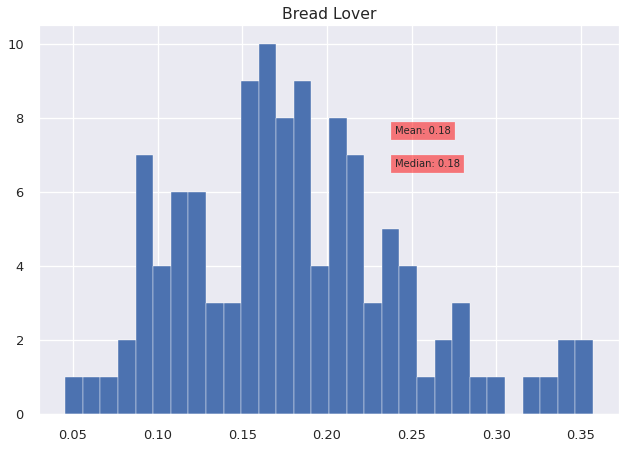

Cluster 10


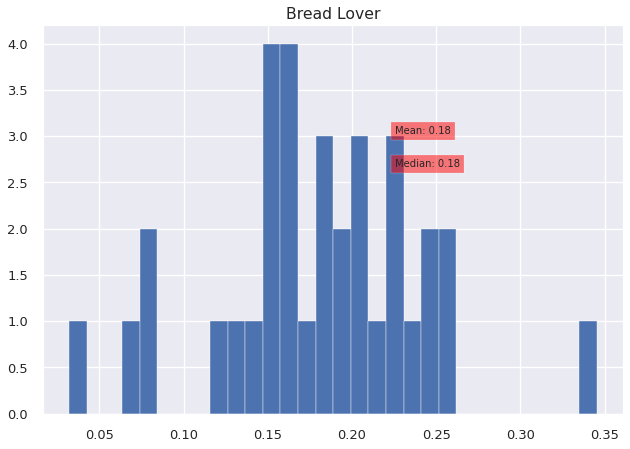

Cluster 11


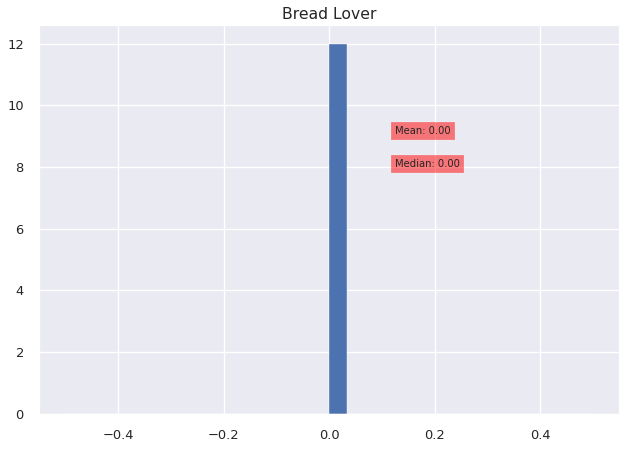

Cluster 12


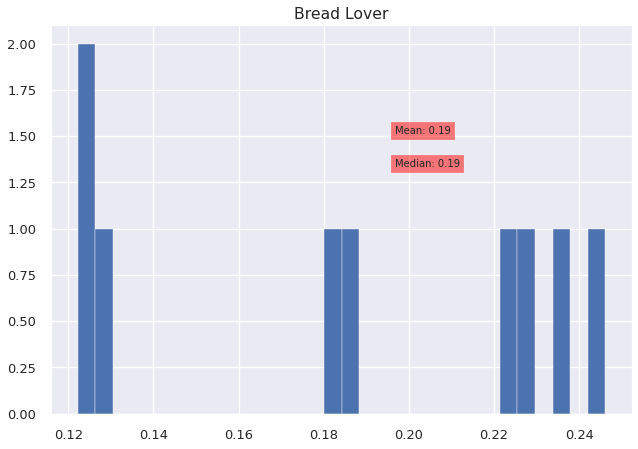

Cluster 13


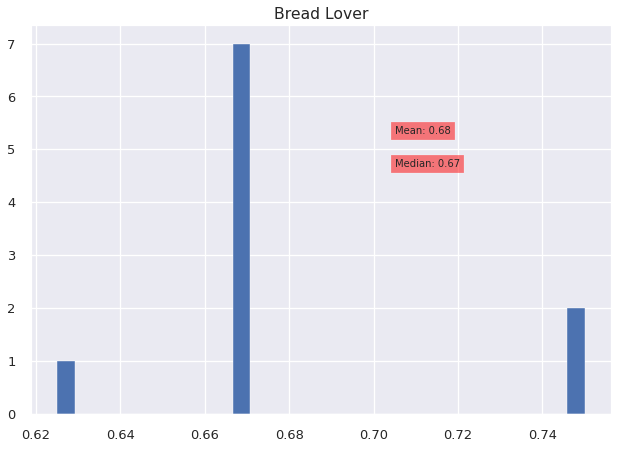

Cluster 14


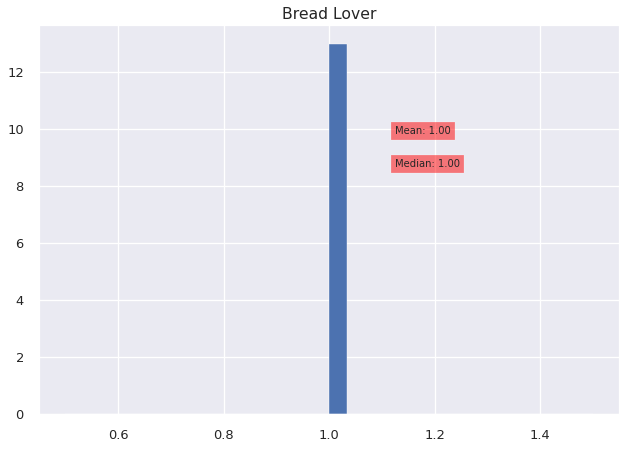

Cluster 15


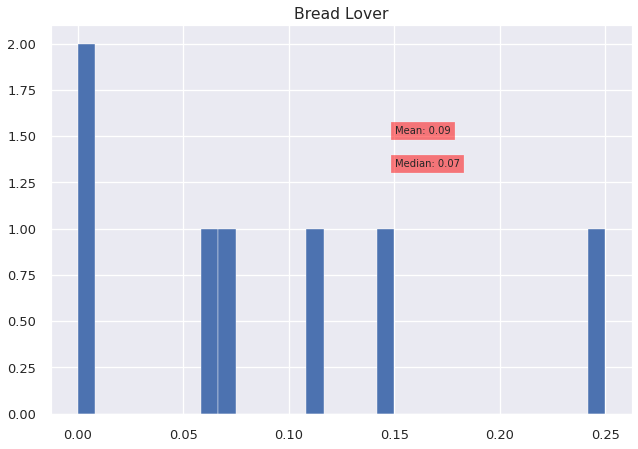

---------------------------------------------------------


In [ ]:
hist_dbscan_clusters(1.0, 5)

In [ ]:
df_dbscan_clusters(1.0, 5)

A/Number_Of_Customers B/Count_Orders  ... G/Pretzels Lovers H/Bread Lover
-1                    187       179.21 %  ...           26.77 %       -4.74 %
0                   22769       -34.24 %  ...           -2.23 %       -3.97 %
1                    7310        31.52 %  ...           -3.94 %       -0.30 %
2                    1012       163.03 %  ...          -10.09 %        1.52 %
3                    2535        97.27 %  ...           -8.03 %       -1.67 %
4                     253       -34.24 %  ...         -100.00 %     -100.00 %
5                     362       228.79 %  ...          -10.35 %       -3.41 %
6                     329       -34.24 %  ...          514.52 %     -100.00 %
7                      31        31.52 %  ...         -100.00 %     -100.00 %
8                     333       -34.24 %  ...         -100.00 %      454.73 %
9                     115       294.55 %  ...          -12.20 %        0.63 %
10                     34       360.30 %  ...           -7.12 %       -0.04 %
11                     12        31.52 %  ...          514.52 %     -100.00 %
12                      9       426.06 %  ...          -29.65 %        3.36 %
13                     10        31.52 %  ...         -100.00 %      276.75 %
14                     13        31.52 %  ...         -100.00 %      454.73 %
15                      7        97.27 %  ...          -88.57 %      -49.74 %

[17 rows x 8 columns]

count    35321.000000
mean         1.520738
std          0.926963
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: Count_Orders, dtype: float64
Cluster -1


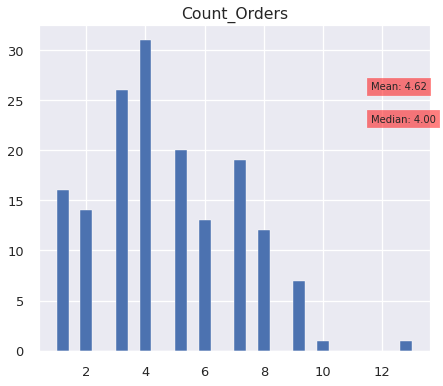

Cluster 0


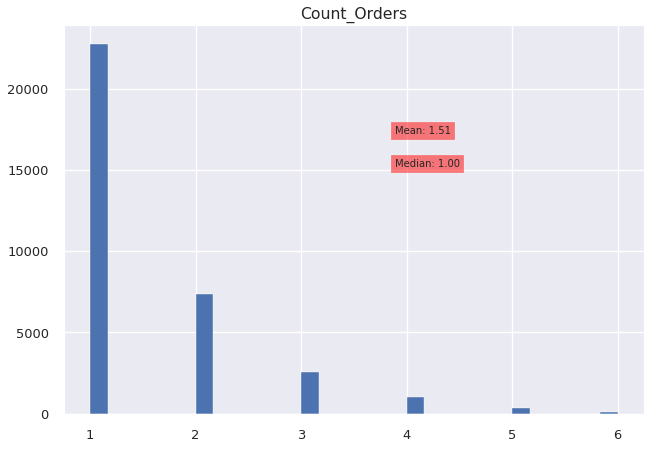

Cluster 1


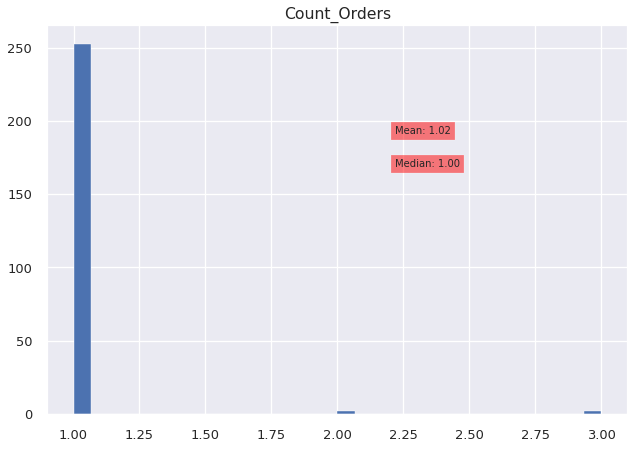

Cluster 2


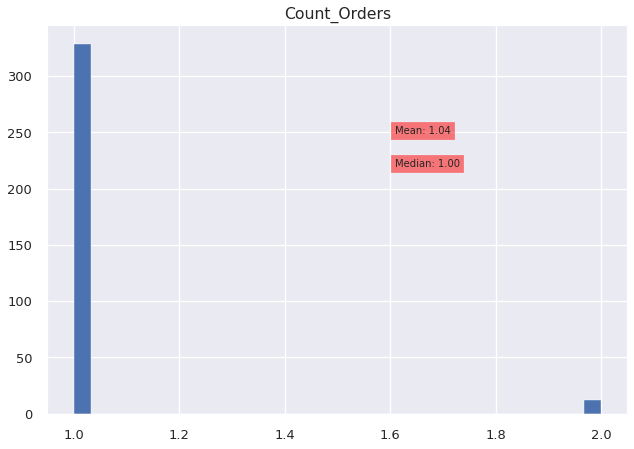

Cluster 3


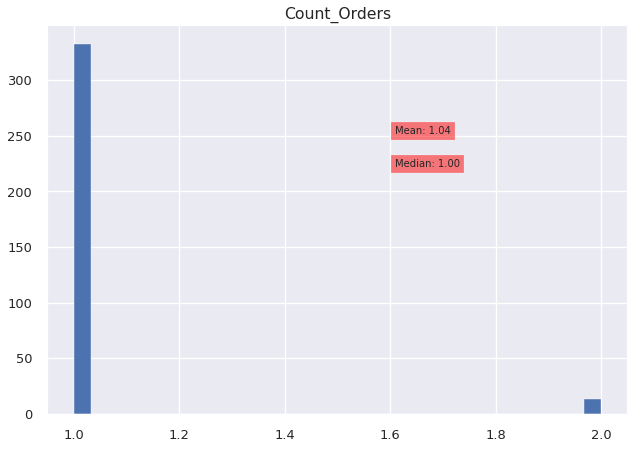

Cluster 4


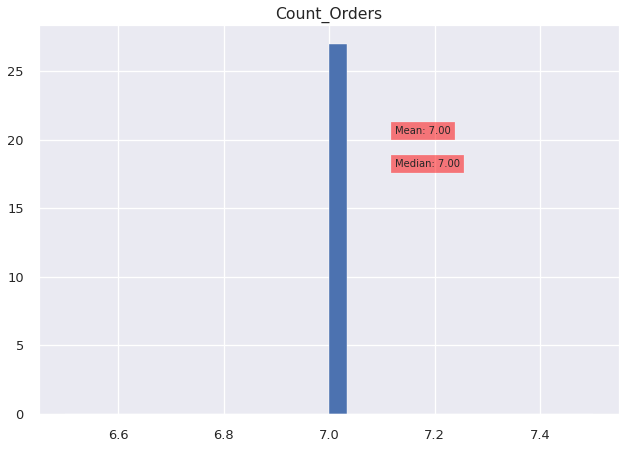

Cluster 5


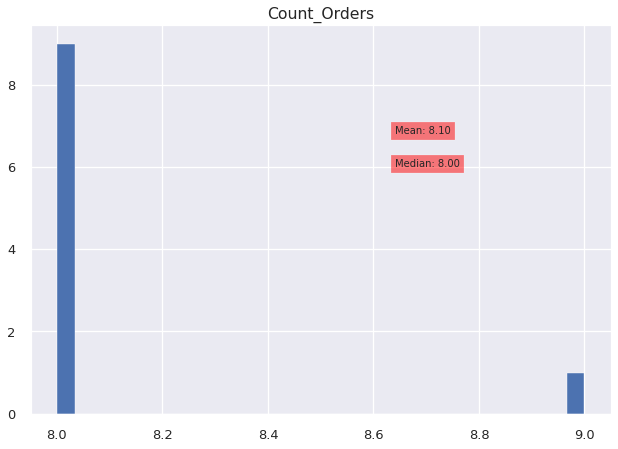

---------------------------------------------------------
count    35321.000000
mean        10.097244
std          7.258420
min          1.000000
25%          5.000000
50%          8.500000
75%         13.500000
max        127.000000
Name: Average_Products_Order, dtype: float64
Cluster -1


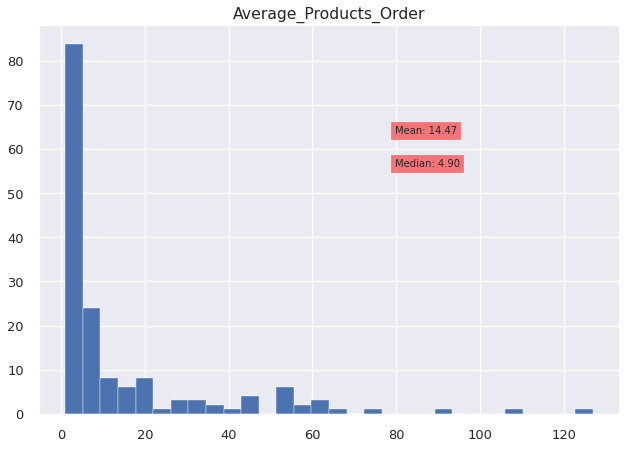

Cluster 0


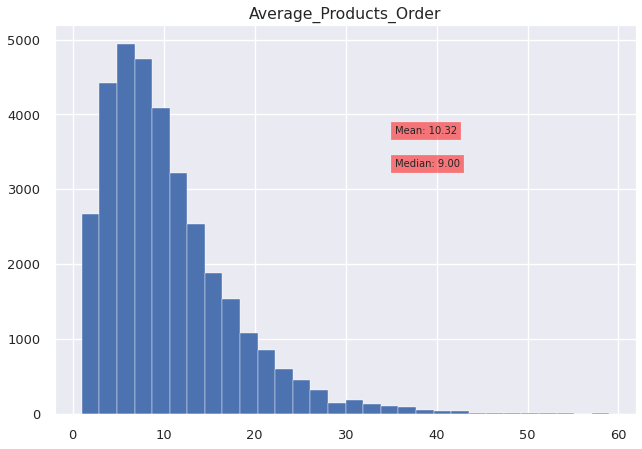

Cluster 1


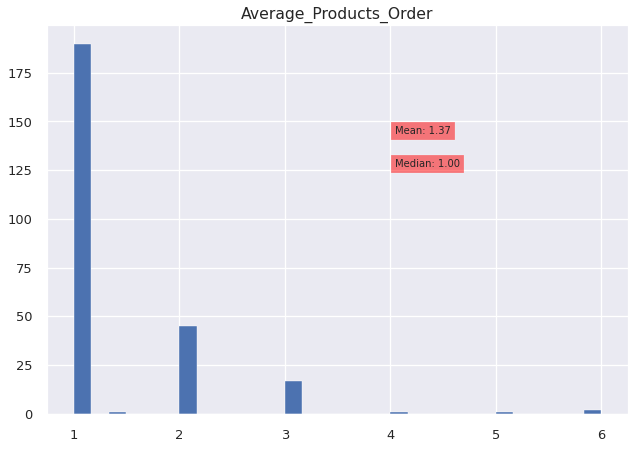

Cluster 2


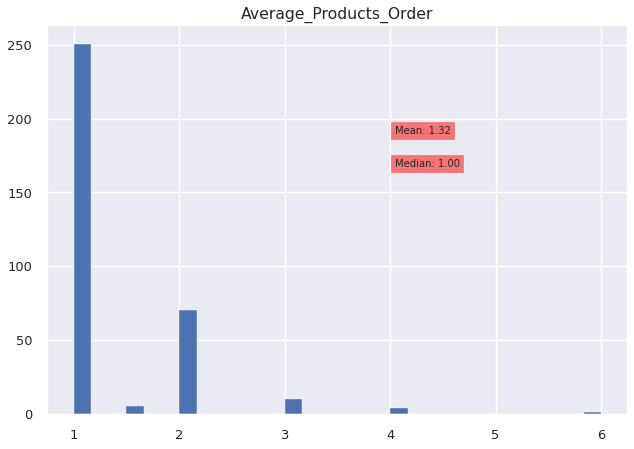

Cluster 3


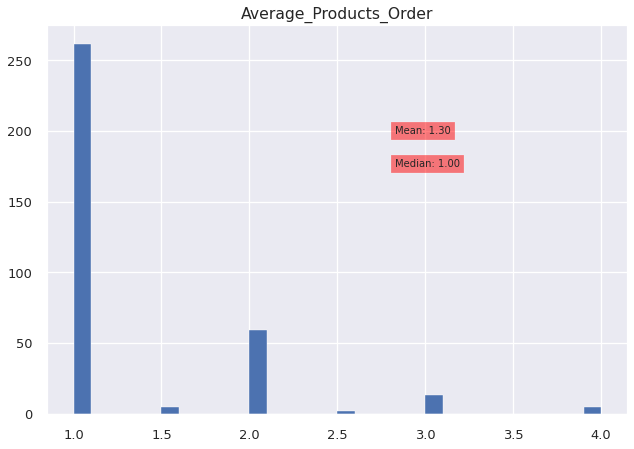

Cluster 4


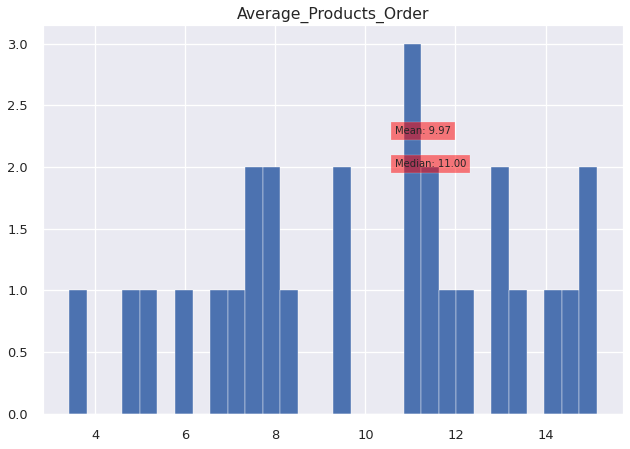

Cluster 5


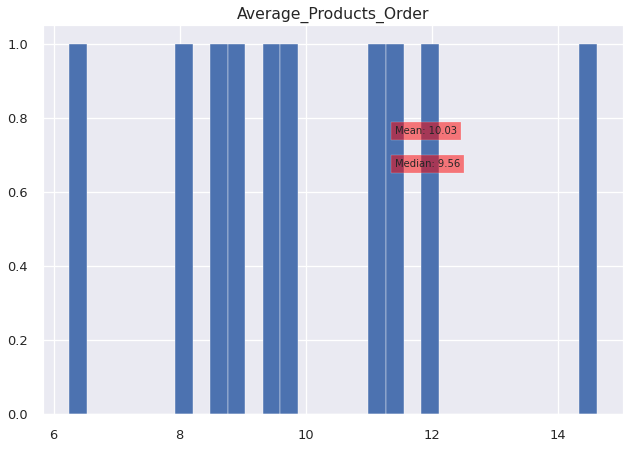

---------------------------------------------------------
count    35321.000000
mean         0.266036
std          0.185490
min          0.000000
25%          0.150000
50%          0.250000
75%          0.355556
max          1.000000
Name: Yogurt & Fruits, dtype: float64
Cluster -1


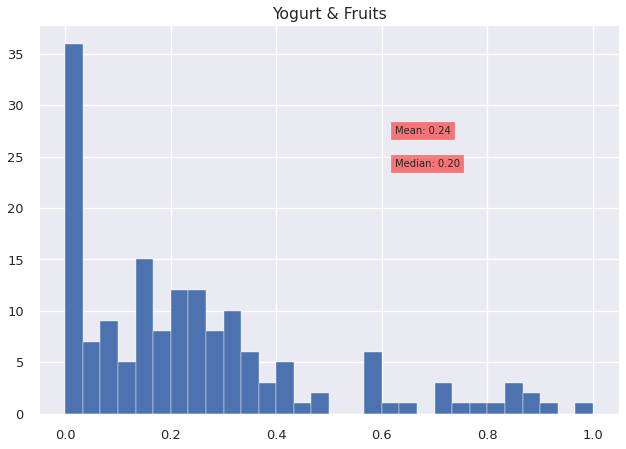

Cluster 0


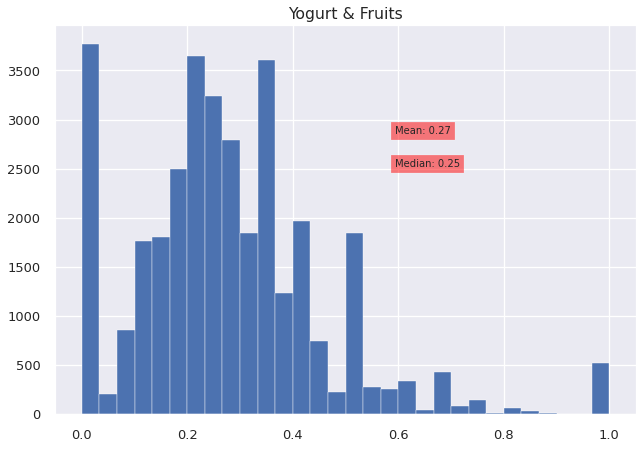

Cluster 1


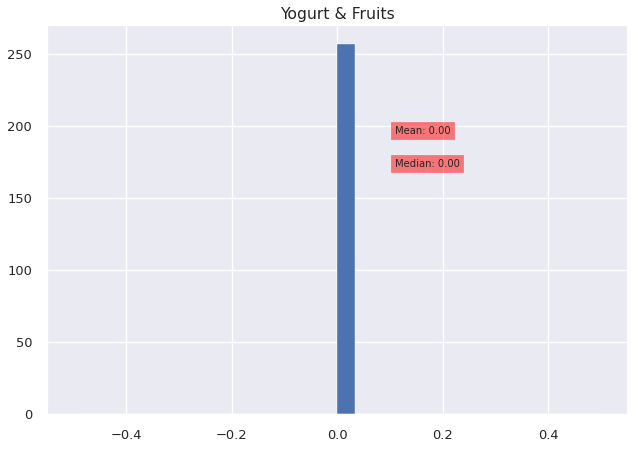

Cluster 2


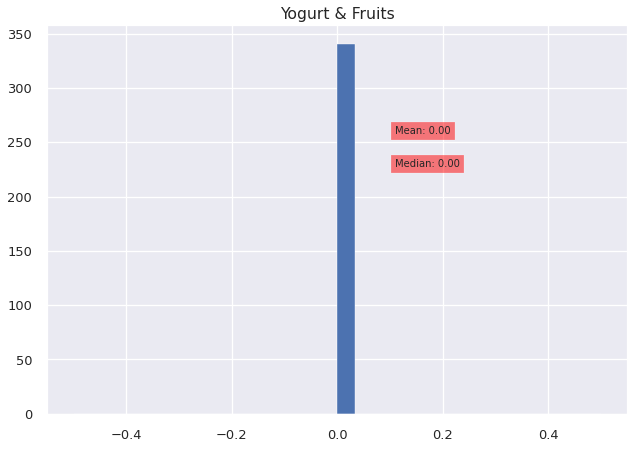

Cluster 3


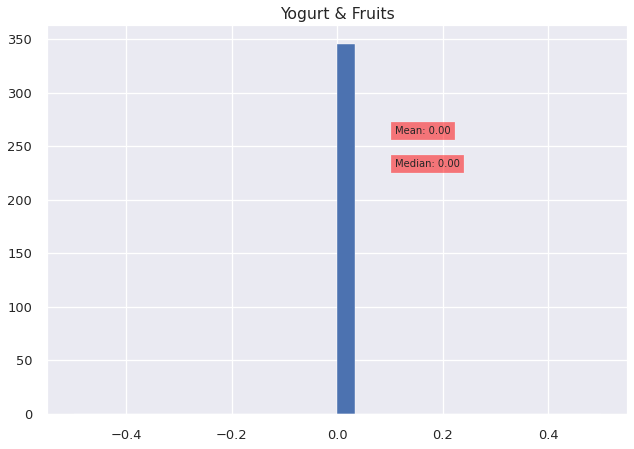

Cluster 4


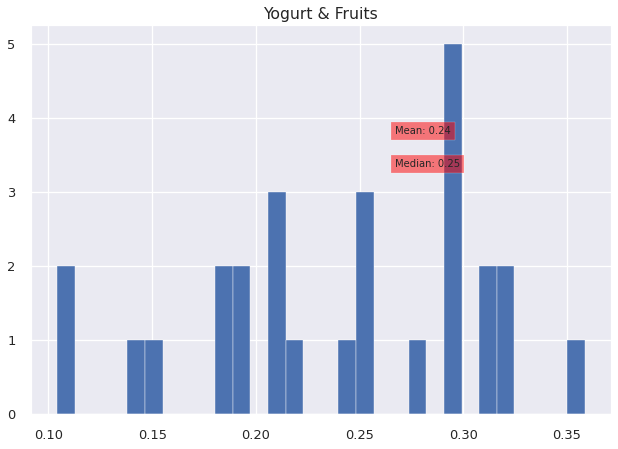

Cluster 5


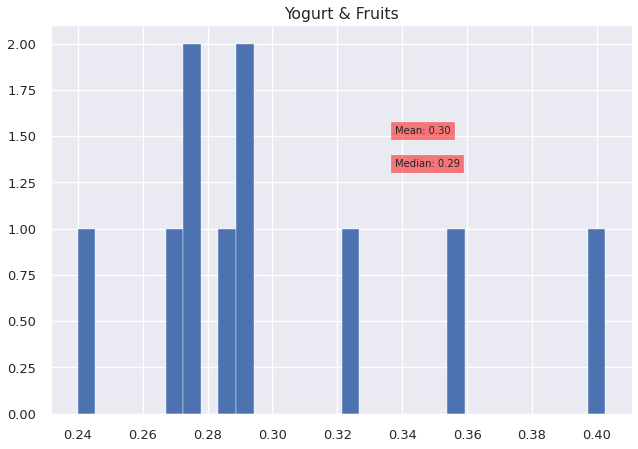

---------------------------------------------------------
count    35321.000000
mean         0.202886
std          0.170425
min          0.000000
25%          0.096774
50%          0.181818
75%          0.272727
max          1.000000
Name: Fruits & Vegs, dtype: float64
Cluster -1


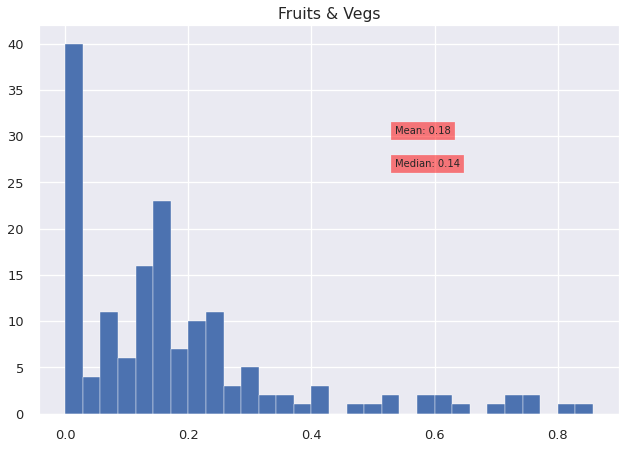

Cluster 0


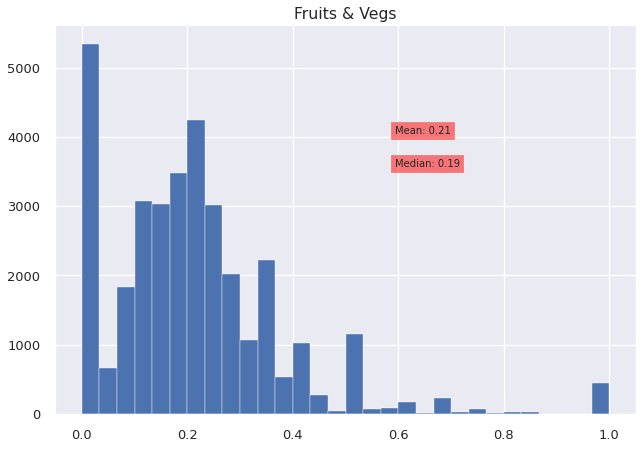

Cluster 1


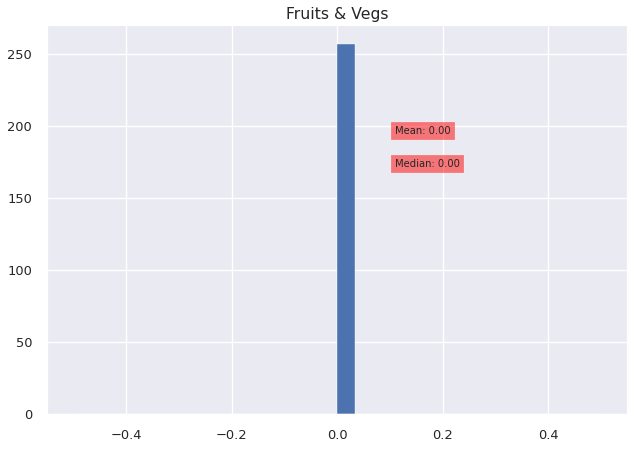

Cluster 2


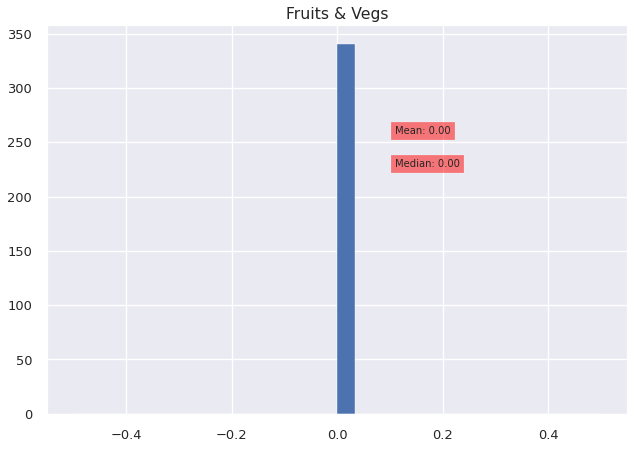

Cluster 3


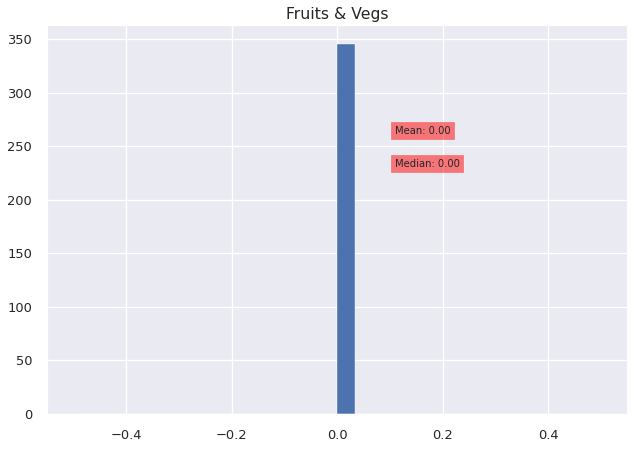

Cluster 4


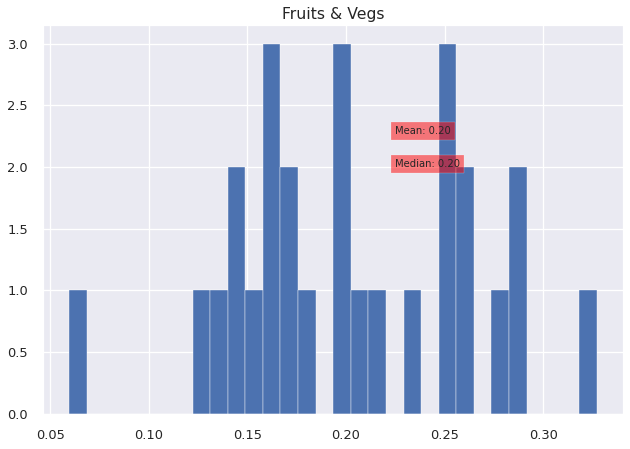

Cluster 5


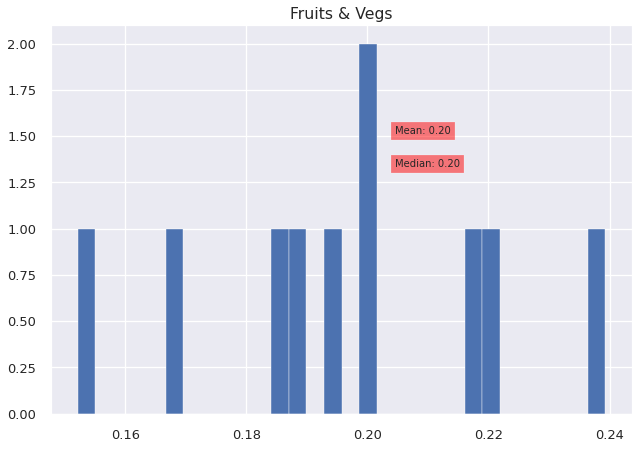

---------------------------------------------------------
count    35321.000000
mean         0.188082
std          0.164036
min          0.000000
25%          0.062500
50%          0.166667
75%          0.272727
max          1.000000
Name: Packed Vegs & Fruits, dtype: float64
Cluster -1


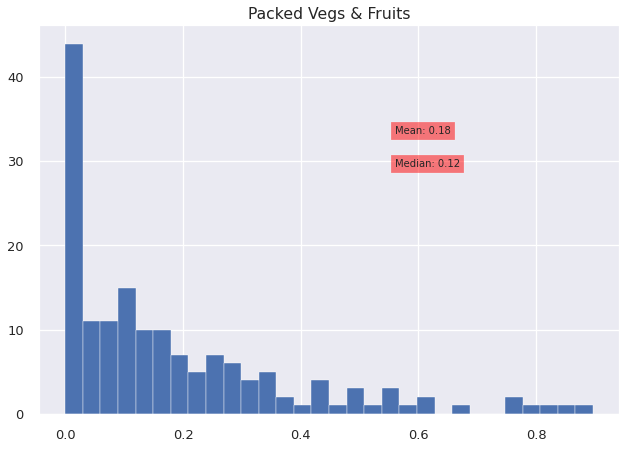

Cluster 0


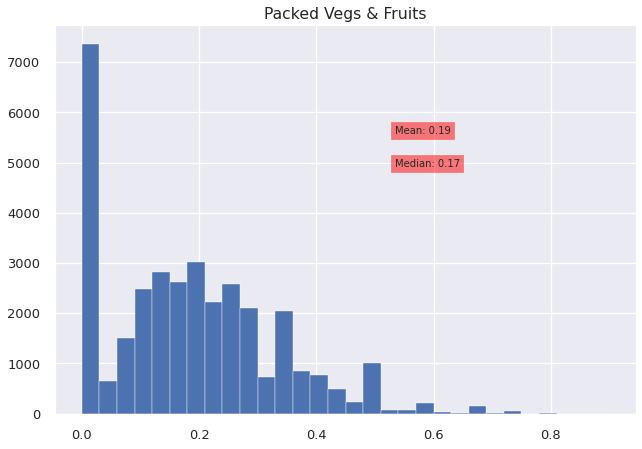

Cluster 1


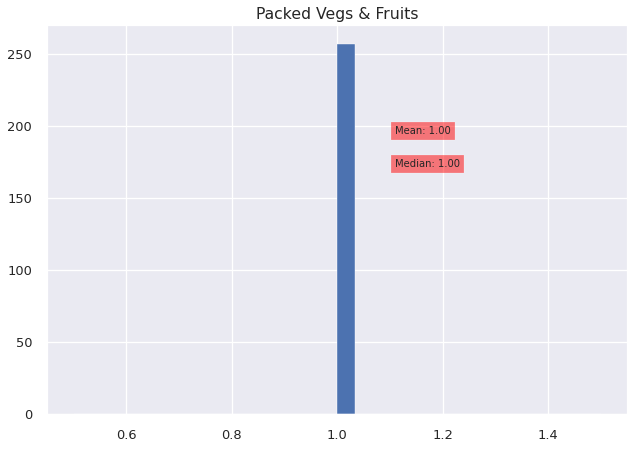

Cluster 2


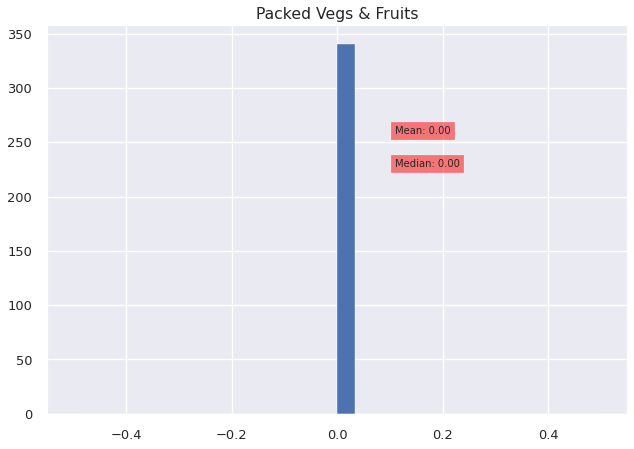

Cluster 3


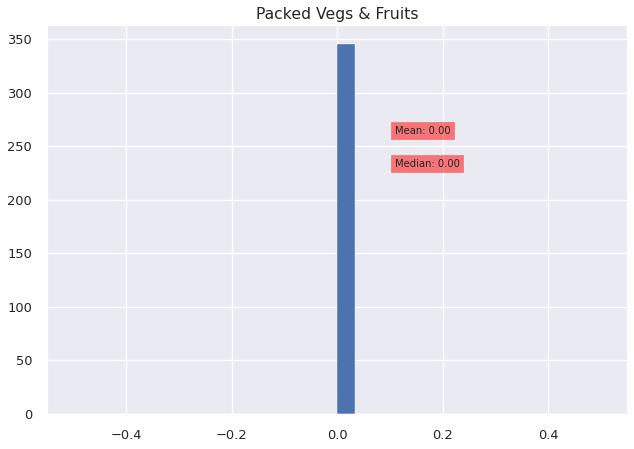

Cluster 4


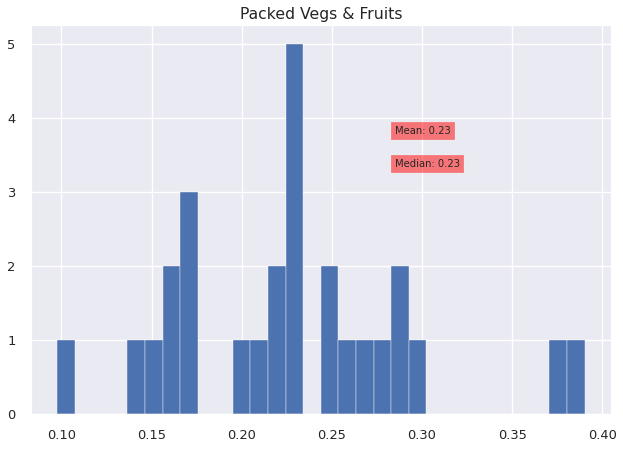

Cluster 5


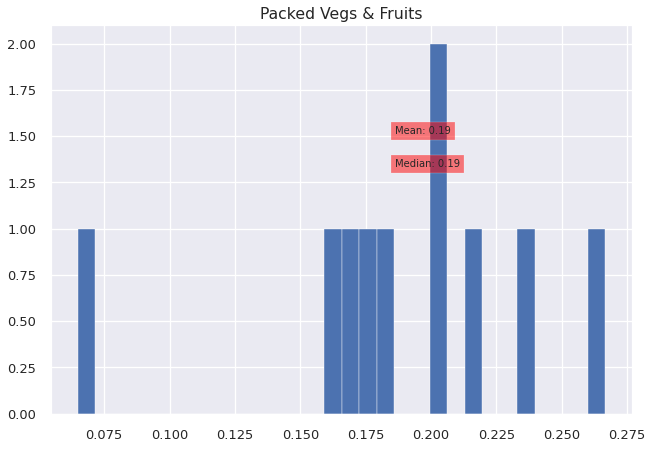

---------------------------------------------------------
count    35321.000000
mean         0.162729
std          0.163239
min          0.000000
25%          0.027027
50%          0.137931
75%          0.230769
max          1.000000
Name: Pretzels Lovers, dtype: float64
Cluster -1


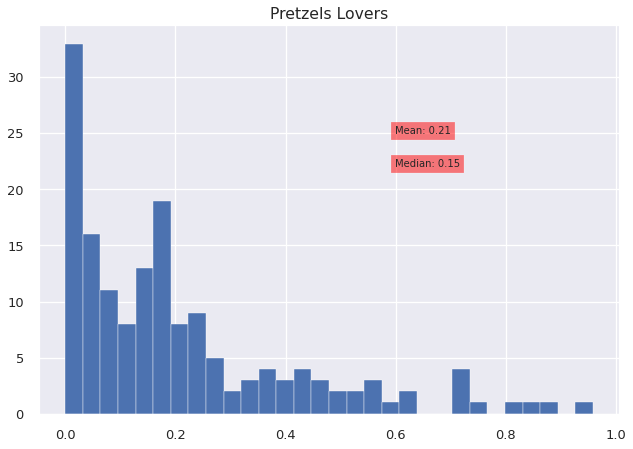

Cluster 0


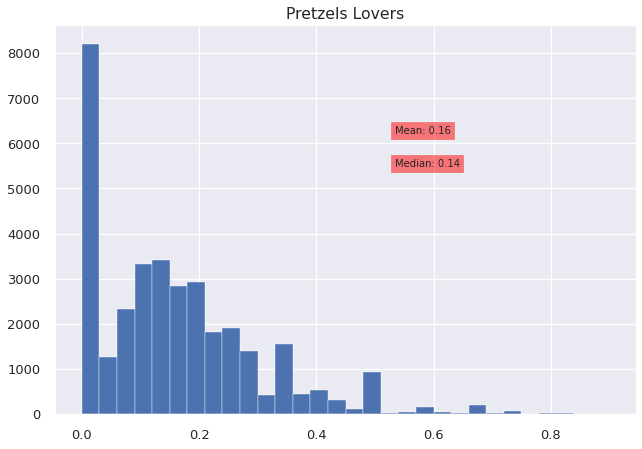

Cluster 1


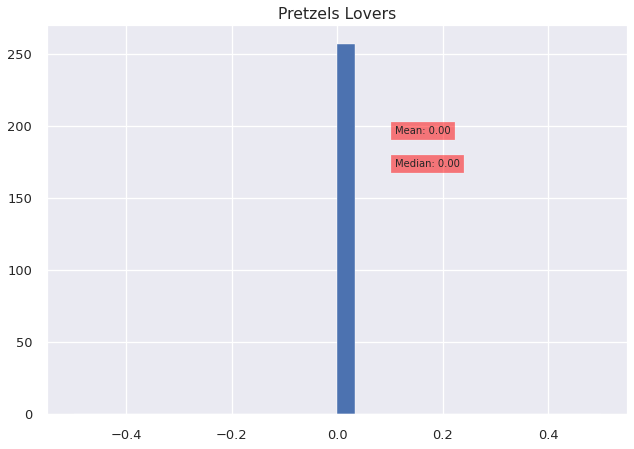

Cluster 2


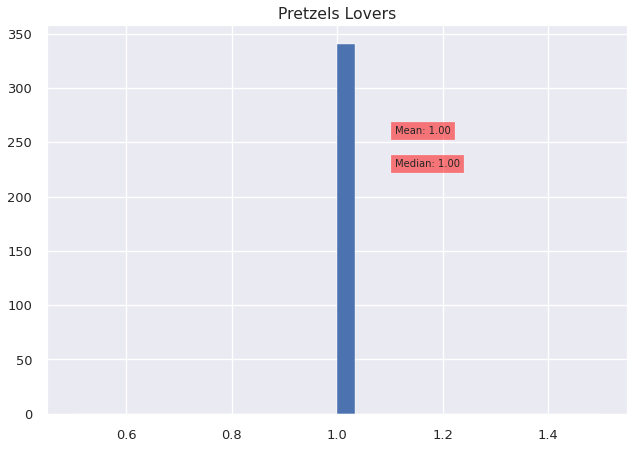

Cluster 3


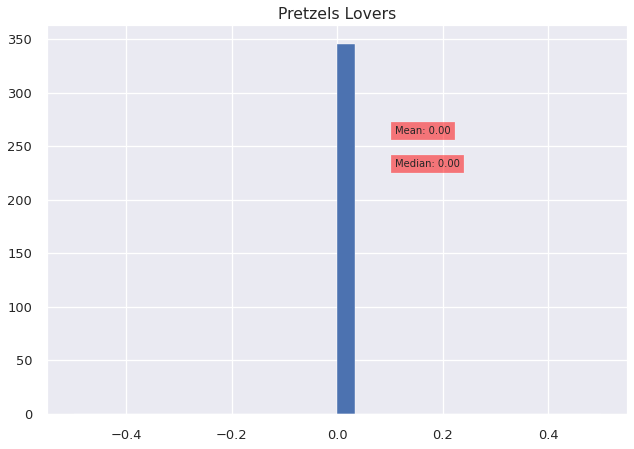

Cluster 4


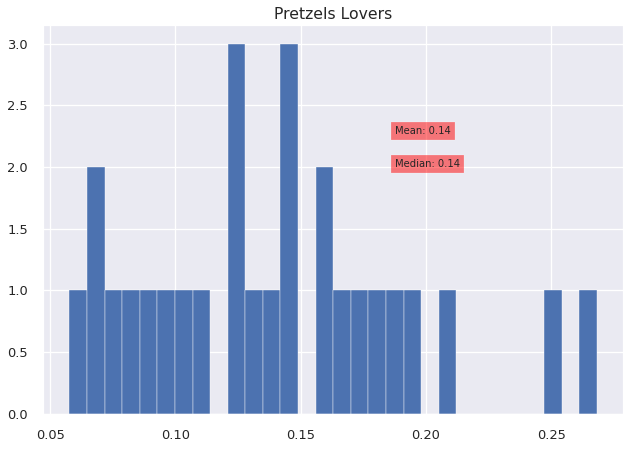

Cluster 5


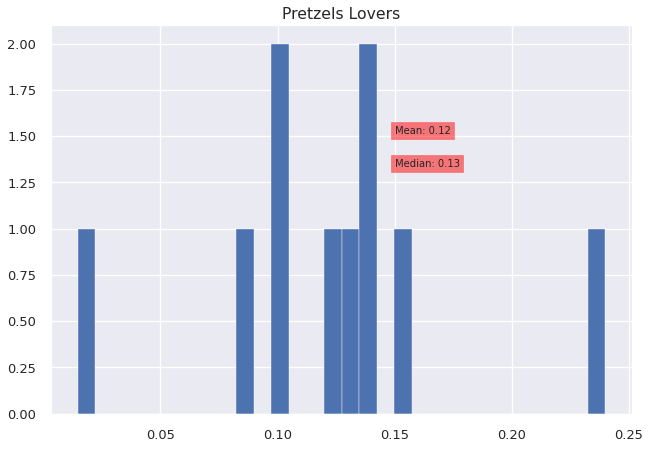

---------------------------------------------------------
count    35321.000000
mean         0.180268
std          0.159221
min          0.000000
25%          0.071429
50%          0.166667
75%          0.250000
max          1.000000
Name: Bread Lover, dtype: float64
Cluster -1


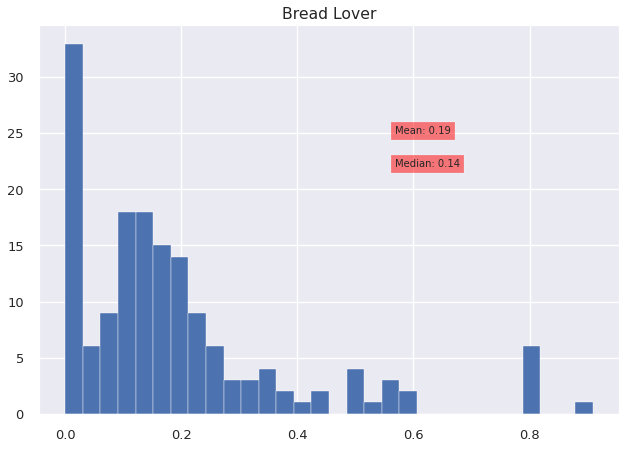

Cluster 0


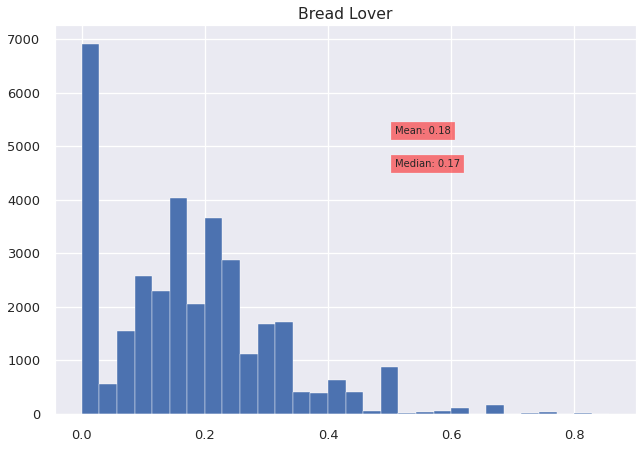

Cluster 1


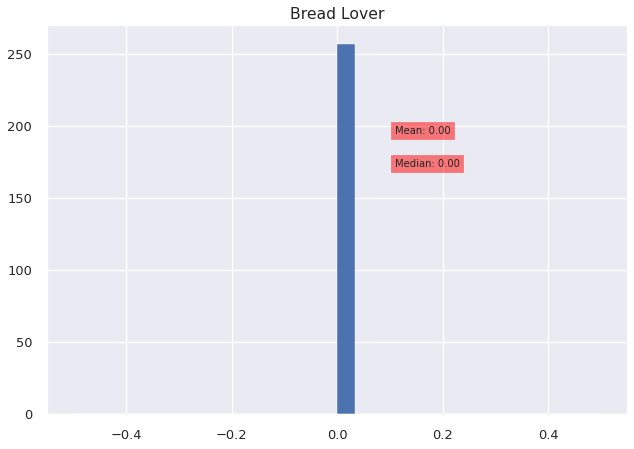

Cluster 2


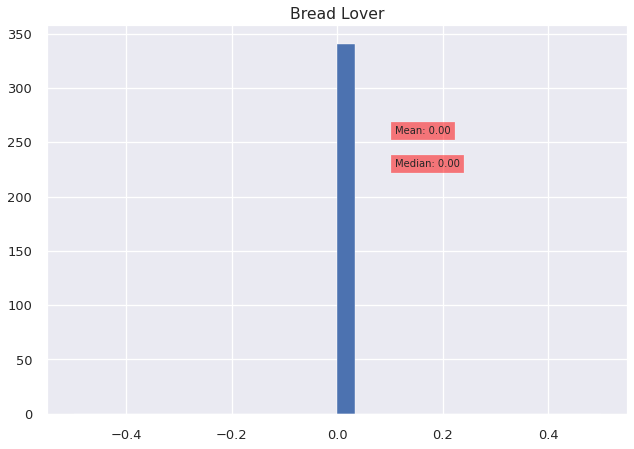

Cluster 3


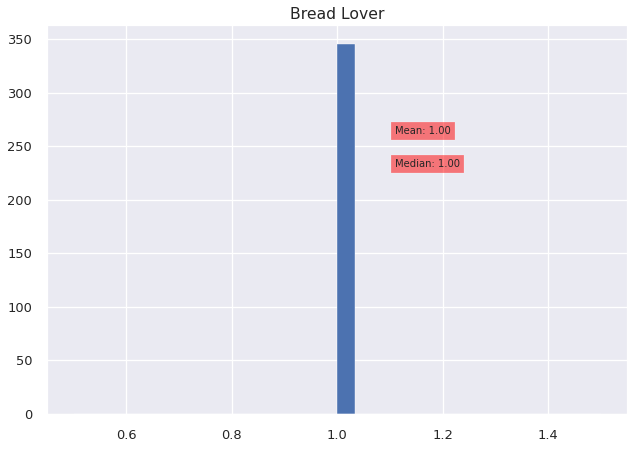

Cluster 4


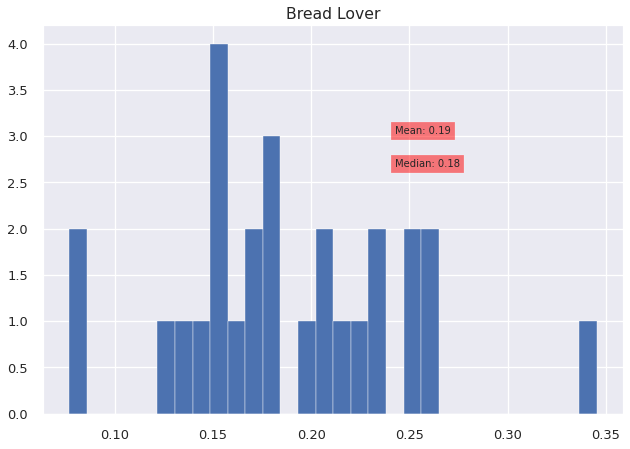

Cluster 5


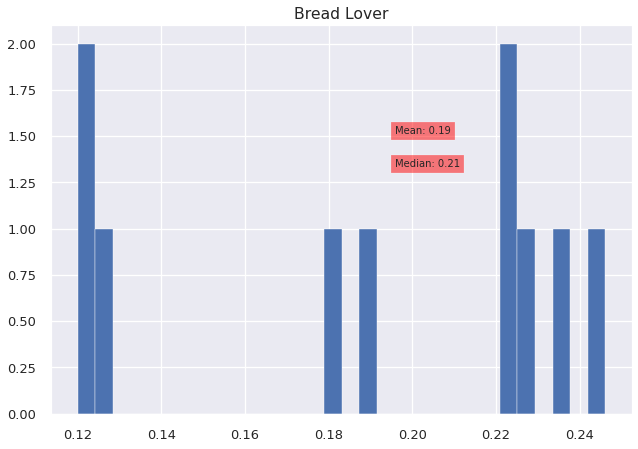

---------------------------------------------------------


In [ ]:
hist_dbscan_clusters(1.1, 10)

In [ ]:
df_dbscan_clusters(1.1, 10)

A/Number_Of_Customers B/Count_Orders  ... G/Pretzels Lovers H/Bread Lover
-1                    160       203.72 %  ...           26.53 %        5.98 %
0                   34180        -0.48 %  ...           -3.48 %       -2.89 %
1                     257       -32.71 %  ...         -100.00 %     -100.00 %
2                     341       -31.93 %  ...          514.52 %     -100.00 %
3                     346       -31.77 %  ...         -100.00 %      454.73 %
4                      27       360.30 %  ...          -13.98 %        4.33 %
5                      10       432.64 %  ...          -24.20 %        5.30 %

[7 rows x 8 columns]

In [ ]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using KMeans(n_clusters=5) model 

model = KMeans(n_clusters=5, random_state=0).fit(df_standard)
idk = model.labels_

for id_cluster in range(model.n_clusters):
    df_customers.loc[np.where(idk == id_cluster)[0], 'Customer_Category_km5'] = id_cluster

In [ ]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using KMeans(n_clusters=8) model 

model = KMeans(n_clusters=8, random_state=0).fit(df_standard)
idk = model.labels_

for id_cluster in range(model.n_clusters):
    df_customers.loc[np.where(idk == id_cluster)[0], 'Customer_Category_km8'] = id_cluster

In [ ]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using DBSCAN(eps=1.0, min_samples=5) model 

dbsc = DBSCAN(eps=1.0, min_samples=5).fit(df_standard)
labels = dbsc.labels_
df_customers['Customer_Category_dbsc5'] = labels

In [ ]:
# Adding a column in the dataframe giving the cluster allocation for each consumer
# using DBSCAN(eps=1.1, min_samples=10) model 

dbsc = DBSCAN(eps=1.1, min_samples=10).fit(df_standard)
labels = dbsc.labels_
df_customers['Customer_Category_dbsc10'] = labels

In [ ]:
df_customers.head(10)

Count_Orders  ...  Customer_Category_dbsc10
0           1.0  ...                         0
1           1.0  ...                         0
2           2.0  ...                         0
3           1.0  ...                         0
4           1.0  ...                         0
5           1.0  ...                         0
6           2.0  ...                         0
7           1.0  ...                         0
8           2.0  ...                         0
9           1.0  ...                         0

[10 rows x 11 columns]

In [ ]:
# exporting your updated dataset
df_customers.to_csv("/content/drive/MyDrive/instacart/df_clustered.csv",encoding='utf-8', index=False)